<a href="https://colab.research.google.com/github/rimshasohai/10pearlstask/blob/main/RIMSHA_DATA_SCIENCE_BATCH5_10PEARLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREDICTION OF AQI FOR THE NEXT THREE DAYS**

 **DATA PREPROCESSING**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os
%matplotlib inline


In [2]:
!pip install shap



In [3]:
pip install captum

In [4]:
df=pd.read_csv('karachi_aqi.csv')

In [5]:
df

date      time  hour_of_day  day_of_week  is_weekend  aqi_index  \
0    2025-05-26  07:54:22            7            0           0         50   
1    2025-05-26  08:54:22            8            0           0         55   
2    2025-05-26  09:54:22            9            0           0         60   
3    2025-05-26  10:54:22           10            0           0         65   
4    2025-05-26  11:54:22           11            0           0         70   
..          ...       ...          ...          ...         ...        ...   
715  2025-06-25  02:54:22            2            2           0         86   
716  2025-06-25  03:54:22            3            2           0         91   
717  2025-06-25  04:54:22            4            2           0         96   
718  2025-06-25  05:54:22            5            2           0        101   
719  2025-06-25  06:54:22            6            2           0        106   

     pm2_5  pm10        co        no2  ...  forecast_22_pressure  \
0     25.0  30.0  0.273896  39.585158  ...           1006.761046   
1     27.5  33.0  0.492346  23.999494  ...           1010.752503   
2     30.0  36.0  0.422252  26.932153  ...           1015.612149   
3     32.5  39.0  0.684510  39.738606  ...           1011.656478   
4     35.0  42.0  0.863638  15.157459  ...           1013.123080   
..     ...   ...       ...        ...  ...                   ...   
715   43.0  51.6  0.373439  30.011771  ...           1006.599152   
716   45.5  54.6  0.682181  20.621651  ...           1013.417096   
717   48.0  57.6  0.472216  24.026648  ...           1012.347793   
718   50.5  60.6  0.808149  12.982493  ...           1009.765615   
719   53.0  63.6  0.477929  21.939207  ...           1006.010397   

     forecast_22_wind_speed  forecast_23_temp  forecast_23_humidity  \
0                  2.382054         31.912606             70.844937   
1                  2.421003         28.645801             57.784812   
2                  4.729462         25.265855             44.571243   
3                  5.020915         34.634618             45.816371   
4                  1.136499         33.219039             78.739660   
..                      ...               ...                   ...   
715                3.258978         35.249800             57.485779   
716                1.323995         25.876417             65.312420   
717                1.285434         31.895681             53.690417   
718                4.281019         30.648221             64.981801   
719                2.873498         26.276354             53.870336   

     forecast_23_pressure  forecast_23_wind_speed  forecast_24_temp  \
0             1008.770777                2.485903         32.306147   
1             1008.940121                1.893065         28.938965   
2             1013.876865                5.014227         25.087299   
3             1011.594391                5.204675         34.581434   
4             1013.303922                1.443374         32.955727   
..                    ...                     ...               ...   
715           1006.466843                2.109559         35.343962   
716           1015.939235                0.570637         25.367694   
717           1012.480999                0.882741         32.509490   
718           1008.868699                4.910622         29.591960   
719           1008.303203                2.784590         26.779068   

     forecast_24_humidity  forecast_24_pressure  forecast_24_wind_speed  
0               74.404409           1008.334612                2.695458  
1               51.150640           1011.203763                1.972421  
2               47.506955           1013.939475                4.907536  
3               46.348735           1010.544984                4.803836  
4               79.384217           1011.378246                1.233817  
..                    ...                   ...                     ...  
715             62.288577        

In [6]:
print('LENGTH OF DATASET:',len(df))

LENGTH OF DATASET: 720


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Columns: 113 entries, date to forecast_24_wind_speed
dtypes: float64(107), int64(4), object(2)
memory usage: 635.8+ KB


In [8]:
df.isnull().sum()

date                      0
time                      0
hour_of_day               0
day_of_week               0
is_weekend                0
                         ..
forecast_23_wind_speed    0
forecast_24_temp          0
forecast_24_humidity      0
forecast_24_pressure      0
forecast_24_wind_speed    0
Length: 113, dtype: int64

<Axes: >

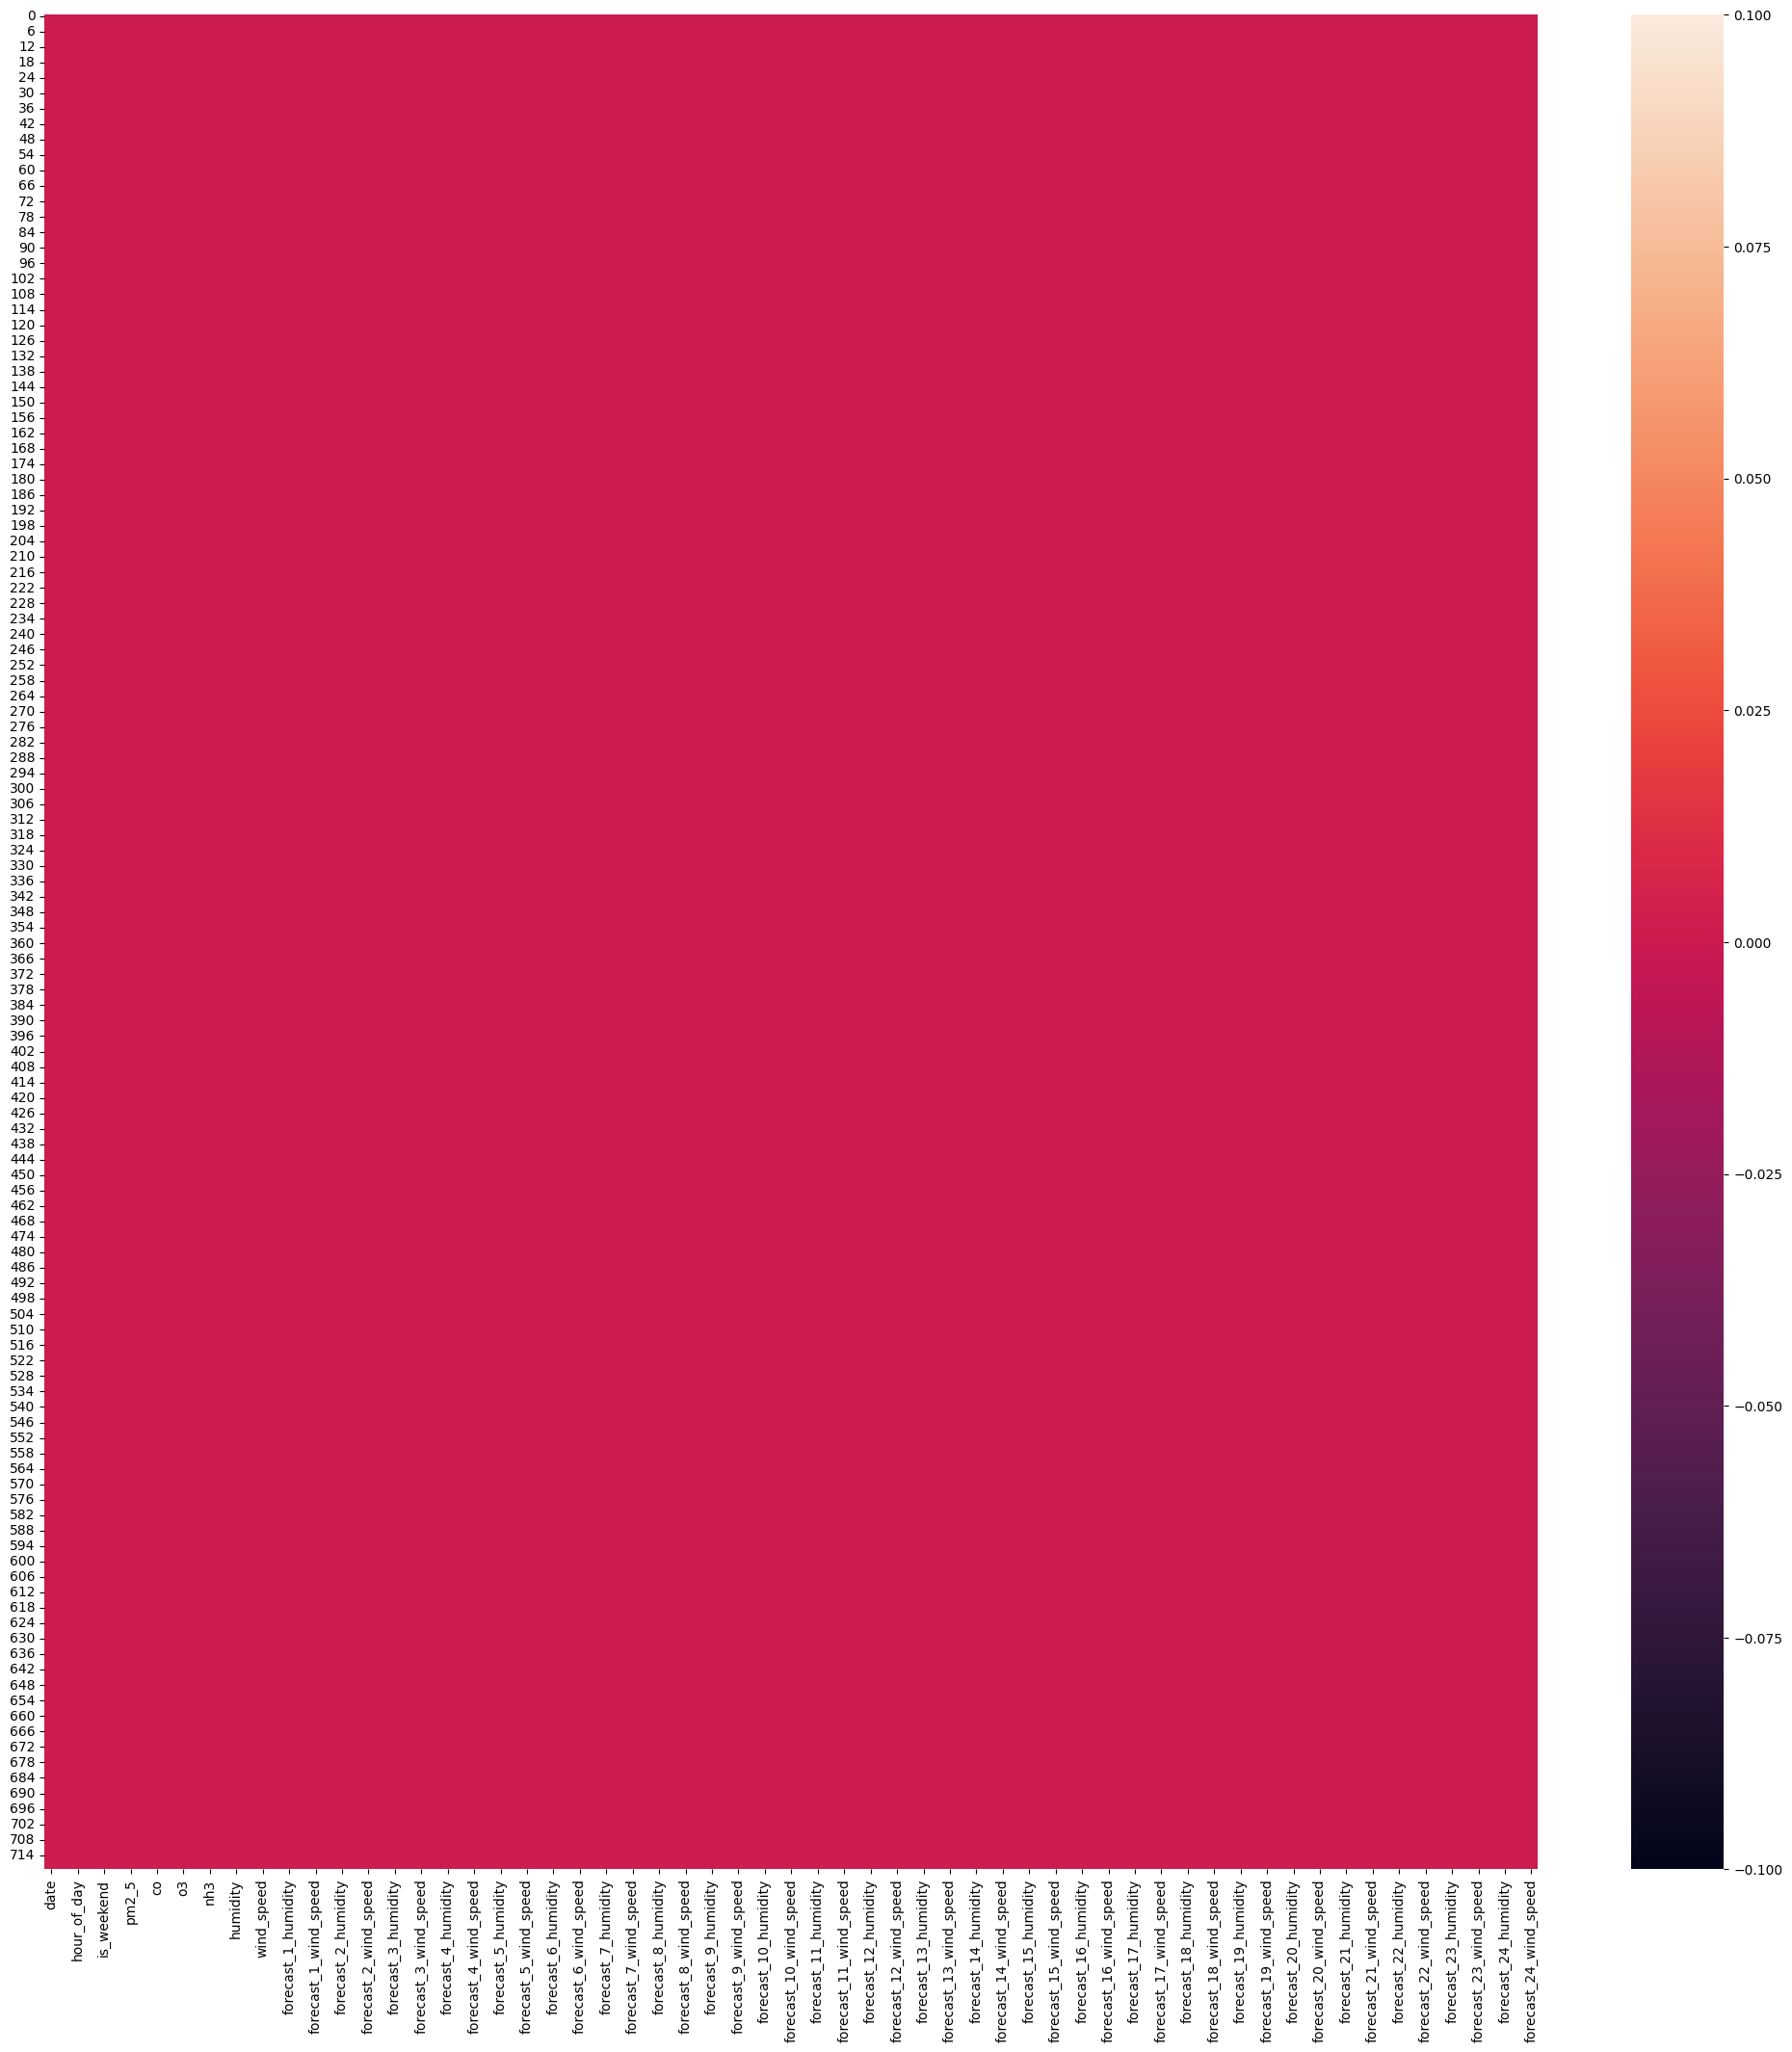

In [9]:
#PLOTTING NULL VALUES
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

In [10]:
import pandas as pd

# Load the CSV
df = pd.read_csv("karachi_aqi.csv")

# Show all columns for verification
print("Original columns:")
print(df.columns.tolist())

# Drop columns that contain 'forecast' (case-insensitive)
columns_to_drop = [col for col in df.columns if 'forecast' in col.lower()]
df.drop(columns=columns_to_drop, inplace=True)

# Show columns after deletion
print("\nRemaining columns:")
print(df.columns.tolist())

# Save cleaned file
df.to_csv("cleaned_file.csv", index=False)

Original columns:
['date', 'time', 'hour_of_day', 'day_of_week', 'is_weekend', 'aqi_index', 'pm2_5', 'pm10', 'co', 'no2', 'o3', 'so2', 'nh3', 'temp', 'humidity', 'pressure', 'wind_speed', 'forecast_1_temp', 'forecast_1_humidity', 'forecast_1_pressure', 'forecast_1_wind_speed', 'forecast_2_temp', 'forecast_2_humidity', 'forecast_2_pressure', 'forecast_2_wind_speed', 'forecast_3_temp', 'forecast_3_humidity', 'forecast_3_pressure', 'forecast_3_wind_speed', 'forecast_4_temp', 'forecast_4_humidity', 'forecast_4_pressure', 'forecast_4_wind_speed', 'forecast_5_temp', 'forecast_5_humidity', 'forecast_5_pressure', 'forecast_5_wind_speed', 'forecast_6_temp', 'forecast_6_humidity', 'forecast_6_pressure', 'forecast_6_wind_speed', 'forecast_7_temp', 'forecast_7_humidity', 'forecast_7_pressure', 'forecast_7_wind_speed', 'forecast_8_temp', 'forecast_8_humidity', 'forecast_8_pressure', 'forecast_8_wind_speed', 'forecast_9_temp', 'forecast_9_humidity', 'forecast_9_pressure', 'forecast_9_wind_speed', 'f

In [11]:
# Load the CSV
df1 = pd.read_csv("cleaned_file.csv")

In [12]:
# Columns to delete
columns_to_delete = ["date", "time", "hour_of_day", "day_of_week", "is_weekend"]

# Drop the columns
df1.drop(columns=columns_to_delete, inplace=True)

# Optional: Save to a new CSV
df1.to_csv("cleaned1_file.csv", index=False)

# Show remaining columns
print(df1.columns.tolist())


['aqi_index', 'pm2_5', 'pm10', 'co', 'no2', 'o3', 'so2', 'nh3', 'temp', 'humidity', 'pressure', 'wind_speed']


In [13]:
df1

aqi_index  pm2_5  pm10        co        no2         o3        so2  \
0           50   25.0  30.0  0.273896  39.585158  69.942695   7.167639   
1           55   27.5  33.0  0.492346  23.999494  61.104211  15.982367   
2           60   30.0  36.0  0.422252  26.932153  31.359844   9.439991   
3           65   32.5  39.0  0.684510  39.738606  48.321090   8.266971   
4           70   35.0  42.0  0.863638  15.157459  24.652625  19.981188   
..         ...    ...   ...       ...        ...        ...        ...   
715         86   43.0  51.6  0.373439  30.011771  20.717181   8.172395   
716         91   45.5  54.6  0.682181  20.621651  53.406044   6.684681   
717         96   48.0  57.6  0.472216  24.026648  36.186151  14.180360   
718        101   50.5  60.6  0.808149  12.982493  45.807214   9.650397   
719        106   53.0  63.6  0.477929  21.939207  43.610508   6.192468   

          nh3       temp   humidity     pressure  wind_speed  
0    0.303263  31.751910  70.593371  1008.741059    2.368915  
1    0.521690  29.267610  55.851194  1010.151671    2.304699  
2    0.327987  25.513241  45.003575  1014.594379    4.589513  
3    0.351221  34.365333  44.932256  1011.786003    4.889056  
4    0.844416  33.737739  76.414937  1012.624158    1.202857  
..        ...        ...        ...          ...         ...  
715  0.294769  34.822810  60.059941  1006.182571    2.549211  
716  0.112316  25.537928  63.084678  1013.619214    1.196926  
717  0.710644  32.302907  50.707960  1012.089967    1.100964  
718  0.291067  30.483071  66.071625  1008.822497    4.745414  
719  0.486316  26.557943  55.635881  1009.010363    3.057757  

[720 rows x 12 columns]

**EXPLORATORY DATA ANALYSIS**

In [14]:
#Summary Statistics

In [15]:
df.describe()
df["aqi_index"].value_counts().sort_index()

aqi_index
50     10
51     10
52      8
53      8
54      8
       ..
107     8
108     8
109     8
110     8
111     8
Name: count, Length: 62, dtype: int64

In [16]:
 #Time-Based Trends

COLUMNS: ['date', 'time', 'hour_of_day', 'day_of_week', 'is_weekend', 'aqi_index', 'pm2_5', 'pm10', 'co', 'no2', 'o3', 'so2', 'nh3', 'temp', 'humidity', 'pressure', 'wind_speed']


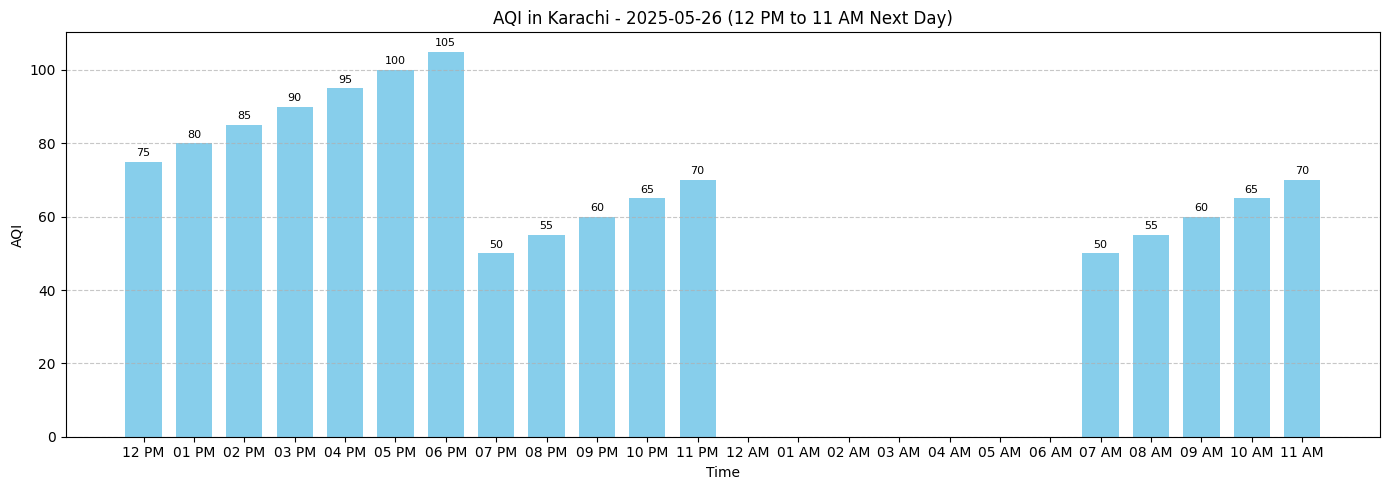

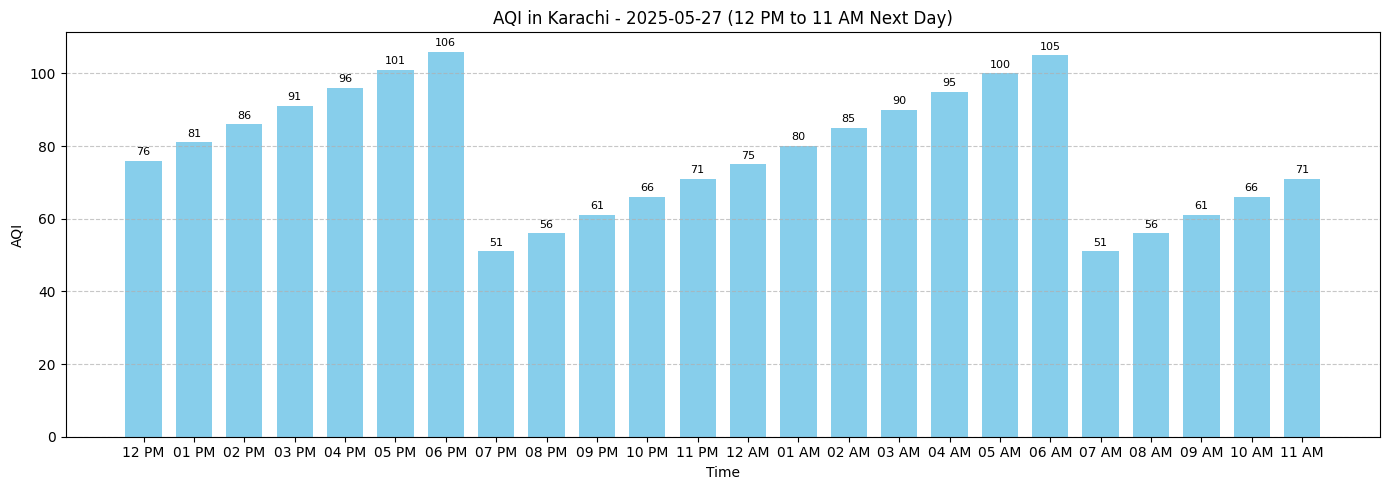

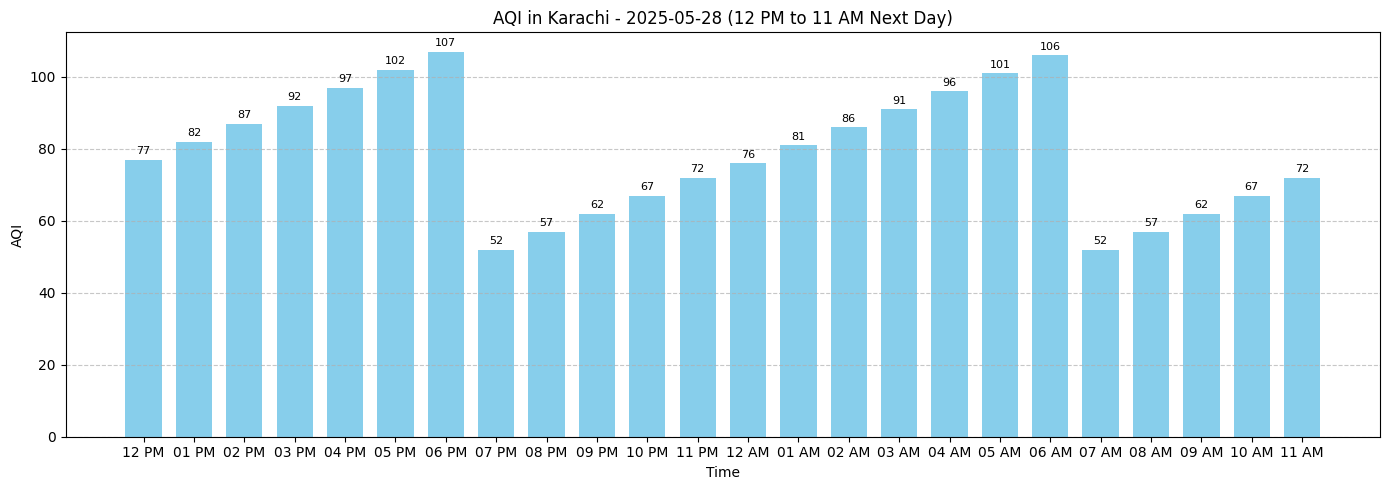

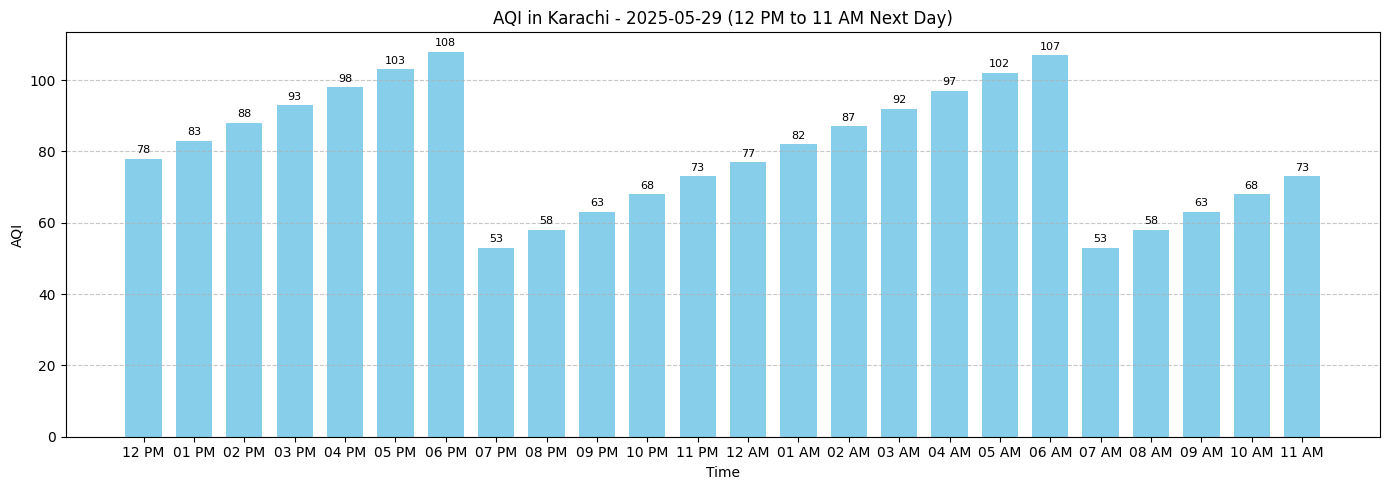

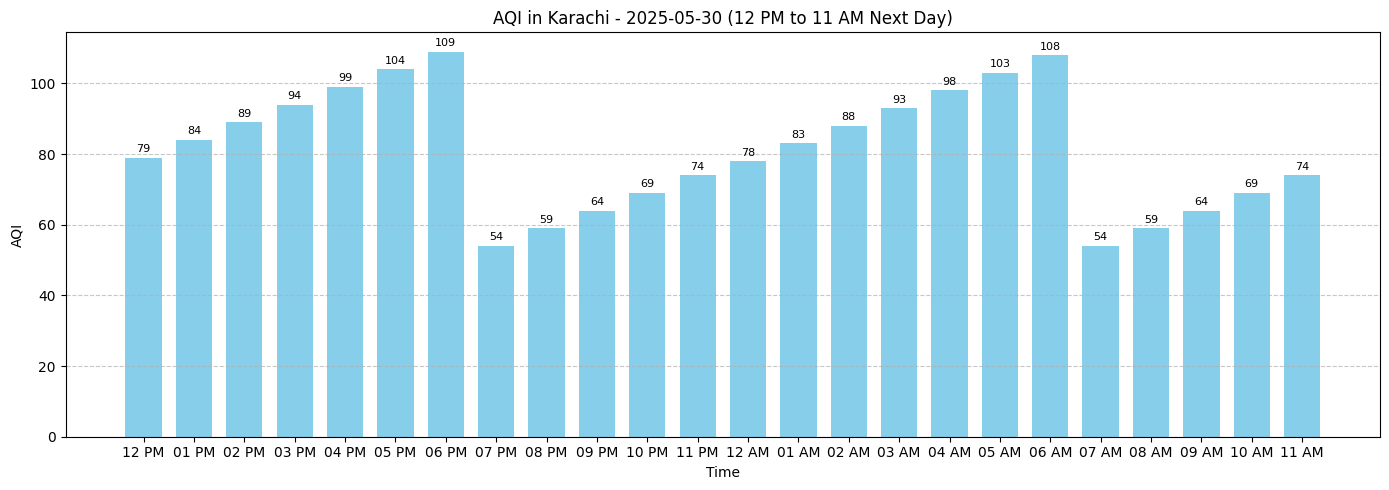

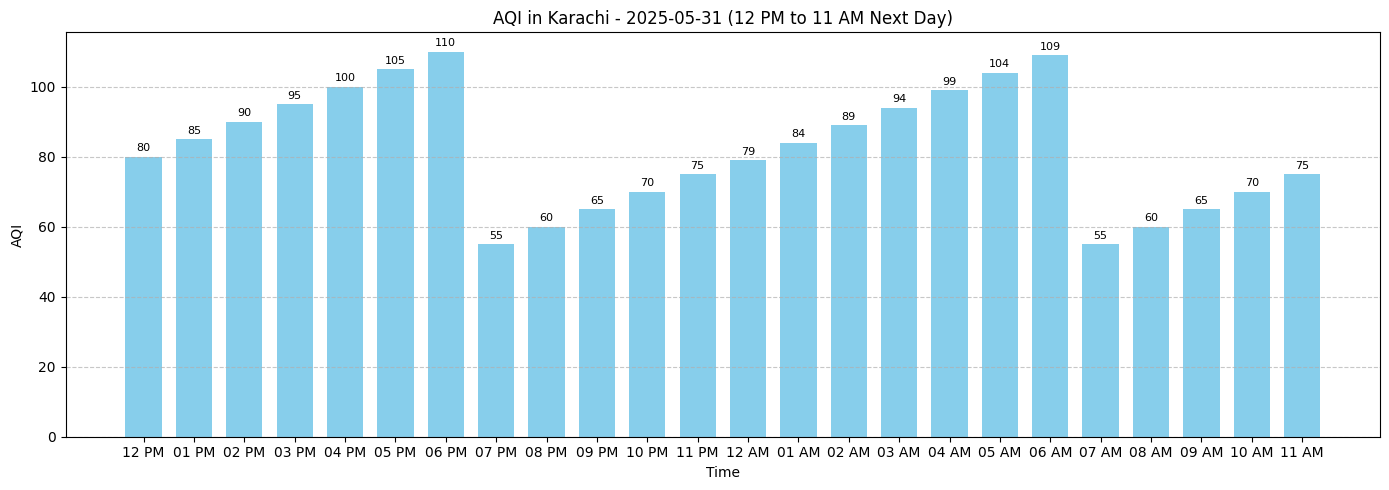

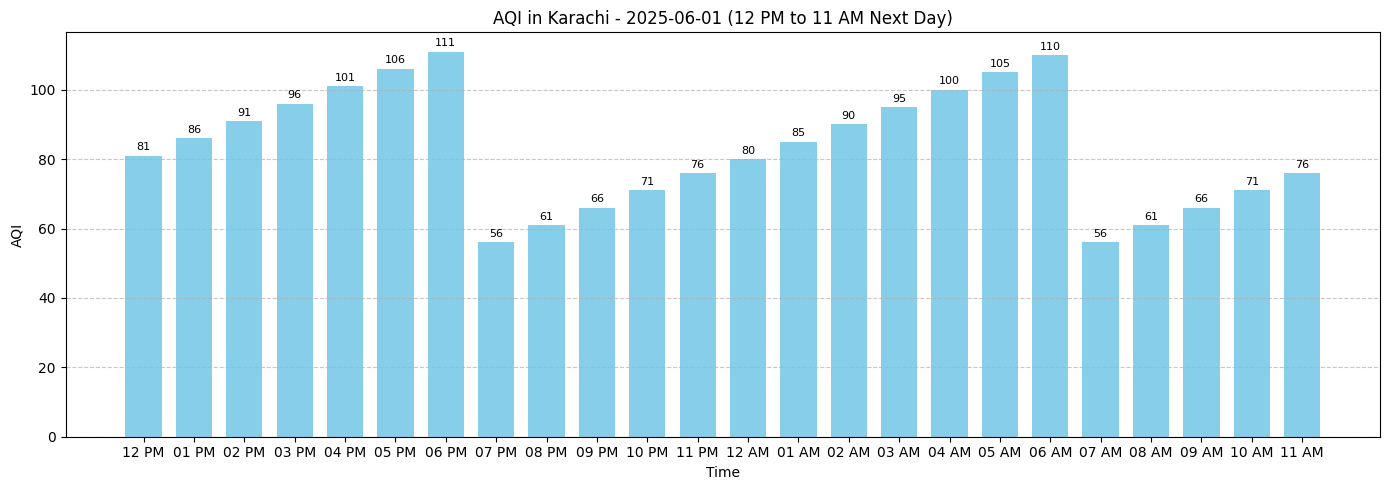

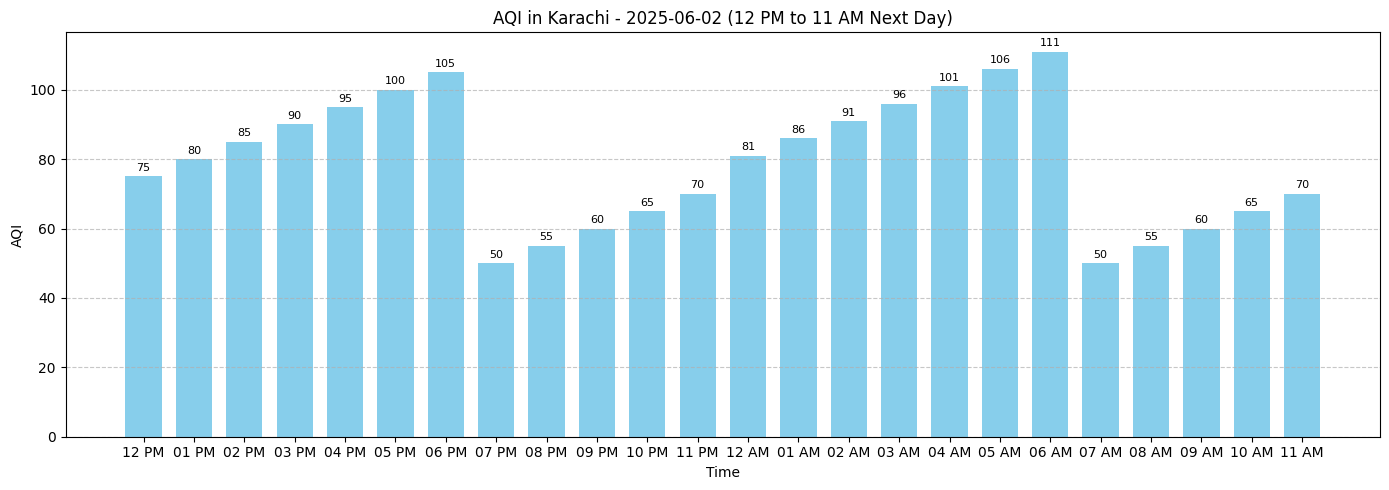

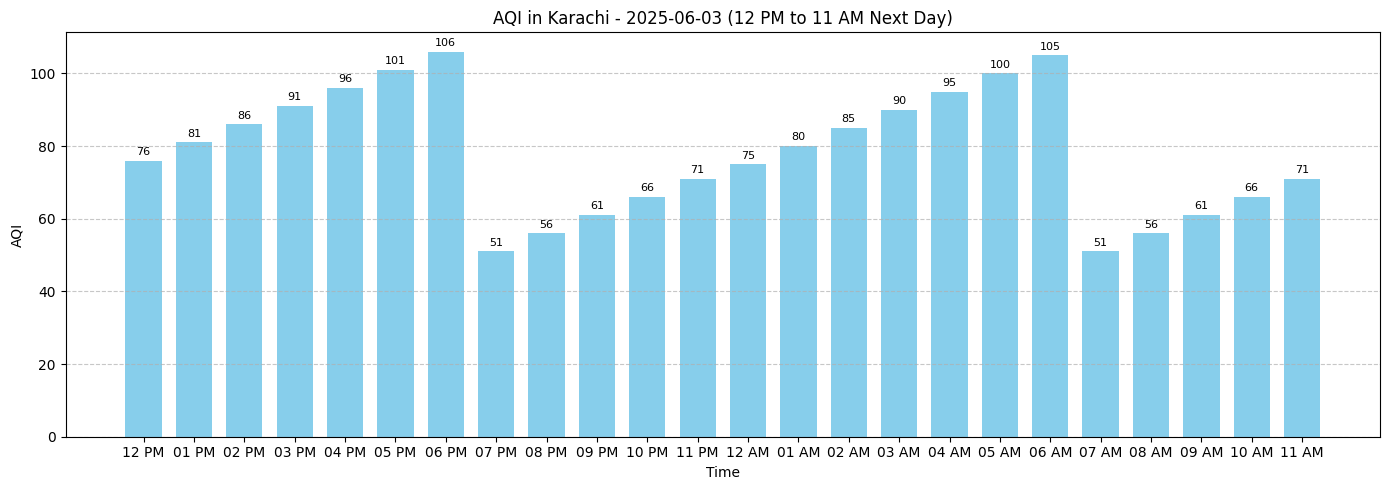

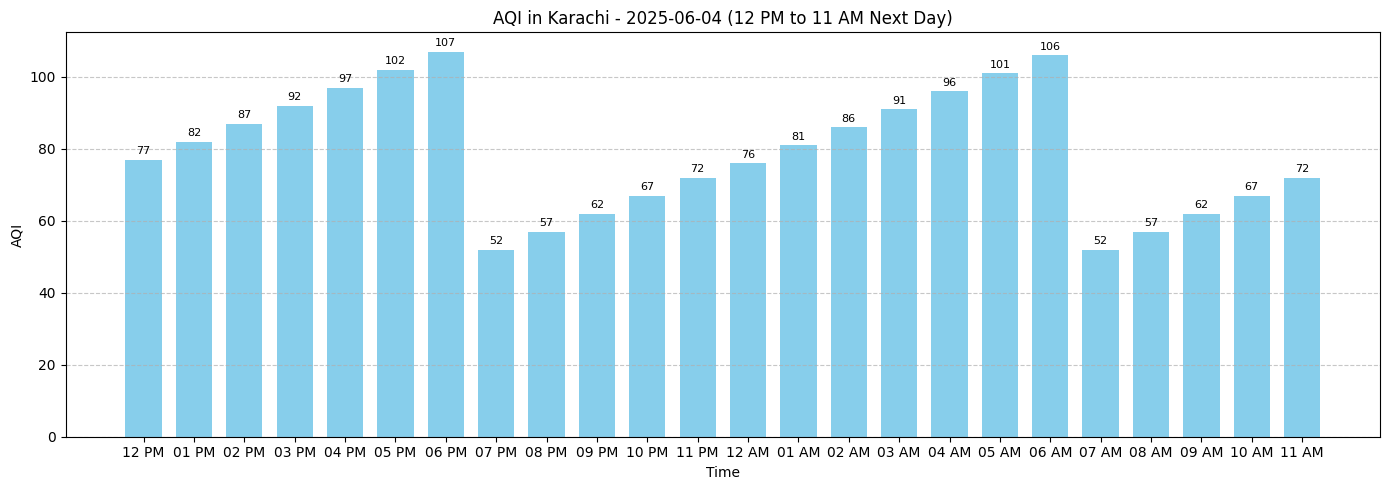

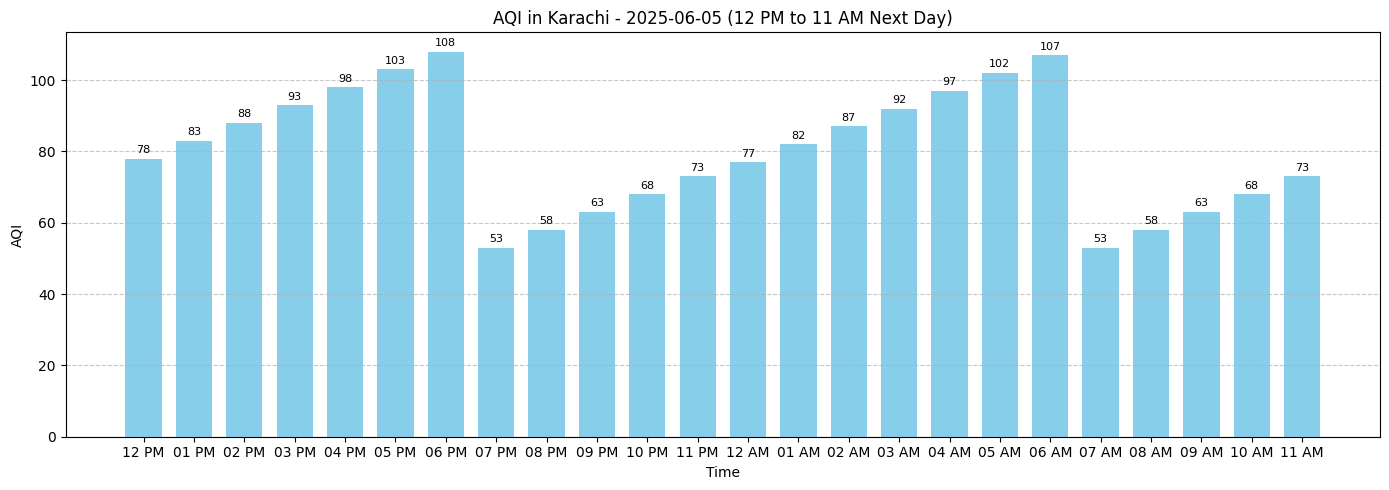

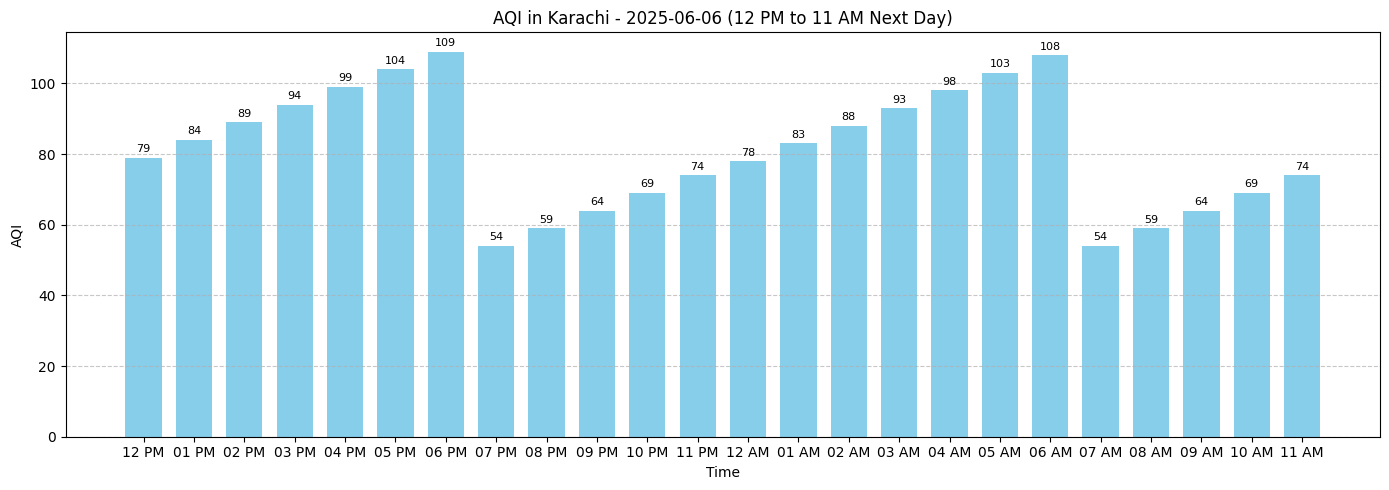

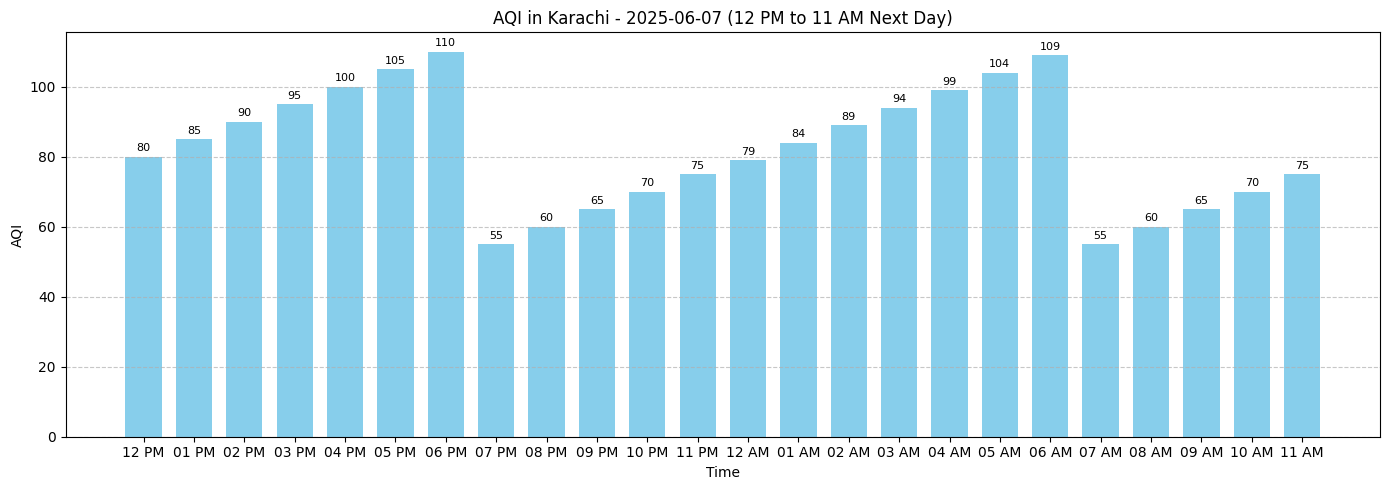

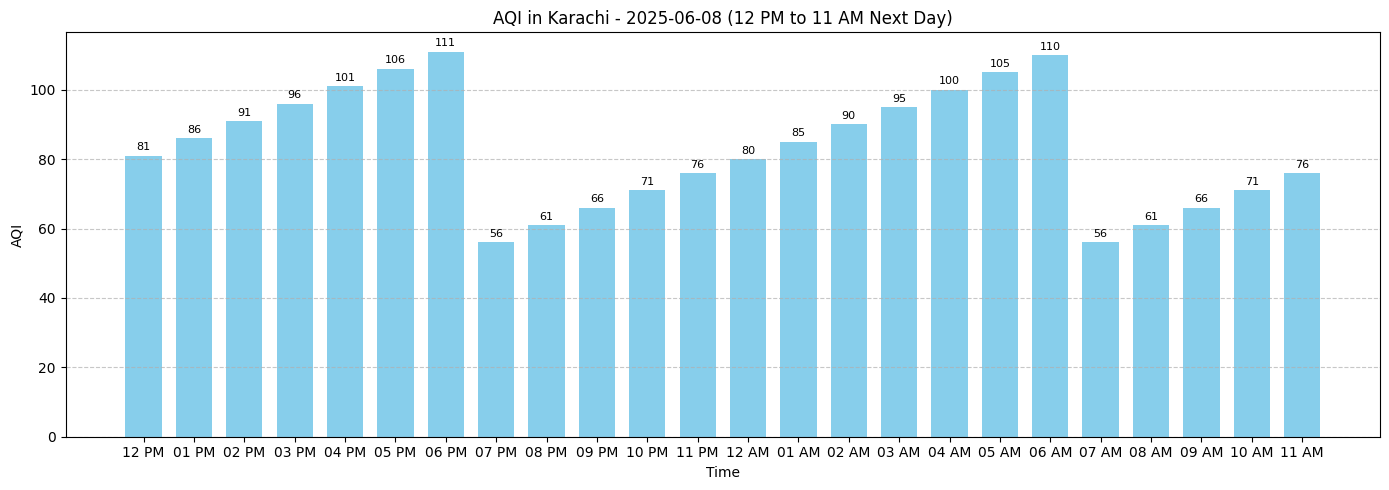

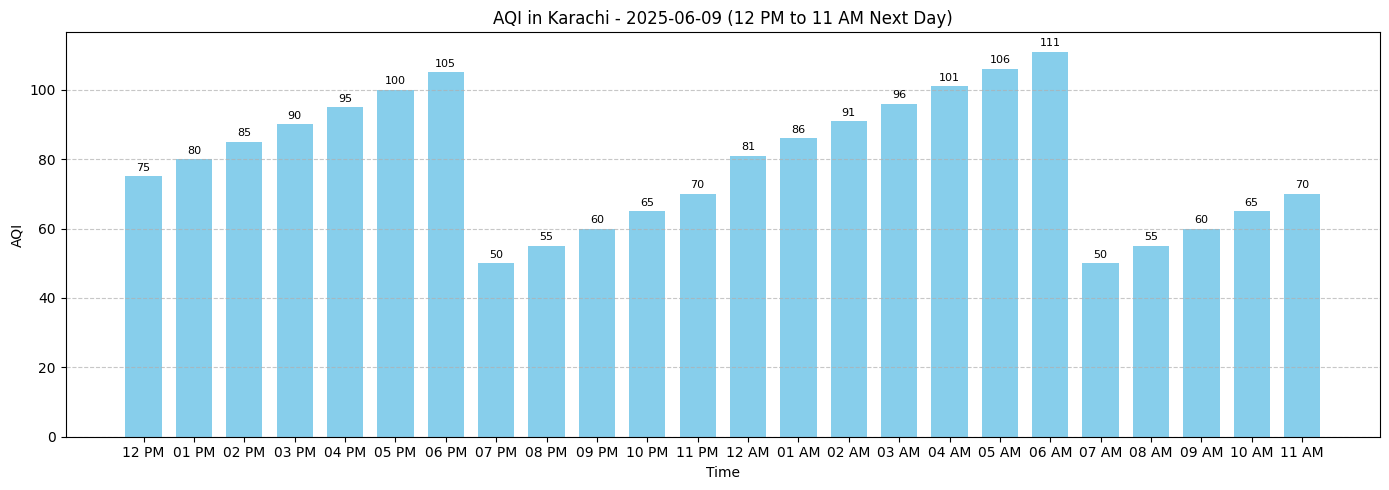

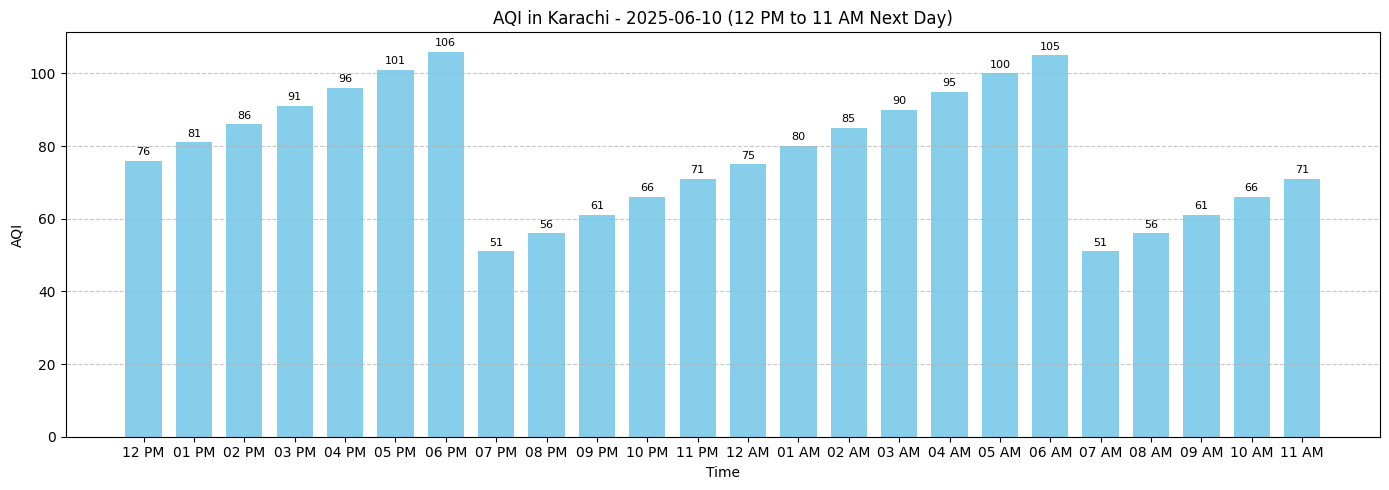

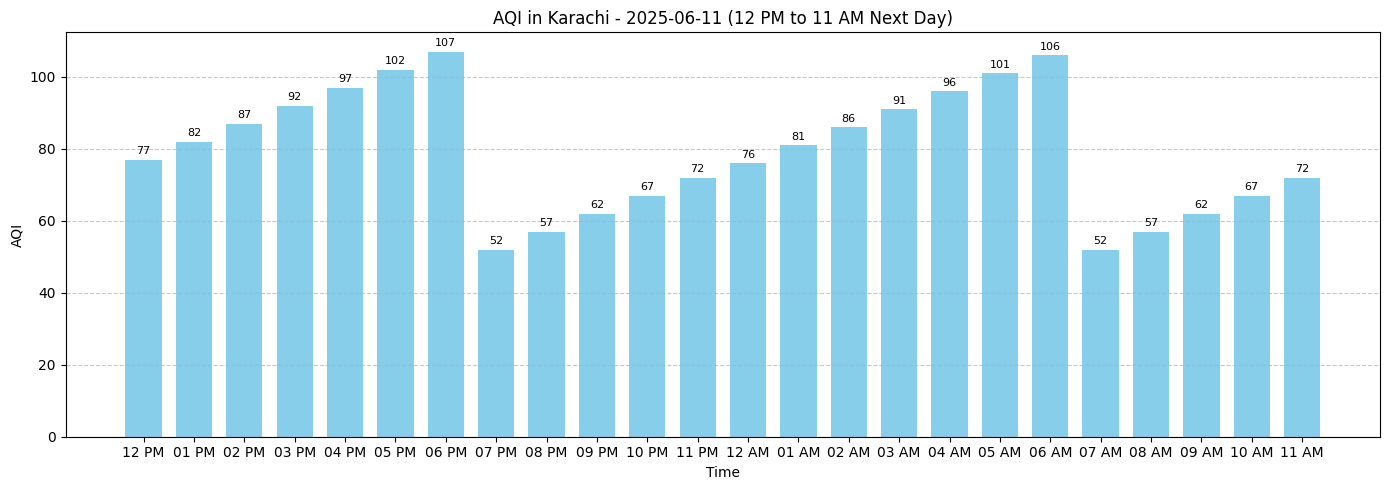

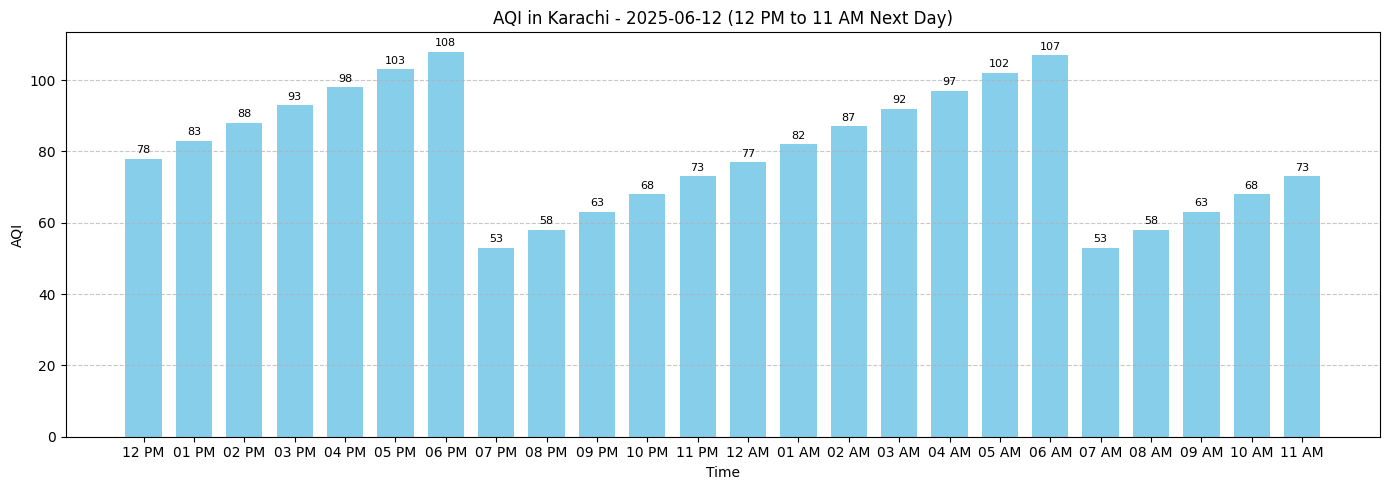

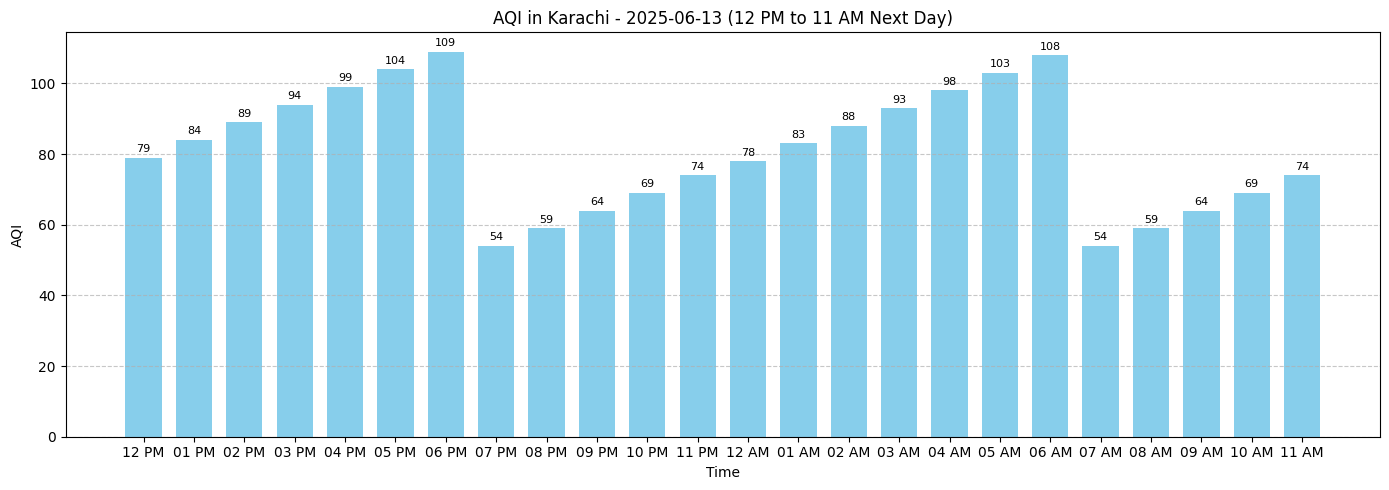

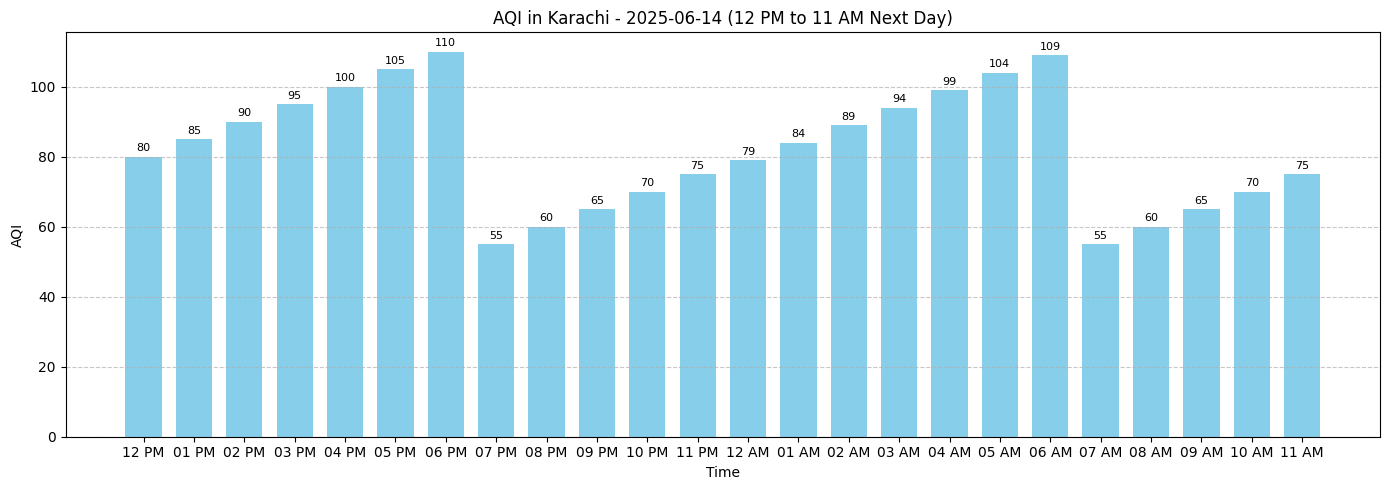

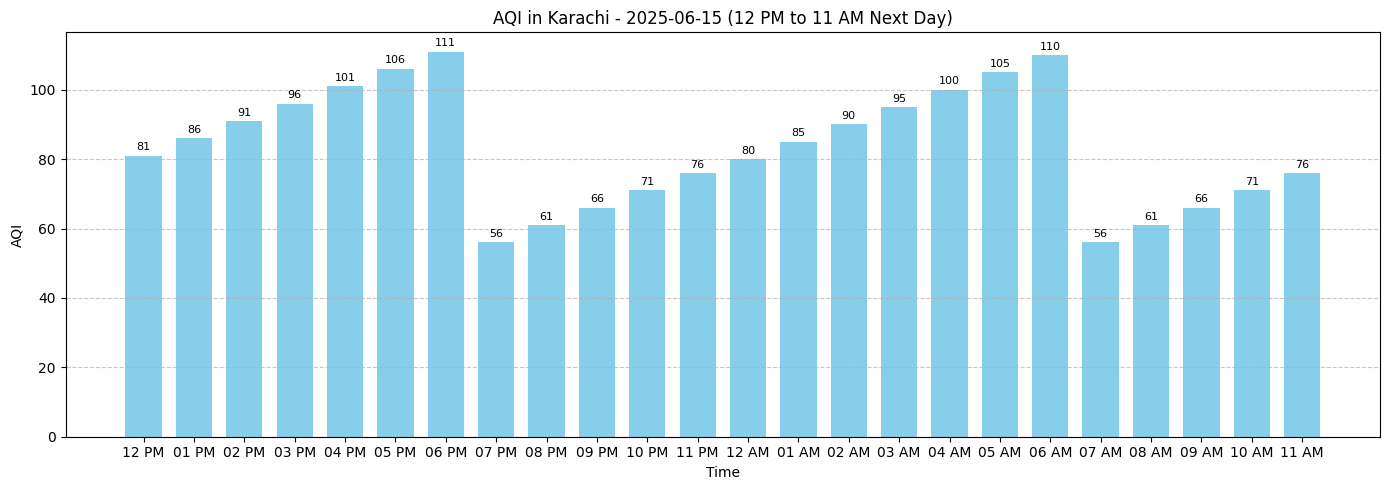

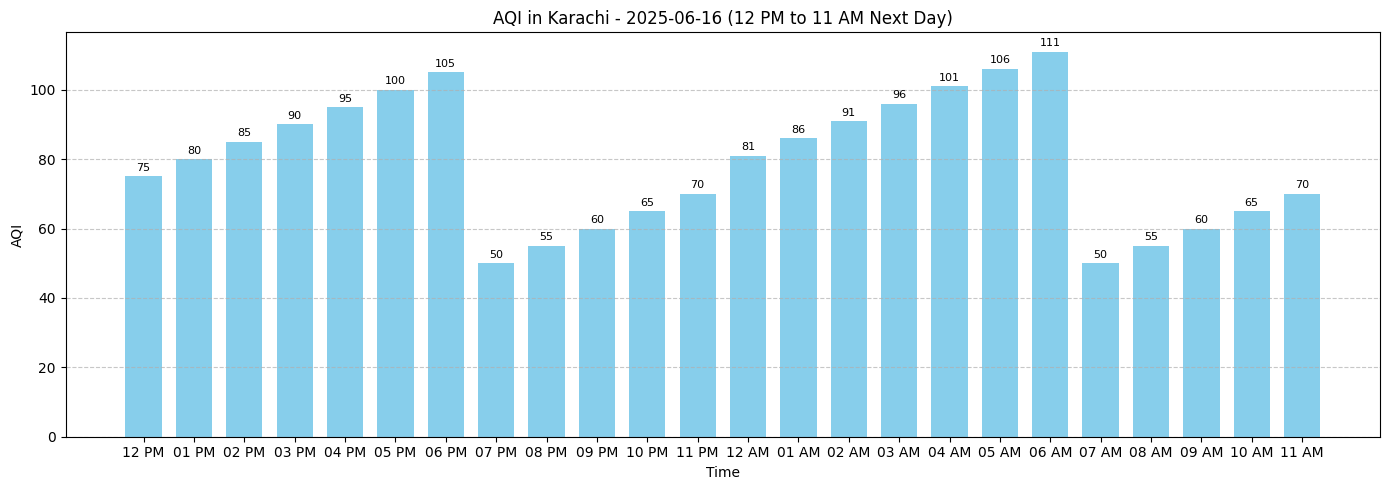

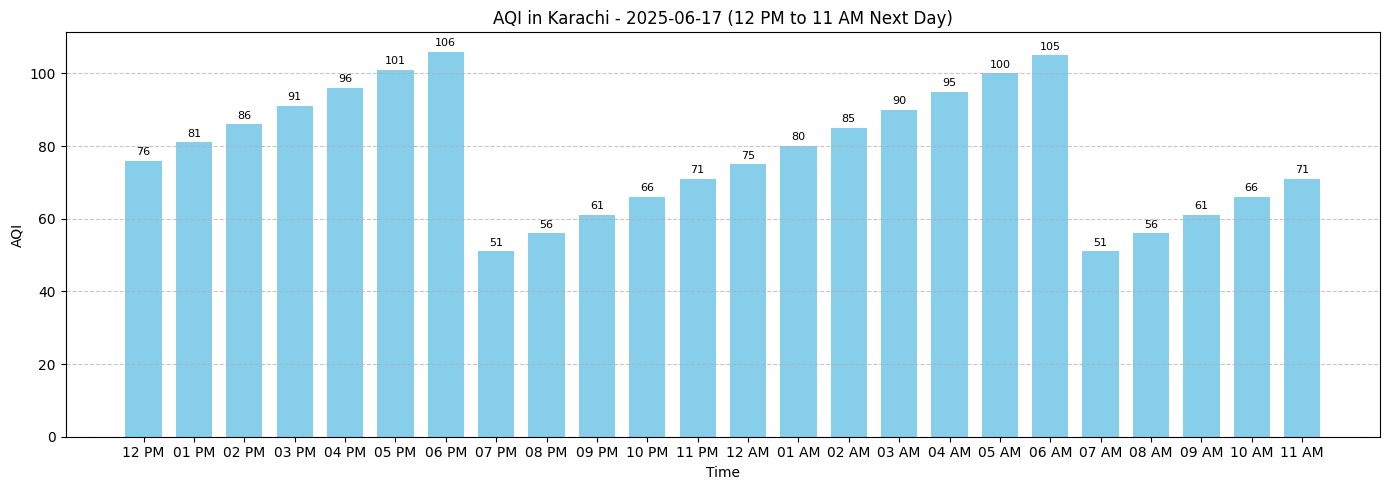

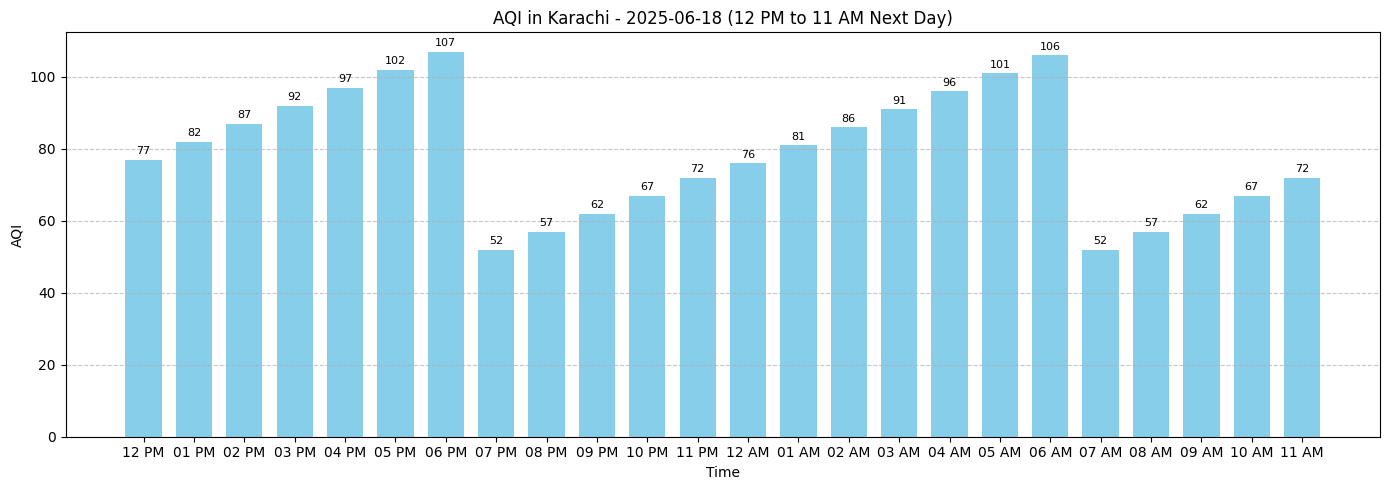

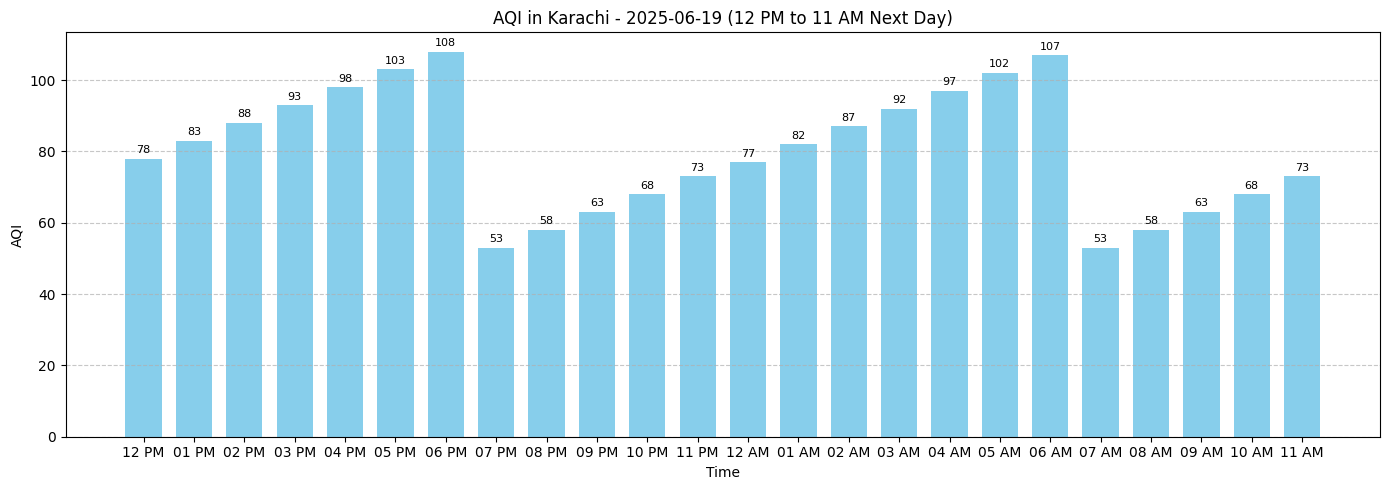

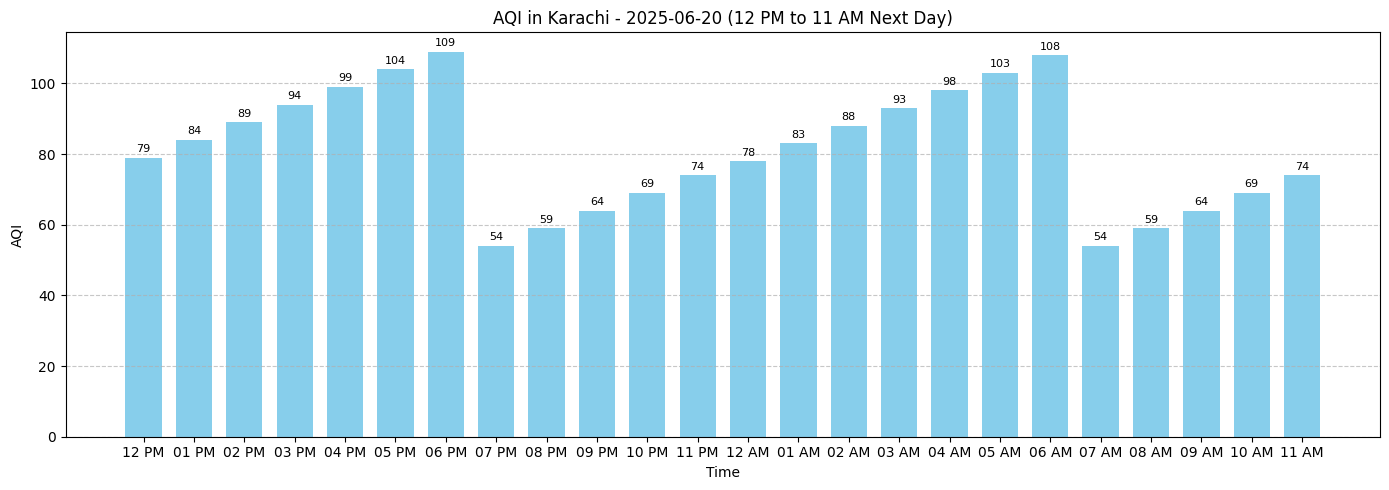

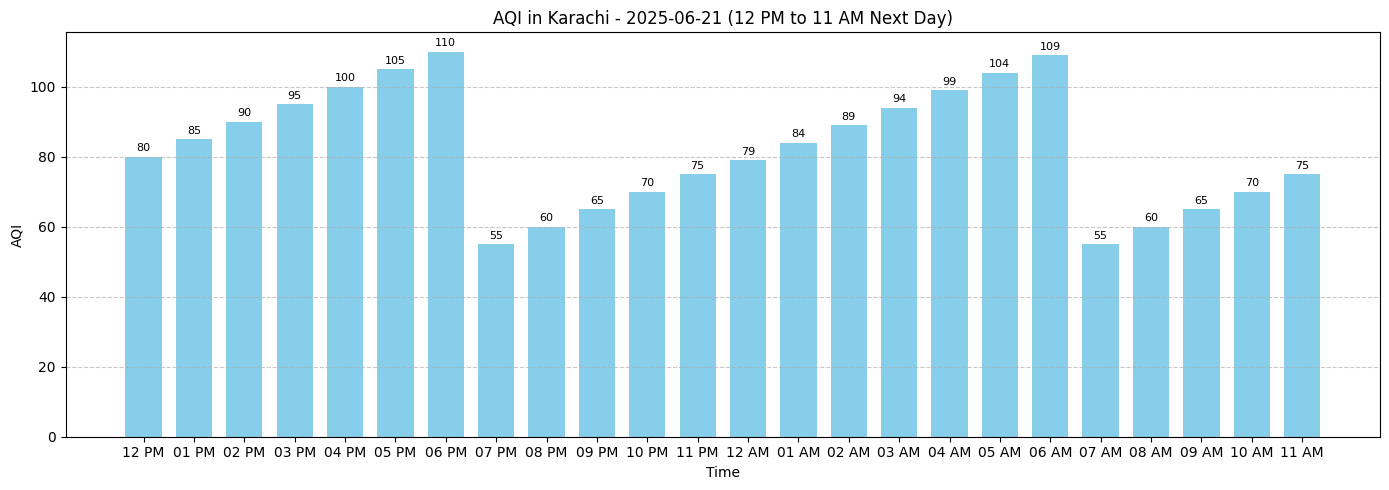

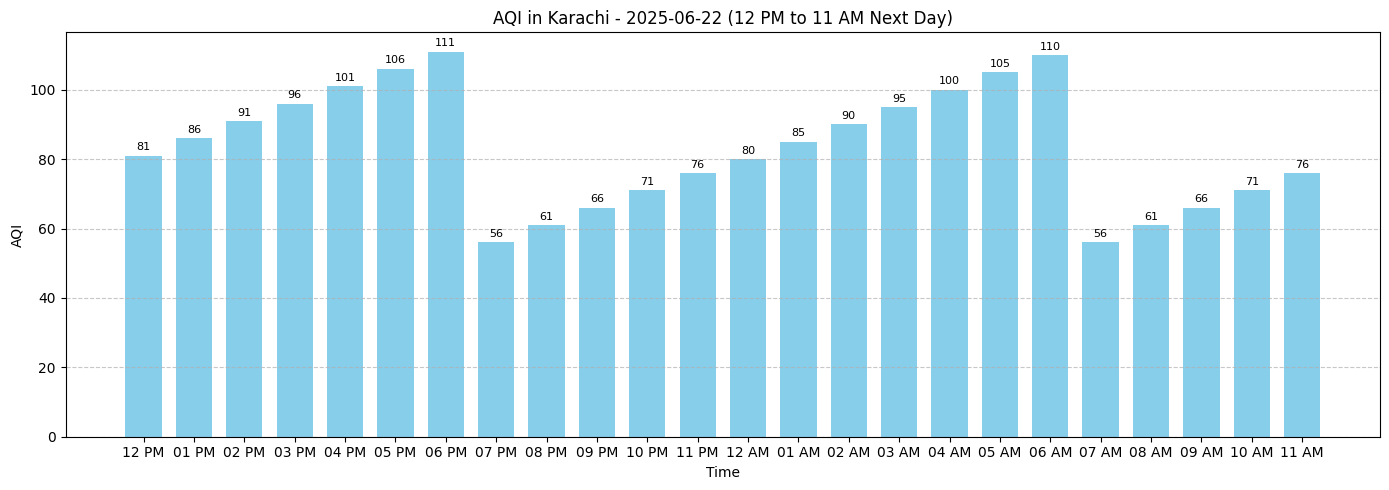

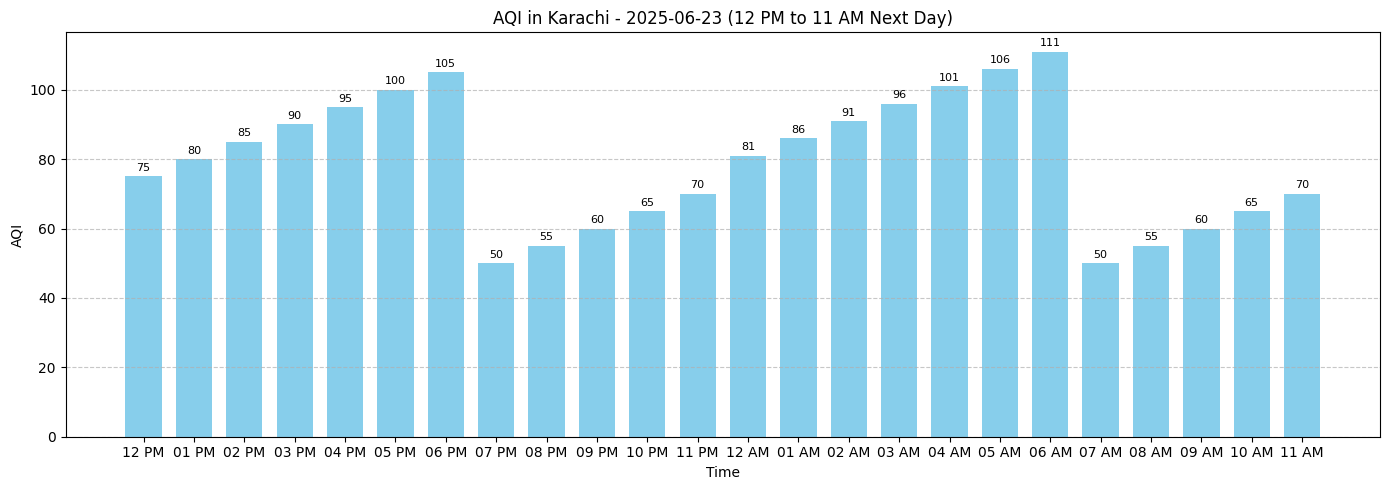

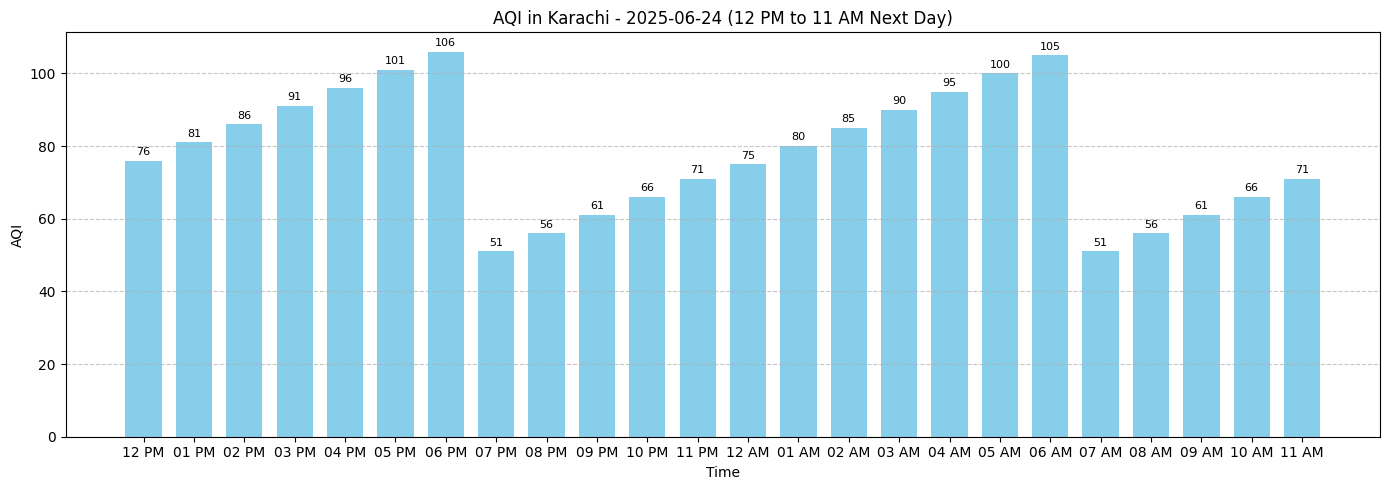

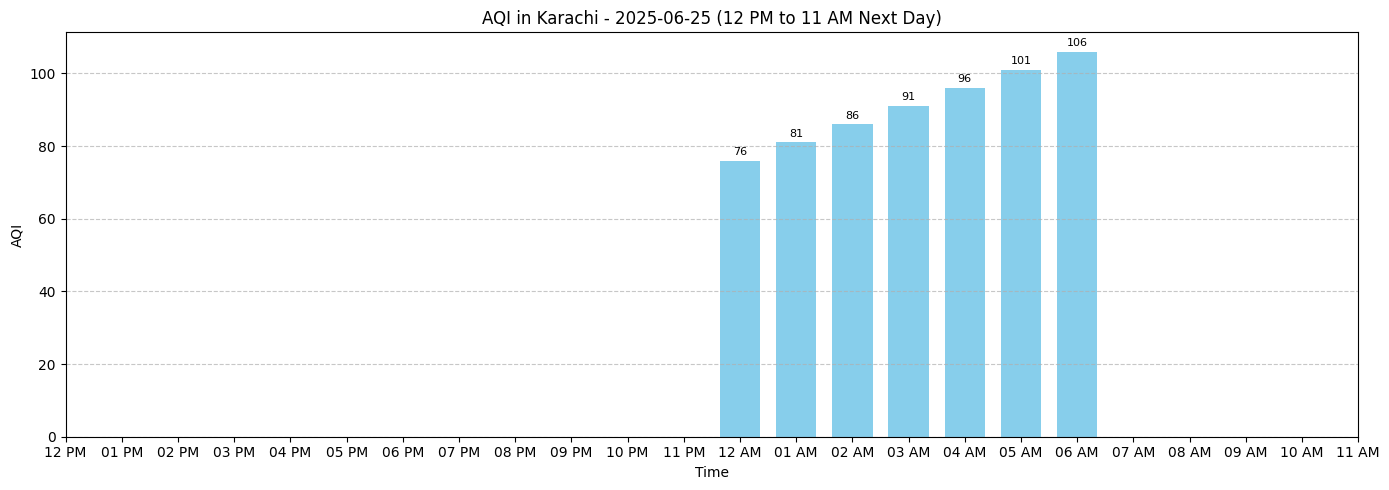

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# STEP 1: Strip all column names of spaces
df.columns = df.columns.str.strip()

# STEP 2: Print column names to debug
print("COLUMNS:", df.columns.tolist())

# STEP 3: Parse 'date' and 'time' to create datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['datetime'] = pd.to_datetime(df['date'].dt.strftime('%Y-%m-%d') + ' ' + df['time'], errors='coerce')

# STEP 4: Drop rows with invalid datetime
df = df.dropna(subset=['datetime'])

# STEP 5: Extract hour
df['hour'] = df['datetime'].dt.hour

# STEP 6: Get unique dates
unique_dates = df['datetime'].dt.date.unique()

# STEP 7: Define desired hour sequence (now includes 12 PM too)
desired_hours = list(range(12, 24)) + list(range(0, 12))  # 12 PM to 11 PM, then 12 AM to 11 AM

# STEP 8: Plot for each day
for day in unique_dates:
    day_df = df[df['datetime'].dt.date == day]

    # Get average AQI per hour
    hourly_avg = day_df.groupby(day_df['datetime'].dt.hour)['aqi_index'].mean()
    hourly_avg = hourly_avg.reindex(desired_hours)  # Ensure all desired hours are included

    # Create labels for each hour (same day or next day)
    hour_labels = []
    for hr in desired_hours:
        if hr >= 12:
            dt = pd.Timestamp(f"{day} {hr:02d}:00")
        else:
            dt = pd.Timestamp(f"{pd.Timestamp(day) + pd.Timedelta(days=1):%Y-%m-%d} {hr:02d}:00")
        hour_labels.append(dt)

    display_labels = [dt.strftime('%I %p') for dt in hour_labels]

    # Plot
    plt.figure(figsize=(14, 5))
    bars = plt.bar(hour_labels, hourly_avg, color='skyblue', width=0.03)

    # Add AQI values on top of bars
    for bar, val in zip(bars, hourly_avg):
        if not pd.isna(val):
            plt.text(bar.get_x() + bar.get_width()/2, val + 1, f'{int(round(val))}',
                     ha='center', va='bottom', fontsize=8)

    plt.xticks(hour_labels, display_labels, rotation=0)
    plt.title(f"AQI in Karachi - {day} (12 PM to 11 AM Next Day)")
    plt.xlabel("Time")
    plt.ylabel("AQI")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



In [18]:
#Correlation Heatmap


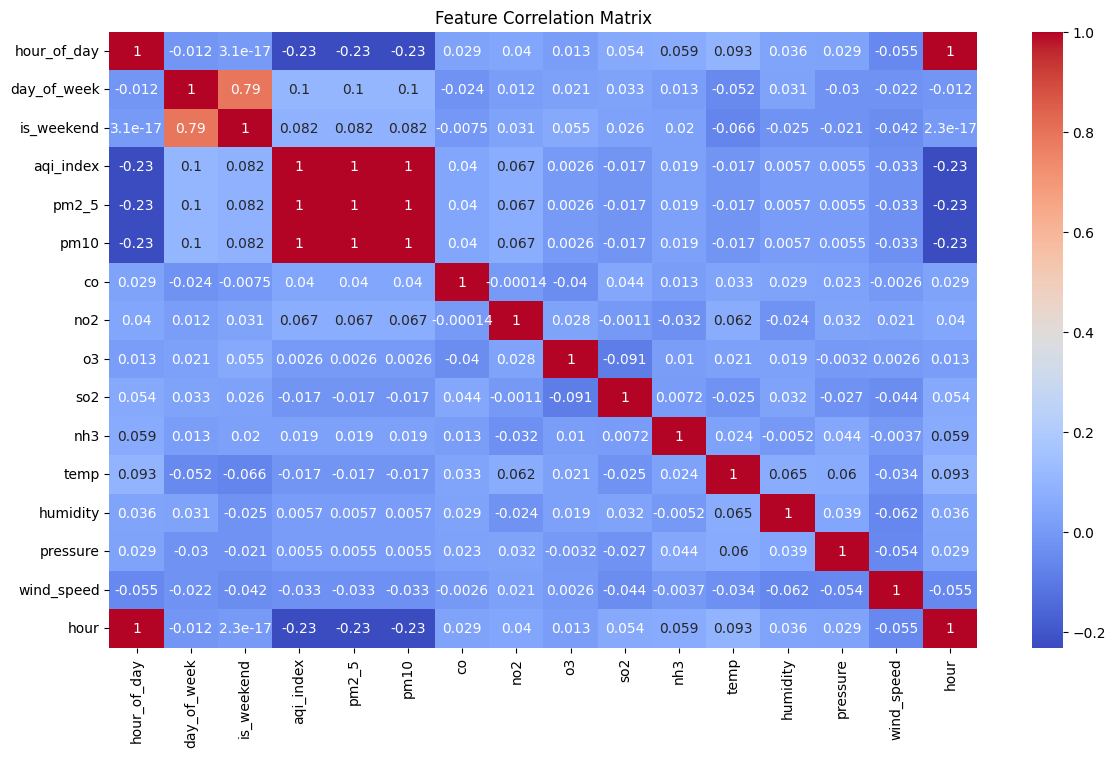

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns (e.g., strings like 'time')
numeric_df = df.select_dtypes(include=["number"])

# Correlation heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [20]:
# Daily Patterns

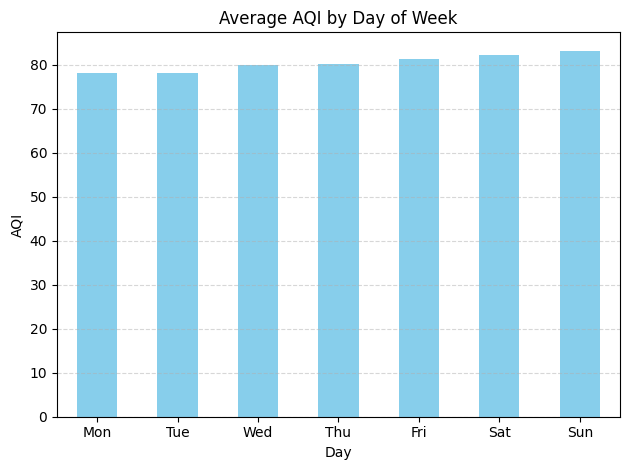

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Map weekday numbers to names
weekday_map = {
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thu',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
}

# Ensure 'day_of_week' column exists
if 'day_of_week' not in df.columns:
    df['day_of_week'] = df['datetime'].dt.dayofweek  # 0 = Monday

# Group and rename index with weekday names
avg_aqi_by_day = df.groupby("day_of_week")["aqi_index"].mean()
avg_aqi_by_day.index = avg_aqi_by_day.index.map(weekday_map)

# Plot
ax = avg_aqi_by_day.plot(kind="bar", title="Average AQI by Day of Week", color="skyblue")
ax.set_ylabel("AQI")
ax.set_xlabel("Day")
plt.xticks(rotation=0)  # Keep weekday labels straight
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




In [22]:
#Hourly Patterns

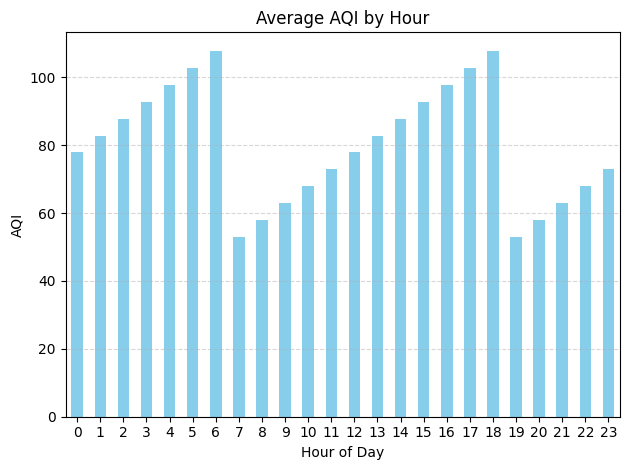

In [23]:
import matplotlib.pyplot as plt

# Plot average AQI by hour with light blue bars
ax = df.groupby("hour_of_day")["aqi_index"].mean().plot(
    kind="bar",
    title="Average AQI by Hour",
    color='skyblue'  # light blue color
)

ax.set_xlabel("Hour of Day")
ax.set_ylabel("AQI")

plt.xticks(rotation=0)  # Keep hour labels straight (horizontal)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


FEATURE ENGINEERING

1. FOR TIME BASED FEATURES


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import os
import sys

# === CONFIGURATION ===
CSV_PATH = "karachi_aqi.csv"

# === Load data ===
if not os.path.exists(CSV_PATH):
    print(f"❌ File not found: {CSV_PATH}")
    sys.exit(1)

df = pd.read_csv(CSV_PATH)

# === Check required columns ===
required_cols = ["pm2_5", "date", "time"]
for col in required_cols:
    if col not in df.columns:
        print(f"❌ Missing required column: {col}")
        sys.exit(1)

df = df.dropna(subset=["pm2_5"])

# === Compute AQI from PM2.5 if not already present ===
def calculate_aqi_from_pm25(pm2_5):
    if pd.isna(pm2_5):
        return None
    if pm2_5 <= 12:
        return (50 / 12) * pm2_5
    elif pm2_5 <= 35.4:
        return ((100 - 51) / (35.4 - 12.1)) * (pm2_5 - 12.1) + 51
    elif pm2_5 <= 55.4:
        return ((150 - 101) / (55.4 - 35.5)) * (pm2_5 - 35.5) + 101
    else:
        return 200

if "AQI" not in df.columns:
    df["AQI"] = df["pm2_5"].apply(calculate_aqi_from_pm25)

df = df.dropna(subset=["AQI"])

# === Create timestamp ===
df["timestamp"] = pd.to_datetime(df["date"] + " " + df["time"])
df = df.sort_values("timestamp")

# === Feature selection ===
selected_features = [
    "pm2_5", "pm10", "co", "no2", "o3", "so2", "nh3",
    "temp", "humidity", "pressure", "wind_speed",
    "hour_of_day", "day_of_week", "is_weekend"
]
for i in range(1, 7):
    selected_features += [
        f"forecast_{i}_temp",
        f"forecast_{i}_humidity",
        f"forecast_{i}_pressure",
        f"forecast_{i}_wind_speed"
    ]

missing = [f for f in selected_features if f not in df.columns]
if missing:
    print(f"❌ Missing feature columns: {missing}")
    sys.exit(1)


In [25]:
# Show columns after deletion
print("\nRemaining columns:")
print(df.columns.tolist())



Remaining columns:
['date', 'time', 'hour_of_day', 'day_of_week', 'is_weekend', 'aqi_index', 'pm2_5', 'pm10', 'co', 'no2', 'o3', 'so2', 'nh3', 'temp', 'humidity', 'pressure', 'wind_speed', 'forecast_1_temp', 'forecast_1_humidity', 'forecast_1_pressure', 'forecast_1_wind_speed', 'forecast_2_temp', 'forecast_2_humidity', 'forecast_2_pressure', 'forecast_2_wind_speed', 'forecast_3_temp', 'forecast_3_humidity', 'forecast_3_pressure', 'forecast_3_wind_speed', 'forecast_4_temp', 'forecast_4_humidity', 'forecast_4_pressure', 'forecast_4_wind_speed', 'forecast_5_temp', 'forecast_5_humidity', 'forecast_5_pressure', 'forecast_5_wind_speed', 'forecast_6_temp', 'forecast_6_humidity', 'forecast_6_pressure', 'forecast_6_wind_speed', 'forecast_7_temp', 'forecast_7_humidity', 'forecast_7_pressure', 'forecast_7_wind_speed', 'forecast_8_temp', 'forecast_8_humidity', 'forecast_8_pressure', 'forecast_8_wind_speed', 'forecast_9_temp', 'forecast_9_humidity', 'forecast_9_pressure', 'forecast_9_wind_speed', 

 2. WITHOUT TIME BASED FEATURES

In [26]:
# === CONFIGURATION ===
CSV_PATH = "cleaned1_file.csv"

# === Load data ===
if not os.path.exists(CSV_PATH):
    print(f"❌ File not found: {CSV_PATH}")
    sys.exit(1)

df1 = pd.read_csv(CSV_PATH)

# === Check required columns ===
required_cols = [
    'aqi_index', 'pm2_5', 'pm10', 'co', 'no2', 'o3',
    'so2', 'nh3', 'temp', 'humidity', 'pressure', 'wind_speed'
]

missing = [col for col in required_cols if col not in df.columns]
if missing:
    print(f"❌ Missing required columns: {missing}")
    sys.exit(1)

df1 = df1.dropna(subset=["pm2_5", "aqi_index"])

# === Feature selection (NO timestamp or time-related features) ===
selected_features = [
    'pm2_5', 'pm10', 'co', 'no2', 'o3', 'so2', 'nh3',
    'temp', 'humidity', 'pressure', 'wind_speed'
]

target_col = "aqi_index"

# === Final check for features ===
missing_feats = [f for f in selected_features if f not in df.columns]
if missing_feats:
    print(f"❌ Missing feature columns: {missing_feats}")
    sys.exit(1)


TRAINING THE MODEL

1. WITH TIME BASED FEATURES

In [27]:
X = df[selected_features].copy()
y = df["AQI"]

2. WITHOUT TIME BASED FEATURES

In [28]:
# === Prepare data ===
X1 = df1[selected_features].copy()
y1 = df1[target_col]

1.  **LIGHTGBM MODEL - WITH TIME BASED FEATURES**

In [29]:
# === TimeSeries Cross-validation ===
tscv = TimeSeriesSplit(n_splits=5)

In [30]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import joblib
import lightgbm as lgb
import shap  #  SHAP library

# === Drop constant or near-constant columns ===
X = X.loc[:, X.nunique() > 1]

# === TimeSeriesSplit ===
tscv = TimeSeriesSplit(n_splits=5)
mae_list, rmse_list, r2_list = [], [], []

# === Define LightGBM ===
model = lgb.LGBMRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

print(" Training LightGBM...")

# === Cross-validation training and evaluation ===
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae_list.append(mean_absolute_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_list.append(r2_score(y_test, y_pred))

# === Final full-data model training ===
model.fit(X, y)
joblib.dump(model, "model_lightgbm.pkl")


# === Predict full data for visualization ===
y_pred_all = model.predict(X)


# === Print average metrics ===
print("Evaluation Metrics :")
print(f"   MAE       : {np.mean(mae_list):.2f}")
print(f"   RMSE      : {np.mean(rmse_list):.2f}")
print(f"   R² Score  : {np.mean(r2_list):.2f}")
print(f"   Accuracy  : {np.mean(r2_list) * 100:.2f}%")




 Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 431
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 11
[LightGBM] [Info] Start training from score 111.880097
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

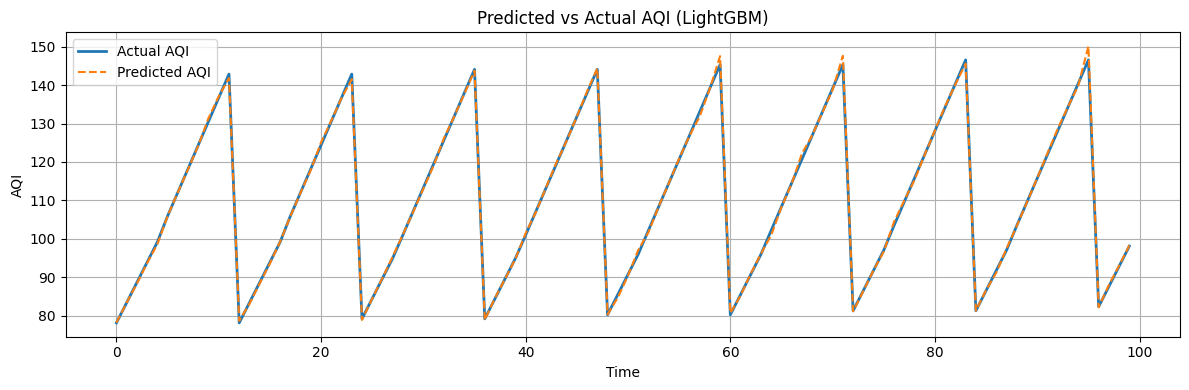

In [31]:
# === Plot first 100 predictions ===
plt.figure(figsize=(12, 4))
plt.plot(y.values[:100], label="Actual AQI", linewidth=2)
plt.plot(y_pred_all[:100], label="Predicted AQI", linestyle="--")
plt.title("Predicted vs Actual AQI (LightGBM)")
plt.xlabel("Time")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plot_accuracy_lightgbm.png")


SHAP explanations
Saved SHAP summary plot to shap_summary_lightgbm.png
 Saved SHAP bar plot to shap_bar_lightgbm.png


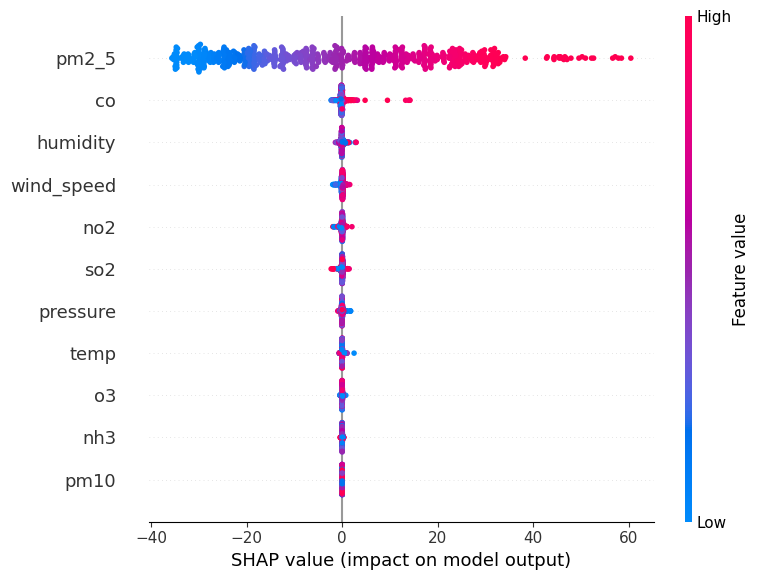

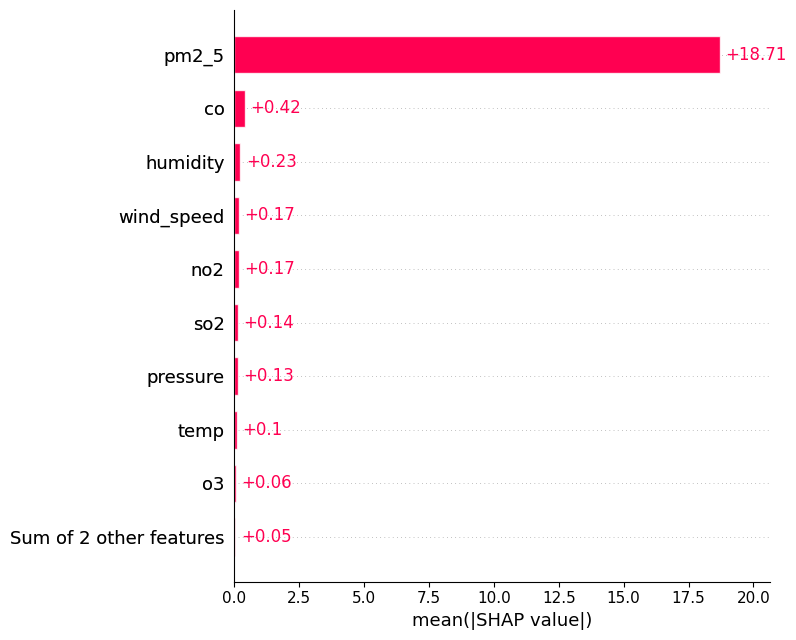

In [32]:
# === SHAP Explainability ===
print("SHAP explanations")
explainer = shap.Explainer(model)
shap_values = explainer(X)

# === SHAP summary plot ===
plt.figure()
shap.summary_plot(shap_values, X, show=False)
plt.tight_layout()
plt.savefig("shap_summary_lightgbm.png")
print("Saved SHAP summary plot to shap_summary_lightgbm.png")

# === SHAP bar plot ===
plt.figure()
shap.plots.bar(shap_values, show=False)
plt.tight_layout()
plt.savefig("shap_bar_lightgbm.png")
print(" Saved SHAP bar plot to shap_bar_lightgbm.png")

**1.LIGHTGBM MODEL - WITHOUT TIME BASED FEATURES**

In [33]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import joblib
import lightgbm as lgb
import shap  #  SHAP library

# === Drop constant or near-constant columns ===
X1 = X1.loc[:, X1.nunique() > 1]

# === TimeSeriesSplit ===
tscv = TimeSeriesSplit(n_splits=5)
mae_list, rmse_list, r2_list = [], [], []

# === Define LightGBM ===
model = lgb.LGBMRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

print(" Training LightGBM...")


# === TimeSeriesSplit and Evaluation ===
tscv = TimeSeriesSplit(n_splits=5)
mae_list, rmse_list, r2_list = [], [], []

# === Cross-validation training and evaluation ===
for train_idx, test_idx in tscv.split(X1):
    X2_train, X2_test = X1.iloc[train_idx], X1.iloc[test_idx]
    y2_train, y2_test = y1.iloc[train_idx], y1.iloc[test_idx]

    model.fit(X2_train, y2_train)
    y2_pred = model.predict(X2_test)

    mae_list.append(mean_absolute_error(y2_test, y2_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y2_test, y2_pred)))
    r2_list.append(r2_score(y2_test, y2_pred))

# === Final full-data model training ===
model.fit(X1, y1)
joblib.dump(model, "model_lightgbm1.pkl")


# === Predict full data for visualization ===
y_pred_all2 = model.predict(X1)



# === Print average metrics ===
print("Evaluation Metrics :")
print(f"   MAE       : {np.mean(mae_list):.2f}")
print(f"   RMSE      : {np.mean(rmse_list):.2f}")
print(f"   R² Score  : {np.mean(r2_list):.2f}")
print(f"   Accuracy  : {np.mean(r2_list) * 100:.2f}%")

 Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 431
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 11
[LightGBM] [Info] Start training from score 79.500000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

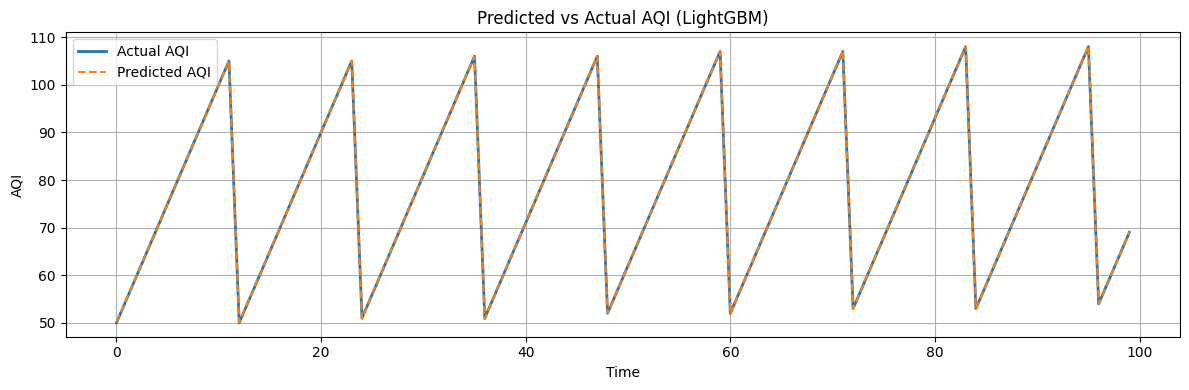

In [34]:
# === Plot first 100 predictions ===
plt.figure(figsize=(12, 4))
plt.plot(y1.values[:100], label="Actual AQI", linewidth=2)
plt.plot(y_pred_all2[:100], label="Predicted AQI", linestyle="--")
plt.title("Predicted vs Actual AQI (LightGBM)")
plt.xlabel("Time")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plot_accuracy_lightgbm.png")

SHAP explanations
Saved SHAP summary plot to shap_summary_lightgbm.png
 Saved SHAP bar plot to shap_bar_lightgbm.png


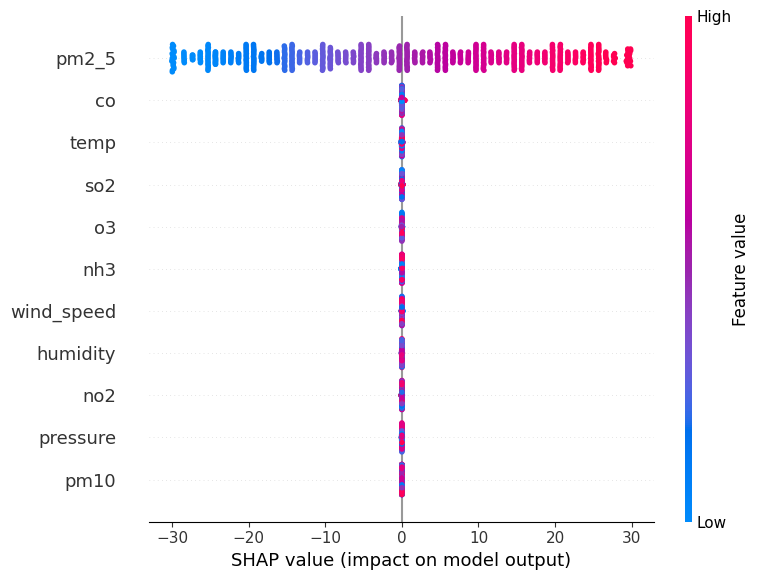

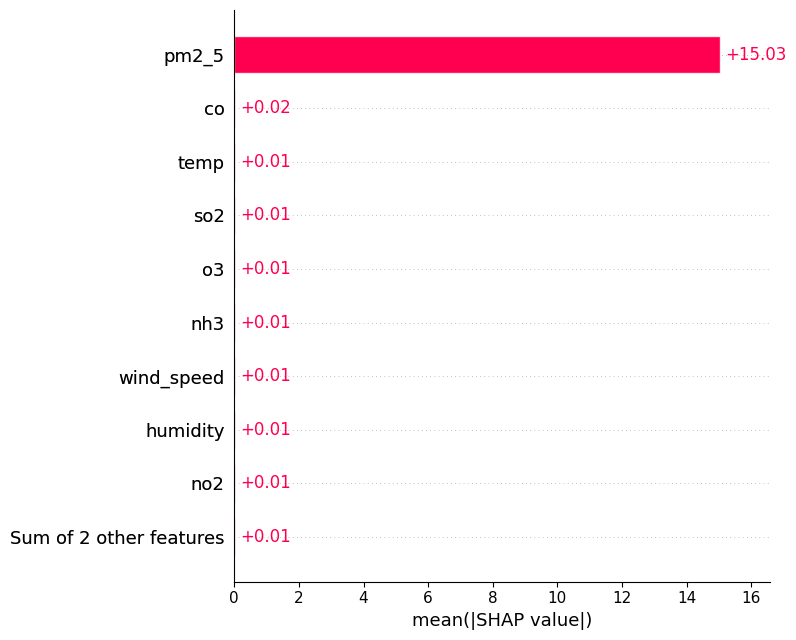

In [35]:
# === SHAP Explainability ===
print("SHAP explanations")
explainer = shap.Explainer(model)
shap_values = explainer(X1)

# === SHAP summary plot ===
plt.figure()
shap.summary_plot(shap_values, X1, show=False)
plt.tight_layout()
plt.savefig("shap_summary_lightgbm.png")
print("Saved SHAP summary plot to shap_summary_lightgbm.png")

# === SHAP bar plot ===
plt.figure()
shap.plots.bar(shap_values, show=False)
plt.tight_layout()
plt.savefig("shap_bar_lightgbm.png")
print(" Saved SHAP bar plot to shap_bar_lightgbm.png")

2. **XGBoost model - WITH TIME BASED FEATURES**

In [36]:
from xgboost import XGBRegressor

# === XGBoost Model ===
model1 = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

print("Training XGBoost")

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model1.fit(X_train, y_train)
    y_pred = model1.predict(X_test)

    mae_list.append(mean_absolute_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_list.append(r2_score(y_test, y_pred))

# === Final training ===
model1.fit(X, y)
joblib.dump(model1, "model_xgboost.pkl")


# === Predict full set ===
y_pred_all1 = model1.predict(X)


# === Evaluation Metrics ===
print("\nEvaluation Metrics (Average from XGBoost):")
print(f"   MAE       : {np.mean(mae_list):.2f}")
print(f"   RMSE      : {np.mean(rmse_list):.2f}")
print(f"   R² Score  : {np.mean(r2_list):.2f}")
print(f"   Accuracy  : {np.mean(r2_list) * 100:.2f}%")







Training XGBoost

Evaluation Metrics (Average from XGBoost):
   MAE       : 0.40
   RMSE      : 1.15
   R² Score  : 0.99
   Accuracy  : 98.92%


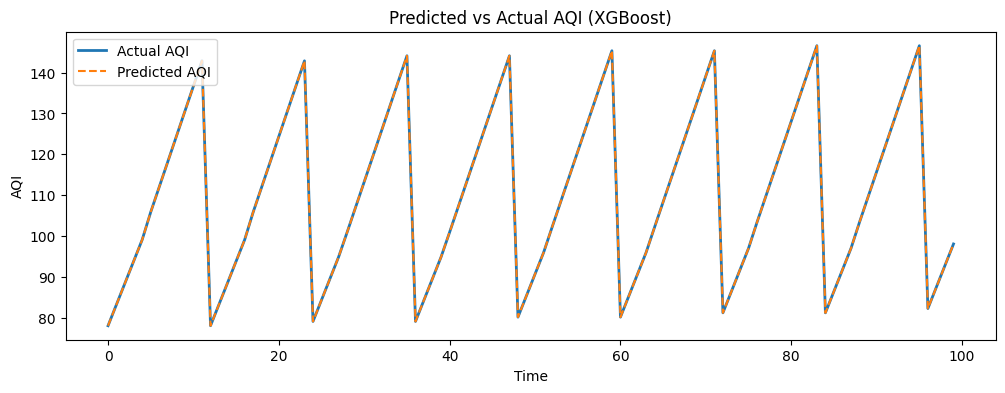

In [37]:
# === ACTUAL vs PREDICTED PLOT ===
plt.figure(figsize=(12, 4))
plt.plot(y.values[:100], label="Actual AQI", linewidth=2)
plt.plot(y_pred_all1[:100], label="Predicted AQI", linestyle="--")
plt.title("Predicted vs Actual AQI (XGBoost)")
plt.xlabel("Time")
plt.ylabel("AQI")
plt.legend()
plt.show()

SHAP explanations


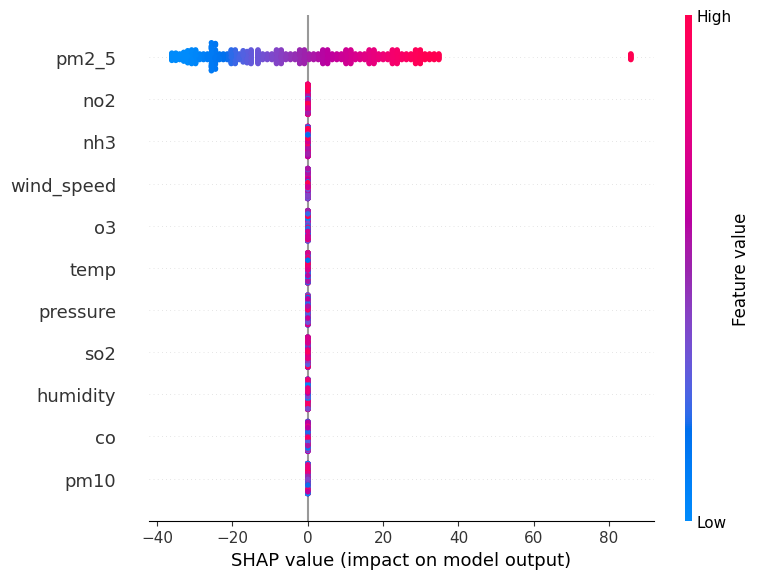

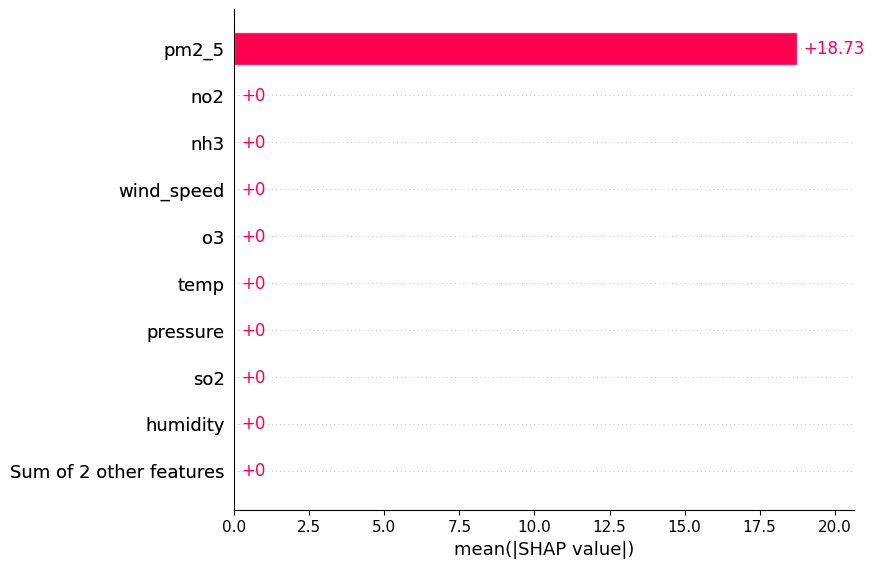

In [38]:
# === SHAP EXPLAINABILITY ===
print( "SHAP explanations")
explainer = shap.Explainer(model1, X)
shap_values = explainer(X)

# === SHAP Summary Plot ===
shap.summary_plot(shap_values, X)
# === SHAP Bar Plot ===
shap.plots.bar(shap_values)


3. RIDGE REGRESSION - WITH TIME BASED FEATURES

In [39]:
from sklearn.linear_model import Ridge

# Drop constant columns (if any)
X = X.loc[:, X.nunique() > 1]

# === TimeSeries Split ===
tscv = TimeSeriesSplit(n_splits=5)
mae_list, rmse_list, r2_list = [], [], []

# === Initialize Ridge Model ===
ridge_model = Ridge(alpha=1.0)

print("🚀 Training Ridge Regression Model...")

# === Cross-Validation Training ===
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)

    mae_list.append(mean_absolute_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_list.append(r2_score(y_test, y_pred))

# === Final Model Training on Full Data ===
ridge_model.fit(X, y)
joblib.dump(ridge_model, "model_ridge.pkl")

# === Evaluation Results ===
print("\n✅ Ridge Regression Evaluation Metrics:")
print(f"   MAE       : {np.mean(mae_list):.2f}")
print(f"   RMSE      : {np.mean(rmse_list):.2f}")
print(f"   R² Score  : {np.mean(r2_list):.2f}")
print(f"   Accuracy  : {np.mean(r2_list) * 100:.2f}%")


🚀 Training Ridge Regression Model...

✅ Ridge Regression Evaluation Metrics:
   MAE       : 1.58
   RMSE      : 5.41
   R² Score  : 0.94
   Accuracy  : 93.77%


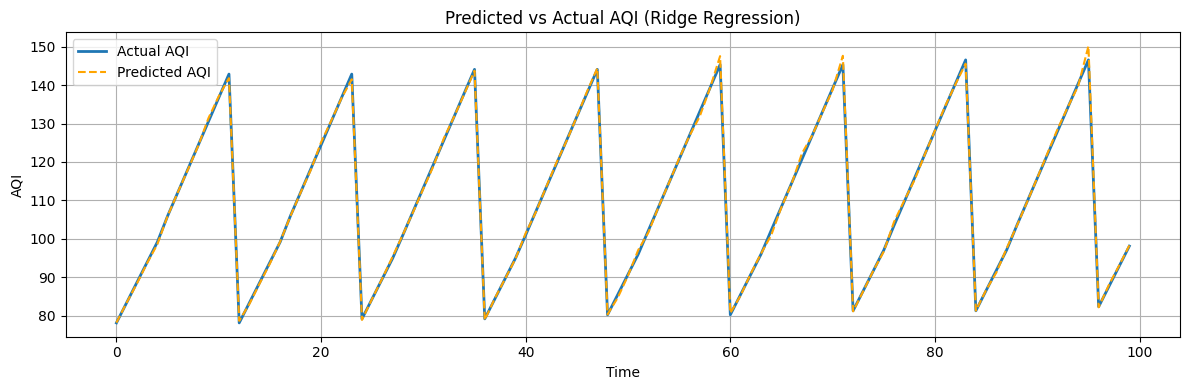

In [40]:
# === Plot first 100 predictions ===
plt.figure(figsize=(12, 4))
plt.plot(y.values[:100], label="Actual AQI", linewidth=2)
plt.plot(y_pred_all[:100], label="Predicted AQI", linestyle="--", color="orange")
plt.title("Predicted vs Actual AQI (Ridge Regression)")
plt.xlabel("Time")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plot_accuracy_ridge.png")


2. **XGBoost model - WITHOUT TIME BASED FEATURES**

In [41]:
# === XGBoost Model ===
model1 = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

print("Training XGBoost")

for train_idx, test_idx in tscv.split(X1):
    X3_train, X3_test = X1.iloc[train_idx], X1.iloc[test_idx]
    y3_train, y3_test = y1.iloc[train_idx], y1.iloc[test_idx]

    model1.fit(X3_train, y3_train)
    y3_pred = model1.predict(X3_test)

    mae_list.append(mean_absolute_error(y3_test, y3_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y3_test, y3_pred)))
    r2_list.append(r2_score(y3_test, y3_pred))

# === Final training ===
model1.fit(X1, y1)
joblib.dump(model1, "model_xgboost1.pkl")


# === Predict full set ===
y_pred_all3 = model1.predict(X1)


# === Evaluation Metrics ===
print("\nEvaluation Metrics (Average from XGBoost):")
print(f"   MAE       : {np.mean(mae_list):.2f}")
print(f"   RMSE      : {np.mean(rmse_list):.2f}")
print(f"   R² Score  : {np.mean(r2_list):.2f}")
print(f"   Accuracy  : {np.mean(r2_list) * 100:.2f}%")

Training XGBoost

Evaluation Metrics (Average from XGBoost):
   MAE       : 0.79
   RMSE      : 2.73
   R² Score  : 0.97
   Accuracy  : 96.88%


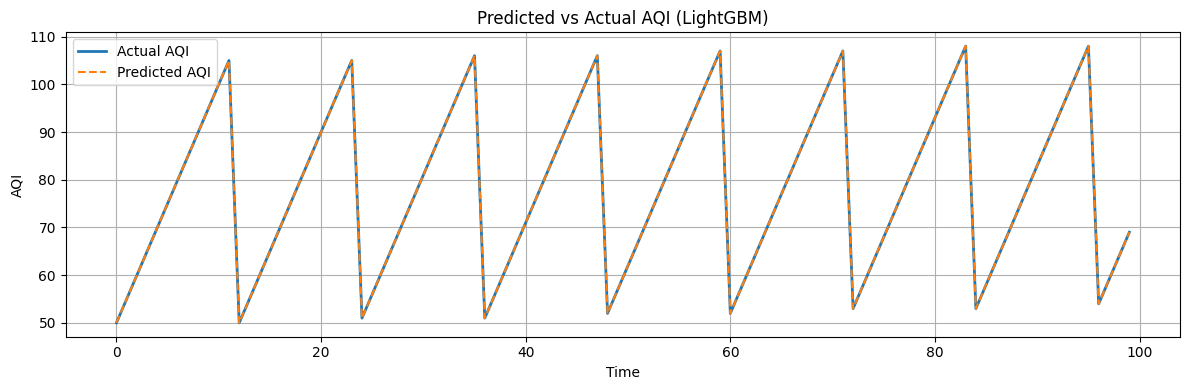

In [42]:
# === Plot first 100 predictions ===
plt.figure(figsize=(12, 4))
plt.plot(y1.values[:100], label="Actual AQI", linewidth=2)
plt.plot(y_pred_all3[:100], label="Predicted AQI", linestyle="--")
plt.title("Predicted vs Actual AQI (LightGBM)")
plt.xlabel("Time")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plot_accuracy_lightgbm.png")

SHAP explanations
Saved SHAP summary plot to shap_summary_lightgbm.png
 Saved SHAP bar plot to shap_bar_lightgbm.png


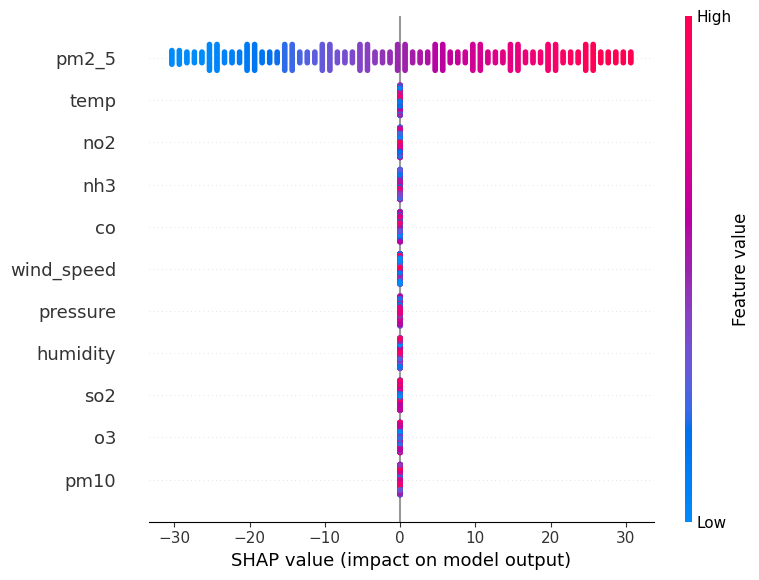

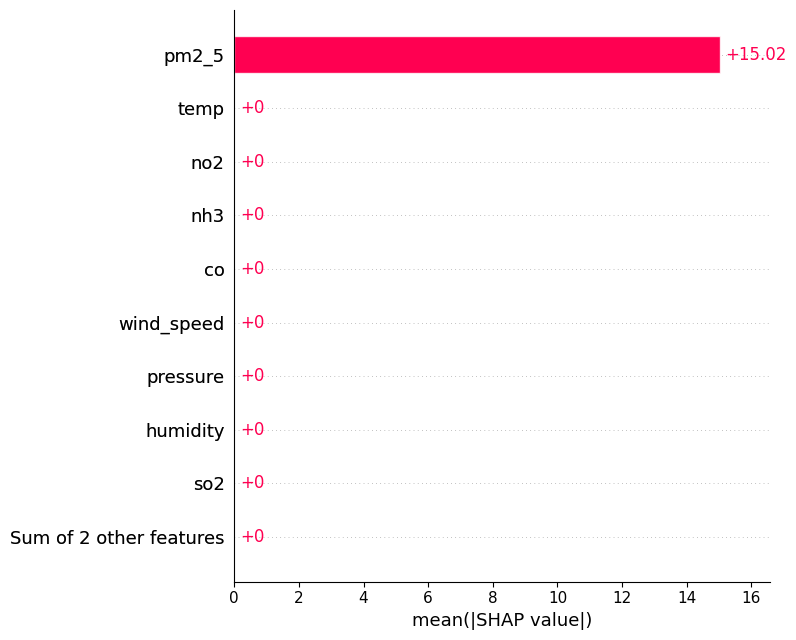

In [43]:
# === SHAP Explainability ===
print("SHAP explanations")
explainer = shap.Explainer(model1)
shap_values = explainer(X1)

# === SHAP summary plot ===
plt.figure()
shap.summary_plot(shap_values, X1, show=False)
plt.tight_layout()
plt.savefig("shap_summary_lightgbm.png")
print("Saved SHAP summary plot to shap_summary_lightgbm.png")

# === SHAP bar plot ===
plt.figure()
shap.plots.bar(shap_values, show=False)
plt.tight_layout()
plt.savefig("shap_bar_lightgbm.png")
print(" Saved SHAP bar plot to shap_bar_lightgbm.png")

3. Regression Model  - WITH TIME BASED FEATURES


In [44]:
# === Initialize Linear Regression Model ===
model2 = LinearRegression()
print("Linear Regression...")

# === TimeSeries Cross-validation Training ===
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model2.fit(X_train, y_train)
    y_pred = model2.predict(X_test)

    mae_list.append(mean_absolute_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_list.append(r2_score(y_test, y_pred))

# === Final Training on All Data ===
model2.fit(X, y)
joblib.dump(model2, "model_linear.pkl")
print("✅ Model saved to model_linear.pkl")

# === Predict on Full Dataset ===
y_pred_all2 = model2.predict(X)

# === Print Metrics ===
print("\n📈 Evaluation Metrics (Average from TimeSeriesSplit):")
print(f"   MAE       : {np.mean(mae_list):.2f}")
print(f"   RMSE      : {np.mean(rmse_list):.2f}")
print(f"   R² Score  : {np.mean(r2_list):.2f}")
print(f"   Accuracy  : {np.mean(r2_list) * 100:.2f}%")




Linear Regression...
✅ Model saved to model_linear.pkl

📈 Evaluation Metrics (Average from TimeSeriesSplit):
   MAE       : 1.05
   RMSE      : 3.62
   R² Score  : 0.96
   Accuracy  : 95.85%


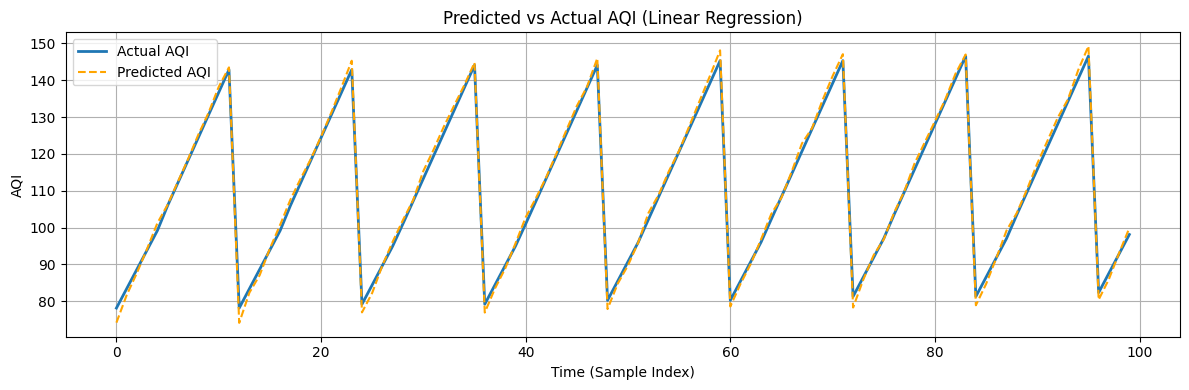

In [45]:
# === Plot Actual vs Predicted ===
plt.figure(figsize=(12, 4))
plt.plot(y.values[:100], label="Actual AQI", linewidth=2)
plt.plot(y_pred_all2[:100], label="Predicted AQI", linestyle="--", color="orange")
plt.title("Predicted vs Actual AQI (Linear Regression)")
plt.xlabel("Time (Sample Index)")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

🔍 Generating SHAP explanations...


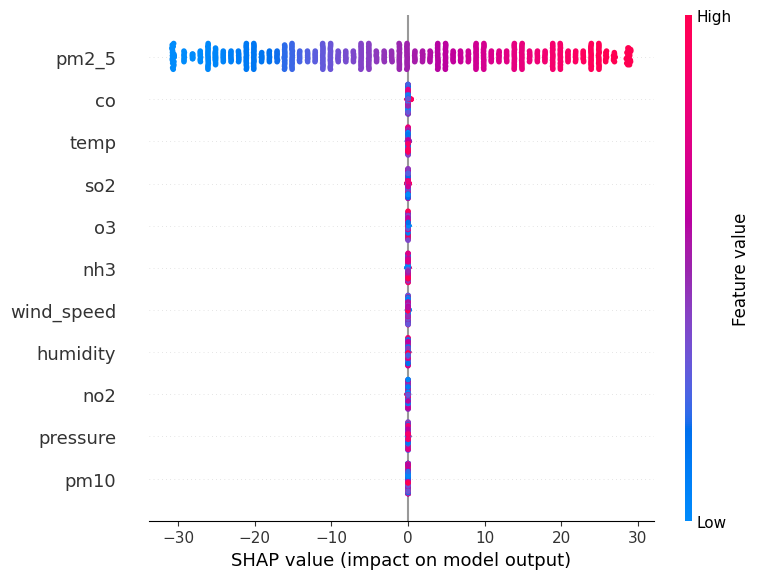

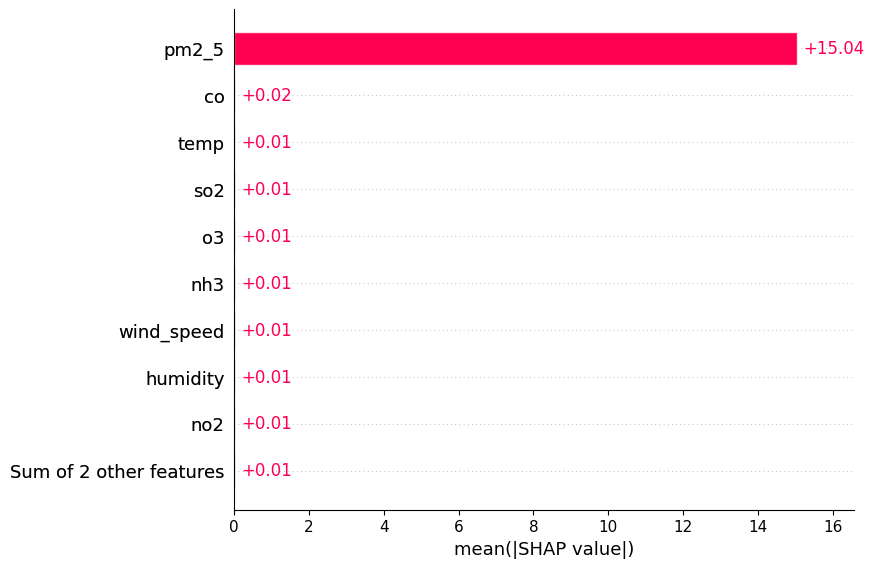

In [46]:
# === SHAP Explainability ===
print("🔍 Generating SHAP explanations...")
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# SHAP summary plot
shap.summary_plot(shap_values, X)

# SHAP bar plot
shap.plots.bar(shap_values)

3. Regression Model  - WITHOUT TIME BASED FEATURES

In [47]:
# === Initialize Linear Regression Model ===
model2 = LinearRegression()
print("Linear Regression...")

# === TimeSeries Cross-validation Training ===
for train_idx, test_idx in tscv.split(X):
    X4_train, X4_test = X1.iloc[train_idx], X1.iloc[test_idx]
    y4_train, y4_test = y1.iloc[train_idx], y1.iloc[test_idx]

    model2.fit(X4_train, y4_train)
    y_pred4 = model2.predict(X4_test)

    mae_list.append(mean_absolute_error(y4_test, y_pred4))
    rmse_list.append(np.sqrt(mean_squared_error(y4_test, y_pred4)))
    r2_list.append(r2_score(y4_test, y_pred4))

# === Final Training on All Data ===
model2.fit(X1, y1)
joblib.dump(model2, "model_linear1.pkl")
print("✅ Model saved to model_linear.pkl")

# === Predict on Full Dataset ===
y_pred_all4 = model2.predict(X1)

# === Print Metrics ===
print("\n📈 Evaluation Metrics (Average from TimeSeriesSplit):")
print(f"   MAE       : {np.mean(mae_list):.2f}")
print(f"   RMSE      : {np.mean(rmse_list):.2f}")
print(f"   R² Score  : {np.mean(r2_list):.2f}")
print(f"   Accuracy  : {np.mean(r2_list) * 100:.2f}%")


Linear Regression...
✅ Model saved to model_linear.pkl

📈 Evaluation Metrics (Average from TimeSeriesSplit):
   MAE       : 0.79
   RMSE      : 2.72
   R² Score  : 0.97
   Accuracy  : 96.88%


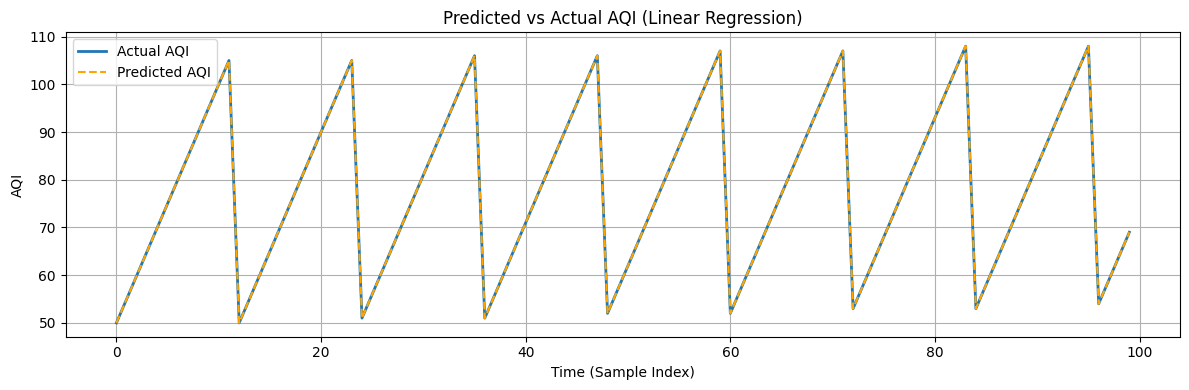

In [48]:
# === Plot Actual vs Predicted ===
plt.figure(figsize=(12, 4))
plt.plot(y1.values[:100], label="Actual AQI", linewidth=2)
plt.plot(y_pred_all4[:100], label="Predicted AQI", linestyle="--", color="orange")
plt.title("Predicted vs Actual AQI (Linear Regression)")
plt.xlabel("Time (Sample Index)")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**DEEP LEARNING MODEL**

LSTM - WITH TIME BASED FEATURES

In [49]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# === Load and clean data ===
df = pd.read_csv("karachi_aqi.csv")
df = df.dropna()

# Drop unnecessary columns
df = df.drop(columns=['date', 'time'], errors='ignore')

# Ensure AQI exists
if 'aqi_index' not in df.columns:
    raise ValueError("❌ 'aqi_index' column is missing!")

# Print actual AQI range before scaling
print("📊 AQI Range Before Scaling:")
print(f"Min AQI: {df['aqi_index'].min()} | Max AQI: {df['aqi_index'].max()}")

# === Add lag feature for AQI to simulate time context ===
for lag in range(1, 25):  # 24-hour lag
    df[f"aqi_index_lag_{lag}"] = df["aqi_index"].shift(lag)

df = df.dropna()

# === Define target and features ===
target_col = 'aqi_index'
feature_cols = df.columns.tolist()
feature_cols.remove(target_col)

# === Scale features and target using RobustScaler ===
scaler_X = RobustScaler()
X_scaled = scaler_X.fit_transform(df[feature_cols])

scaler_y = RobustScaler()
y_scaled = scaler_y.fit_transform(df[[target_col]])

# === Create LSTM sequences (24-hour window) ===
sequence_length = 24
X_seq, y_seq = [], []

for i in range(sequence_length, len(X_scaled)):
    X_seq.append(X_scaled[i-sequence_length:i])
    y_seq.append(y_scaled[i])  # Predict AQI at time t

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# === Train-test split ===
split_idx = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]

# === Build improved LSTM model ===
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.1),
    LSTM(64),
    Dropout(0.1),
    Dense(1)
])

model.compile(optimizer='adam', loss='mae')  # Use MAE loss
model.summary()

# === Early stopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# === Train model ===
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# === Predict and inverse scale ===
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

# === Print predicted range
print("\n📈 AQI Range After Prediction:")
print(f"Min Predicted AQI: {y_pred.min():.2f}, Max Predicted AQI: {y_pred.max():.2f}")

# === Evaluation ===
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print("\n=== Evaluation Metrics ===")
print(f"MAE       : {mae:.2f}")
print(f"RMSE      : {rmse:.2f}")
print(f"R² Score  : {r2:.2f}")
print(f"Accuracy  : {r2 * 100:.2f}%")

# === Save model and scalers ===
model.save("model_lstm_aqi_fixed.keras")
joblib.dump(scaler_X, "scaler_X_fixed.save")
joblib.dump(scaler_y, "scaler_y_fixed.save")






📊 AQI Range Before Scaling:
Min AQI: 50 | Max AQI: 111


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 128)        │       134,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,129 (719.25 KB)

 Trainable params: 184,129 (719.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.4122 - val_loss: 0.2740
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.2534 - val_loss: 0.2051
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.1942 - val_loss: 0.1417
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.1517 - val_loss: 0.1199
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.1171 - val_loss: 0.1074
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1018 - val_loss: 0.0749
Epoch 7/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0739 - val_loss: 0.0589
Epoch 8/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0679 - val_loss: 0.0587
Epoch 9/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0643 - val_loss: 0.0525
Epoch 10/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0556 - val_loss: 0.0398
Epoch 11/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0619 - val_loss: 0.0565
Epoch 12/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/ste

['scaler_y_fixed.save']

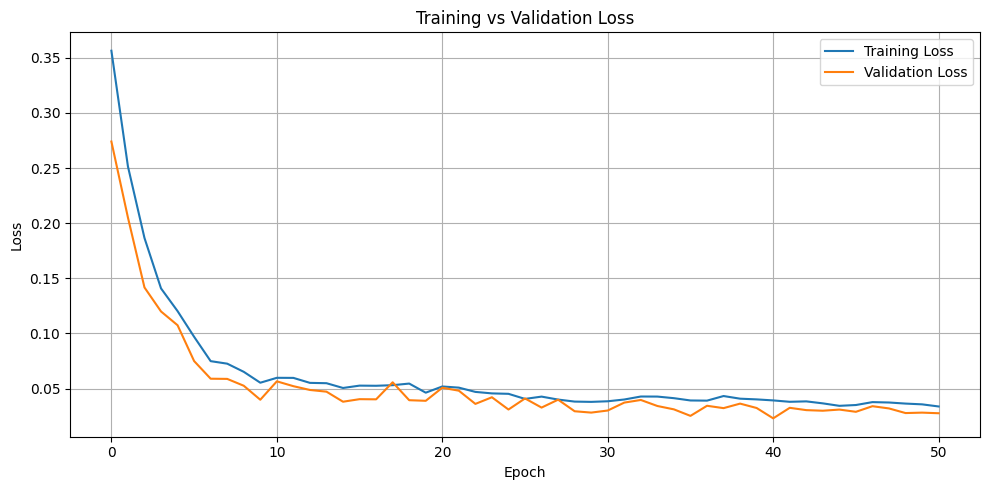

In [50]:
# === Plot training loss ===
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

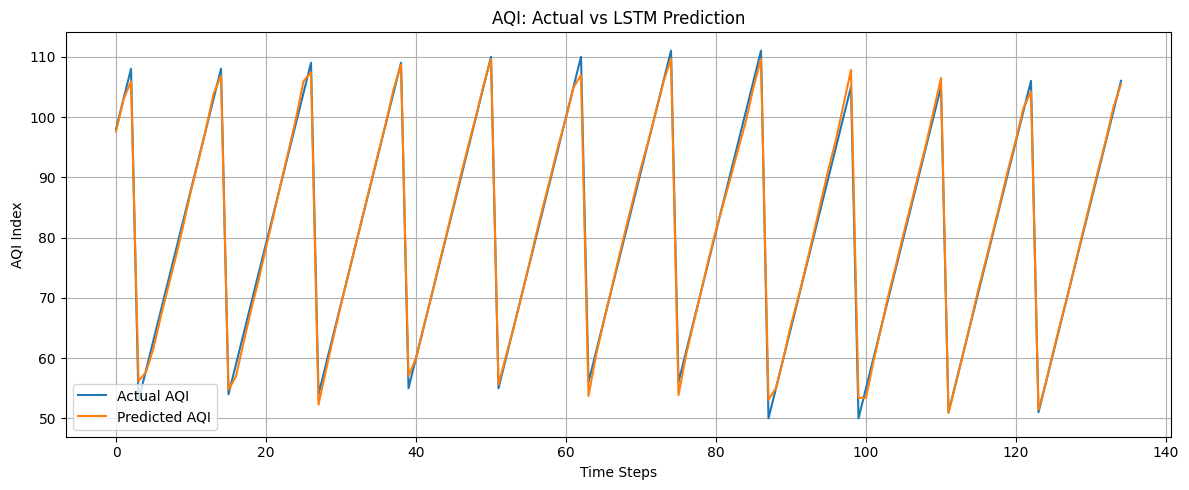

In [51]:
# === Plot predicted vs actual AQI ===
plt.figure(figsize=(12, 5))
plt.plot(y_true[:200], label='Actual AQI')
plt.plot(y_pred[:200], label='Predicted AQI')
plt.title('AQI: Actual vs LSTM Prediction')
plt.xlabel('Time Steps')
plt.ylabel('AQI Index')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

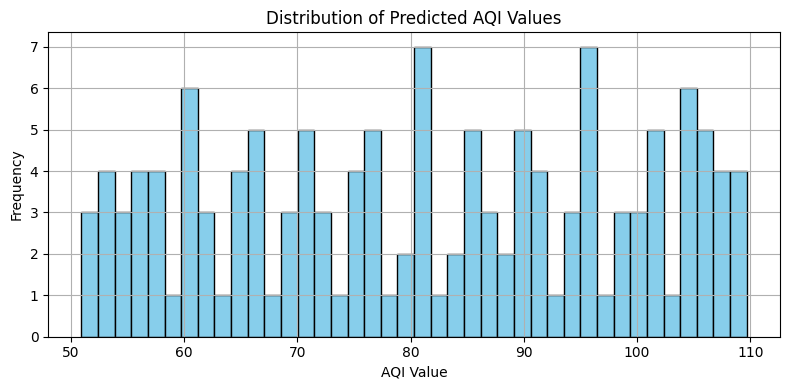

In [52]:
# === Plot predicted AQI distribution ===
plt.figure(figsize=(8, 4))
plt.hist(y_pred, bins=40, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted AQI Values')
plt.xlabel('AQI Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


2. LSTM - WITHOUT TIME BASED FEATURES

In [53]:
from sklearn.preprocessing import MinMaxScaler
# === Load and prepare data ===
df = pd.read_csv("karachi_aqi.csv")
df = df.dropna()

# Define desired features
selected_features = ['aqi_index', 'pm2_5', 'pm10', 'co', 'no2', 'o3', 'so2', 'nh3', 'temp', 'humidity', 'pressure', 'wind_speed']

# Filter only required columns
df = df[selected_features]

# Define target and features
target_col = "aqi_index"
feature_cols = [col for col in selected_features if col != target_col]

# Scale features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(df[feature_cols])

# Scale target
target_values = df[target_col].values.reshape(-1, 1)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(target_values)

# === Create sequences for LSTM ===
sequence_length = 24  # using past 24 hours to predict next AQI
X_seq, y_seq = [], []
for i in range(len(X_scaled) - sequence_length):
    X_seq.append(X_scaled[i:i+sequence_length])
    y_seq.append(y_scaled[i+sequence_length])

X_seq, y_seq = np.array(X_seq), np.array(y_seq)

# === Train/test split ===
split_idx = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]

# === Define LSTM model ===
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# === Train ===
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# === Predict and inverse scale ===
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 24, 64)         │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,905 (124.63 KB)

 Trainable params: 31,905 (124.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.1518 - val_loss: 0.0986
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0927 - val_loss: 0.0810
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0905 - val_loss: 0.0817
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0879 - val_loss: 0.0770
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0798 - val_loss: 0.0740
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0807 - val_loss: 0.0710
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0737 - val_loss: 0.0648
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0661 - val_loss: 0.0533
Epoch 9/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0455 - val_loss: 0.0381
Epoch 10/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0416 - val_loss: 0.0329
Epoch 11/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0344 - val_loss: 0.0295
Epoch 12/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0

In [54]:
# === Evaluation ===
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print("\nEvaluation Metrics:")
print(f"MAE       : {mae:.2f}")
print(f"RMSE      : {rmse:.2f}")
print(f"R^2 Score : {r2:.2f}")

# === Save model and scalers ===
model.save("model1_lstm.keras")                     # Saves the LSTM model
joblib.dump(scaler_X, "scaler_X1.save")             # Saves feature scaler
joblib.dump(scaler_y, "scaler_y1.save")             # Saves target scaler

print("✅ Model and scalers saved successfully.")


Evaluation Metrics:
MAE       : 1.94
RMSE      : 2.26
R^2 Score : 0.98
✅ Model and scalers saved successfully.


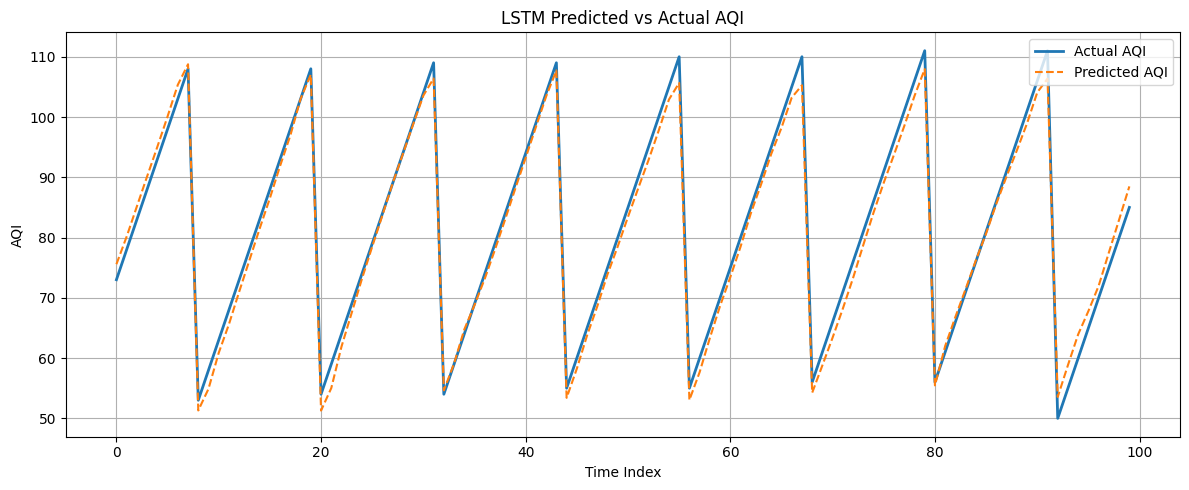

In [55]:
# === Plot predictions ===
plt.figure(figsize=(12, 5))
plt.plot(y_true[:100], label="Actual AQI", linewidth=2)
plt.plot(y_pred[:100], label="Predicted AQI", linestyle="--")
plt.title("LSTM Predicted vs Actual AQI")
plt.xlabel("Time Index")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("lstm_predicted_vs_actual.png")

 **INFERENCE**

PREDICTION USING LIGHTGBM MODEL

1. USING DATETIME FROM DATASET - TRAINING



In [56]:
# === Load trained LightGBM model ===
model = joblib.load("model_lightgbm.pkl")

# === Extract expected features from model ===
feature_columns = model.feature_name_

# === Load full feature dataset ===
df = pd.read_csv("karachi_aqi.csv")

# === Validate required features ===
missing_cols = set(feature_columns) - set(df.columns)
if missing_cols:
    raise ValueError(f" Missing columns in karachi.csv: {missing_cols}")

# === Get last 72 rows (3 days of hourly data) ===
df_last = df.tail(72).copy()

# === Align features for prediction ===
X = df_last[feature_columns]

# === Predict AQI ===
y_pred = model.predict(X)

# === Get datetime (optional) ===
if "datetime" in df_last.columns:
    datetime_col = pd.to_datetime(df_last["datetime"])
else:
    datetime_col = pd.date_range(start="2025-06-26", periods=len(X), freq="H")

# === Print Predictions ===
print("\n📈 Predicted AQI for Next 3 Days:")
for dt, pred in zip(datetime_col, y_pred):
    print(f"{dt} → AQI: {round(pred, 2)}")





📈 Predicted AQI for Next 3 Days:
2025-06-26 00:00:00 → AQI: 84.34
2025-06-26 01:00:00 → AQI: 89.64
2025-06-26 02:00:00 → AQI: 94.77
2025-06-26 03:00:00 → AQI: 101.97
2025-06-26 04:00:00 → AQI: 107.31
2025-06-26 05:00:00 → AQI: 113.22
2025-06-26 06:00:00 → AQI: 119.41
2025-06-26 07:00:00 → AQI: 125.49
2025-06-26 08:00:00 → AQI: 131.55
2025-06-26 09:00:00 → AQI: 138.99
2025-06-26 10:00:00 → AQI: 144.74
2025-06-26 11:00:00 → AQI: 193.2
2025-06-26 12:00:00 → AQI: 84.62
2025-06-26 13:00:00 → AQI: 89.87
2025-06-26 14:00:00 → AQI: 94.79
2025-06-26 15:00:00 → AQI: 101.08
2025-06-26 16:00:00 → AQI: 106.72
2025-06-26 17:00:00 → AQI: 113.3
2025-06-26 18:00:00 → AQI: 119.61
2025-06-26 19:00:00 → AQI: 125.04
2025-06-26 20:00:00 → AQI: 131.47
2025-06-26 21:00:00 → AQI: 136.95
2025-06-26 22:00:00 → AQI: 143.15
2025-06-26 23:00:00 → AQI: 189.75
2025-06-27 00:00:00 → AQI: 78.33
2025-06-27 01:00:00 → AQI: 83.02
2025-06-27 02:00:00 → AQI: 88.81
2025-06-27 03:00:00 → AQI: 93.79
2025-06-27 04:00:00 → AQI:

/tmp/ipython-input-56-3548917454.py:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  datetime_col = pd.date_range(start="2025-06-26", periods=len(X), freq="H")


2. USING CURRENT DATETIME - TESTING

In [57]:
import datetime

# === Load trained LightGBM model ===
model = joblib.load("model_lightgbm.pkl")

# === Extract expected features from model ===
feature_columns = model.feature_name_

# === Load full feature dataset ===
df = pd.read_csv("karachi_aqi.csv")

# === Validate required features ===
missing_cols = set(feature_columns) - set(df.columns)
if missing_cols:
    raise ValueError(f" Missing columns in karachi.csv: {missing_cols}")

# === Get last 72 rows (3 days of hourly data) ===
df_last = df.tail(72).copy()

# === Align features for prediction ===
X = df_last[feature_columns]

# === Predict AQI ===
y_pred = model.predict(X)

# === Generate timestamps (for current datetime ) ===
start_time = datetime.datetime.now()
timestamps = [start_time + datetime.timedelta(hours=i) for i in range(len(X))]

# === Print Predictions ===
print("\n📈 Predicted AQI for Next 3 Days:")
for dt, pred in zip(timestamps, y_pred):
    print(f"{dt.strftime('%Y-%m-%d %H:%M:%S')} → AQI: {round(pred, 2)}")


📈 Predicted AQI for Next 3 Days:
2025-07-03 18:16:56 → AQI: 84.34
2025-07-03 19:16:56 → AQI: 89.64
2025-07-03 20:16:56 → AQI: 94.77
2025-07-03 21:16:56 → AQI: 101.97
2025-07-03 22:16:56 → AQI: 107.31
2025-07-03 23:16:56 → AQI: 113.22
2025-07-04 00:16:56 → AQI: 119.41
2025-07-04 01:16:56 → AQI: 125.49
2025-07-04 02:16:56 → AQI: 131.55
2025-07-04 03:16:56 → AQI: 138.99
2025-07-04 04:16:56 → AQI: 144.74
2025-07-04 05:16:56 → AQI: 193.2
2025-07-04 06:16:56 → AQI: 84.62
2025-07-04 07:16:56 → AQI: 89.87
2025-07-04 08:16:56 → AQI: 94.79
2025-07-04 09:16:56 → AQI: 101.08
2025-07-04 10:16:56 → AQI: 106.72
2025-07-04 11:16:56 → AQI: 113.3
2025-07-04 12:16:56 → AQI: 119.61
2025-07-04 13:16:56 → AQI: 125.04
2025-07-04 14:16:56 → AQI: 131.47
2025-07-04 15:16:56 → AQI: 136.95
2025-07-04 16:16:56 → AQI: 143.15
2025-07-04 17:16:56 → AQI: 189.75
2025-07-04 18:16:56 → AQI: 78.33
2025-07-04 19:16:56 → AQI: 83.02
2025-07-04 20:16:56 → AQI: 88.81
2025-07-04 21:16:56 → AQI: 93.79
2025-07-04 22:16:56 → AQI:

PREDICTION USING XGBOOST MODEL

1. USING DATETIME FROM DATASET - TRAINING

In [58]:
# === Load trained XGBoost model ===
model = joblib.load("model_xgboost.pkl")

# === Extract expected feature names from model ===
feature_columns = model.feature_names_in_

# === Load full dataset with features ===
df = pd.read_csv("karachi_aqi.csv")

# === Check for missing features ===
missing_cols = set(feature_columns) - set(df.columns)
if missing_cols:
    raise ValueError(f"❌ Missing columns in karachi_aqi.csv: {missing_cols}")

# === Get last 72 rows (3 days hourly data) ===
df_last = df.tail(72).copy()

# === Prepare features ===
X = df_last[feature_columns]

# === Predict AQI ===
y_pred = model.predict(X)

# === Get datetime column (if exists) ===
if "datetime" in df_last.columns:
    datetime_col = pd.to_datetime(df_last["datetime"])
else:
    datetime_col = pd.date_range(start="2025-06-26", periods=72, freq="H")

# === Print Predictions ===
print("\n📈 Predicted AQI for Next 3 Days using XGBoost:")
for dt, pred in zip(datetime_col, y_pred):
    print(f"{dt} → AQI: {round(pred, 2)}")



📈 Predicted AQI for Next 3 Days using XGBoost:
2025-06-26 00:00:00 → AQI: 84.44000244140625
2025-06-26 01:00:00 → AQI: 89.69999694824219
2025-06-26 02:00:00 → AQI: 94.94999694824219
2025-06-26 03:00:00 → AQI: 101.0
2025-06-26 04:00:00 → AQI: 107.16000366210938
2025-06-26 05:00:00 → AQI: 113.30999755859375
2025-06-26 06:00:00 → AQI: 119.47000122070312
2025-06-26 07:00:00 → AQI: 125.62000274658203
2025-06-26 08:00:00 → AQI: 131.77999877929688
2025-06-26 09:00:00 → AQI: 137.92999267578125
2025-06-26 10:00:00 → AQI: 144.08999633789062
2025-06-26 11:00:00 → AQI: 200.0
2025-06-26 12:00:00 → AQI: 84.44000244140625
2025-06-26 13:00:00 → AQI: 89.69999694824219
2025-06-26 14:00:00 → AQI: 94.94999694824219
2025-06-26 15:00:00 → AQI: 101.0
2025-06-26 16:00:00 → AQI: 107.16000366210938
2025-06-26 17:00:00 → AQI: 113.30999755859375
2025-06-26 18:00:00 → AQI: 119.47000122070312
2025-06-26 19:00:00 → AQI: 125.62000274658203
2025-06-26 20:00:00 → AQI: 131.77999877929688
2025-06-26 21:00:00 → AQI: 137.

/tmp/ipython-input-58-1750340235.py:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  datetime_col = pd.date_range(start="2025-06-26", periods=72, freq="H")


2. USING CURRENT DATETIME - TESTING


In [59]:
# === Load trained XGBoost model ===
model = joblib.load("model_xgboost.pkl")

# === Extract expected feature names from model ===
feature_columns = model.feature_names_in_

# === Load full feature dataset ===
df = pd.read_csv("karachi_aqi.csv")

# === Validate required features ===
missing_cols = set(feature_columns) - set(df.columns)
if missing_cols:
    raise ValueError(f" Missing columns in karachi.csv: {missing_cols}")

# === Get last 72 rows (3 days of hourly data) ===
df_last = df.tail(72).copy()

# === Align features for prediction ===
X = df_last[feature_columns]

# === Predict AQI ===
y_pred = model.predict(X)

# === Generate timestamps (for current datetime ) ===
start_time = datetime.datetime.now()
timestamps = [start_time + datetime.timedelta(hours=i) for i in range(len(X))]

# === Print Predictions ===
print("\n📈 Predicted AQI for Next 3 Days:")
for dt, pred in zip(timestamps, y_pred):
    print(f"{dt.strftime('%Y-%m-%d %H:%M:%S')} → AQI: {round(pred, 2)}")


📈 Predicted AQI for Next 3 Days:
2025-07-03 18:16:56 → AQI: 84.44000244140625
2025-07-03 19:16:56 → AQI: 89.69999694824219
2025-07-03 20:16:56 → AQI: 94.94999694824219
2025-07-03 21:16:56 → AQI: 101.0
2025-07-03 22:16:56 → AQI: 107.16000366210938
2025-07-03 23:16:56 → AQI: 113.30999755859375
2025-07-04 00:16:56 → AQI: 119.47000122070312
2025-07-04 01:16:56 → AQI: 125.62000274658203
2025-07-04 02:16:56 → AQI: 131.77999877929688
2025-07-04 03:16:56 → AQI: 137.92999267578125
2025-07-04 04:16:56 → AQI: 144.08999633789062
2025-07-04 05:16:56 → AQI: 200.0
2025-07-04 06:16:56 → AQI: 84.44000244140625
2025-07-04 07:16:56 → AQI: 89.69999694824219
2025-07-04 08:16:56 → AQI: 94.94999694824219
2025-07-04 09:16:56 → AQI: 101.0
2025-07-04 10:16:56 → AQI: 107.16000366210938
2025-07-04 11:16:56 → AQI: 113.30999755859375
2025-07-04 12:16:56 → AQI: 119.47000122070312
2025-07-04 13:16:56 → AQI: 125.62000274658203
2025-07-04 14:16:56 → AQI: 131.77999877929688
2025-07-04 15:16:56 → AQI: 137.92999267578125

PREDICTION USING LINEAR REGRESSION MODEL

 1. USING DATETIME FROM DATASET - TRAINING

In [60]:
# === Load trained Linear Regression model ===
model = joblib.load("model_linear.pkl")

# === Extract expected feature names from model ===
feature_columns = model.feature_names_in_

# === Load full dataset with features ===
df = pd.read_csv("karachi_aqi.csv")

# === Check for missing features ===
missing_cols = set(feature_columns) - set(df.columns)
if missing_cols:
    raise ValueError(f"❌ Missing columns in karachi_aqi.csv: {missing_cols}")

# === Get last 72 rows (3 days hourly data) ===
df_last = df.tail(72).copy()

# === Prepare features ===
X = df_last[feature_columns]

# === Predict AQI ===
y_pred = model.predict(X)

# === Get datetime column (if exists) ===
if "datetime" in df_last.columns:
    datetime_col = pd.to_datetime(df_last["datetime"])
else:
    datetime_col = pd.date_range(start="2025-06-26", periods=72, freq="H")

# === Print Predictions ===
print("\n📈 Predicted AQI for Next 3 Days using XGBoost:")
for dt, pred in zip(datetime_col, y_pred):
    print(f"{dt} → AQI: {round(pred, 2)}")


📈 Predicted AQI for Next 3 Days using XGBoost:
2025-06-26 00:00:00 → AQI: 83.77
2025-06-26 01:00:00 → AQI: 88.75
2025-06-26 02:00:00 → AQI: 96.16
2025-06-26 03:00:00 → AQI: 102.4
2025-06-26 04:00:00 → AQI: 107.43
2025-06-26 05:00:00 → AQI: 114.44
2025-06-26 06:00:00 → AQI: 120.2
2025-06-26 07:00:00 → AQI: 126.75
2025-06-26 08:00:00 → AQI: 133.53
2025-06-26 09:00:00 → AQI: 138.62
2025-06-26 10:00:00 → AQI: 145.82
2025-06-26 11:00:00 → AQI: 152.71
2025-06-26 12:00:00 → AQI: 81.6
2025-06-26 13:00:00 → AQI: 89.83
2025-06-26 14:00:00 → AQI: 94.66
2025-06-26 15:00:00 → AQI: 100.53
2025-06-26 16:00:00 → AQI: 108.87
2025-06-26 17:00:00 → AQI: 114.11
2025-06-26 18:00:00 → AQI: 120.32
2025-06-26 19:00:00 → AQI: 126.83
2025-06-26 20:00:00 → AQI: 132.92
2025-06-26 21:00:00 → AQI: 139.49
2025-06-26 22:00:00 → AQI: 145.97
2025-06-26 23:00:00 → AQI: 152.77
2025-06-27 00:00:00 → AQI: 75.82
2025-06-27 01:00:00 → AQI: 81.78
2025-06-27 02:00:00 → AQI: 87.26
2025-06-27 03:00:00 → AQI: 95.12
2025-06-27 04

/tmp/ipython-input-60-1478226016.py:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  datetime_col = pd.date_range(start="2025-06-26", periods=72, freq="H")


2. USING CURRENT DATETIME - TESTING

In [61]:
# === Load trained Linear Regression model ===
model = joblib.load("model_linear.pkl")

# === Extract expected feature names from model ===
feature_columns = model.feature_names_in_

# === Load full feature dataset ===
df = pd.read_csv("karachi_aqi.csv")

# === Validate required features ===
missing_cols = set(feature_columns) - set(df.columns)
if missing_cols:
    raise ValueError(f" Missing columns in karachi.csv: {missing_cols}")

# === Get last 72 rows (3 days of hourly data) ===
df_last = df.tail(72).copy()

# === Align features for prediction ===
X = df_last[feature_columns]

# === Predict AQI ===
y_pred = model.predict(X)

# === Generate timestamps (for current datetime ) ===
start_time = datetime.datetime.now()
timestamps = [start_time + datetime.timedelta(hours=i) for i in range(len(X))]

# === Print Predictions ===
print("\n📈 Predicted AQI for Next 3 Days:")
for dt, pred in zip(timestamps, y_pred):
    print(f"{dt.strftime('%Y-%m-%d %H:%M:%S')} → AQI: {round(pred, 2)}")


📈 Predicted AQI for Next 3 Days:
2025-07-03 18:16:56 → AQI: 83.77
2025-07-03 19:16:56 → AQI: 88.75
2025-07-03 20:16:56 → AQI: 96.16
2025-07-03 21:16:56 → AQI: 102.4
2025-07-03 22:16:56 → AQI: 107.43
2025-07-03 23:16:56 → AQI: 114.44
2025-07-04 00:16:56 → AQI: 120.2
2025-07-04 01:16:56 → AQI: 126.75
2025-07-04 02:16:56 → AQI: 133.53
2025-07-04 03:16:56 → AQI: 138.62
2025-07-04 04:16:56 → AQI: 145.82
2025-07-04 05:16:56 → AQI: 152.71
2025-07-04 06:16:56 → AQI: 81.6
2025-07-04 07:16:56 → AQI: 89.83
2025-07-04 08:16:56 → AQI: 94.66
2025-07-04 09:16:56 → AQI: 100.53
2025-07-04 10:16:56 → AQI: 108.87
2025-07-04 11:16:56 → AQI: 114.11
2025-07-04 12:16:56 → AQI: 120.32
2025-07-04 13:16:56 → AQI: 126.83
2025-07-04 14:16:56 → AQI: 132.92
2025-07-04 15:16:56 → AQI: 139.49
2025-07-04 16:16:56 → AQI: 145.97
2025-07-04 17:16:56 → AQI: 152.77
2025-07-04 18:16:56 → AQI: 75.82
2025-07-04 19:16:56 → AQI: 81.78
2025-07-04 20:16:56 → AQI: 87.26
2025-07-04 21:16:56 → AQI: 95.12
2025-07-04 22:16:56 → AQI: 

PREDICTION USING DEEP LEARNING MODEL

1. USING DATETIME FROM DATASET - TRAINING

In [62]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
import joblib

# === Load LSTM model and scalers ===
model = load_model("model_lstm_aqi_fixed.keras")
scaler_X = joblib.load("scaler_X_fixed.save")
scaler_y = joblib.load("scaler_y_fixed.save")

# === Load and clean data ===
df = pd.read_csv("karachi_aqi.csv").dropna()
df = df.drop(columns=["date", "time"], errors="ignore")

# Ensure 'aqi_index' exists
target_col = "aqi_index"
if target_col not in df.columns:
    raise ValueError("❌ 'aqi_index' column is missing from the dataset!")

# === Recreate the lag features needed by the model ===
for lag in range(1, 25):
    df[f"aqi_index_lag_{lag}"] = df[target_col].shift(lag)

df = df.dropna()

# === Ensure correct feature order as used in training ===
feature_cols = scaler_X.feature_names_in_
df = df[list(feature_cols) + [target_col]]

# === Get last 24 hours of data for prediction seed ===
latest_data = df.tail(24).copy()
X_input = scaler_X.transform(latest_data[feature_cols])
input_seq = np.array([X_input])  # shape = (1, 24, num_features)

# === Predict next 72 hours step-by-step ===
predictions = []

for _ in range(72):
    pred_scaled = model.predict(input_seq, verbose=0)[0][0]
    pred_actual = scaler_y.inverse_transform([[pred_scaled]])[0][0]
    predictions.append(pred_actual)

    # Prepare next input
    next_input = input_seq[0][1:].copy()       # Remove oldest step
    last_step = input_seq[0][-1].copy()        # Copy latest step

    # Update lag features with new prediction
    for i in range(1, 25):
        lag_col = f"aqi_index_lag_{i}"
        if lag_col in feature_cols:
            idx = list(feature_cols).index(lag_col)
            if len(predictions) >= i:
                last_step[idx] = predictions[-i]

    input_seq = np.append(next_input, [last_step], axis=0).reshape(1, 24, len(feature_cols))

# === Generate timestamps ===
start_time = pd.to_datetime("now").ceil("h")
timestamp_range = pd.date_range(start=start_time, periods=72, freq="H")

# === Print results ===
print("\n📈 Predicted AQI for Next 3 Days using LSTM:")
for dt, val in zip(timestamp_range, predictions):
    print(f"{dt} → AQI: {round(val, 2)}")



📈 Predicted AQI for Next 3 Days using LSTM:
2025-07-03 19:00:00 → AQI: 53.29
2025-07-03 20:00:00 → AQI: 50.63
2025-07-03 21:00:00 → AQI: 47.48
2025-07-03 22:00:00 → AQI: 43.6
2025-07-03 23:00:00 → AQI: 41.63
2025-07-04 00:00:00 → AQI: 43.88
2025-07-04 01:00:00 → AQI: 42.42
2025-07-04 02:00:00 → AQI: 44.99
2025-07-04 03:00:00 → AQI: 54.05
2025-07-04 04:00:00 → AQI: 62.51
2025-07-04 05:00:00 → AQI: 69.04
2025-07-04 06:00:00 → AQI: 73.56
2025-07-04 07:00:00 → AQI: 76.45
2025-07-04 08:00:00 → AQI: 72.33
2025-07-04 09:00:00 → AQI: 69.12
2025-07-04 10:00:00 → AQI: 64.72
2025-07-04 11:00:00 → AQI: 61.91
2025-07-04 12:00:00 → AQI: 60.0
2025-07-04 13:00:00 → AQI: 60.61
2025-07-04 14:00:00 → AQI: 65.07
2025-07-04 15:00:00 → AQI: 69.57
2025-07-04 16:00:00 → AQI: 71.28
2025-07-04 17:00:00 → AQI: 75.37
2025-07-04 18:00:00 → AQI: 79.96
2025-07-04 19:00:00 → AQI: 78.56
2025-07-04 20:00:00 → AQI: 74.84
2025-07-04 21:00:00 → AQI: 71.57
2025-07-04 22:00:00 → AQI: 71.83
2025-07-04 23:00:00 → AQI: 73.59


/tmp/ipython-input-62-450982118.py:59: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamp_range = pd.date_range(start=start_time, periods=72, freq="H")


2. USING CURRENT DATETIME - TESTING

In [63]:
import pandas as pd
import numpy as np
import joblib
import datetime
from tensorflow.keras.models import load_model

# === Load model and scalers ===
model = load_model("model_lstm_aqi_fixed.keras")
scaler_X = joblib.load("scaler_X_fixed.save")
scaler_y = joblib.load("scaler_y_fixed.save")

# === Load latest data ===
df = pd.read_csv("karachi_aqi.csv")

# === Recompute lag features for 'aqi_index' ===
target_col = "aqi_index"
for i in range(1, 25):
    df[f"{target_col}_lag_{i}"] = df[target_col].shift(i)

df = df.dropna()

# === Define features from scaler (used during training) ===
feature_cols = scaler_X.feature_names_in_
df = df[list(feature_cols) + [target_col]]

# === Prepare last 24 hours of input ===
latest_data = df.tail(24).copy()
X_input = scaler_X.transform(latest_data[feature_cols])

# === Forecast next 72 hours step by step ===
predictions = []
input_seq = np.array([X_input])  # shape: (1, 24, n_features)

for i in range(72):  # Predict next 72 hours
    pred_scaled = model.predict(input_seq, verbose=0)[0][0]
    pred_actual = scaler_y.inverse_transform([[pred_scaled]])[0][0]
    predictions.append(pred_actual)

    # Append last input again (can be improved later)
    next_input = np.append(input_seq[0][1:], [input_seq[0][-1]], axis=0)
    input_seq = np.expand_dims(next_input, axis=0)

# === Generate future timestamps ===
start_time = pd.to_datetime("now").ceil("H")
timestamps = [start_time + datetime.timedelta(hours=i) for i in range(72)]

# === Display predictions ===
print("\n📈 Predicted AQI for Next 3 Days using LSTM:")
for dt, pred in zip(timestamps, predictions):
    print(f"{dt.strftime('%Y-%m-%d %H:%M:%S')} → AQI: {round(pred, 2)}")





📈 Predicted AQI for Next 3 Days using LSTM:
2025-07-03 19:00:00 → AQI: 53.29
2025-07-03 20:00:00 → AQI: 46.43
2025-07-03 21:00:00 → AQI: 48.12
2025-07-03 22:00:00 → AQI: 48.38
2025-07-03 23:00:00 → AQI: 48.97
2025-07-04 00:00:00 → AQI: 49.37
2025-07-04 01:00:00 → AQI: 49.64
2025-07-04 02:00:00 → AQI: 49.81
2025-07-04 03:00:00 → AQI: 49.92
2025-07-04 04:00:00 → AQI: 49.99
2025-07-04 05:00:00 → AQI: 50.04
2025-07-04 06:00:00 → AQI: 50.07
2025-07-04 07:00:00 → AQI: 50.09
2025-07-04 08:00:00 → AQI: 50.11
2025-07-04 09:00:00 → AQI: 50.12
2025-07-04 10:00:00 → AQI: 50.14
2025-07-04 11:00:00 → AQI: 50.15
2025-07-04 12:00:00 → AQI: 50.16
2025-07-04 13:00:00 → AQI: 50.16
2025-07-04 14:00:00 → AQI: 50.17
2025-07-04 15:00:00 → AQI: 50.16
2025-07-04 16:00:00 → AQI: 50.16
2025-07-04 17:00:00 → AQI: 50.15
2025-07-04 18:00:00 → AQI: 50.15
2025-07-04 19:00:00 → AQI: 50.15
2025-07-04 20:00:00 → AQI: 50.15
2025-07-04 21:00:00 → AQI: 50.15
2025-07-04 22:00:00 → AQI: 50.15
2025-07-04 23:00:00 → AQI: 50.1

/tmp/ipython-input-63-1214343446.py:44: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  start_time = pd.to_datetime("now").ceil("H")


**DEPLOYMENT**

 USING GRADIO



1. PREDICTION OF AQI FOR THE NEXT 3 DAYS USING COLORS TO REPRESENT AQI LEVELS AND HOURLY AQI DATA GRAPH

In [64]:
import gradio as gr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import datetime
from tensorflow.keras.models import load_model
from zoneinfo import ZoneInfo

# === AQI Alert Level Function ===
def get_alert_level(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi <= 200:
        return "Unhealthy"
    elif aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

# === Color Mapping for AQI Levels ===
def get_alert_color(level):
    return {
        "Good": "#00e400",
        "Moderate": "#ffff00",
        "Unhealthy for Sensitive Groups": "#ff7e00",
        "Unhealthy": "#ff0000",
        "Very Unhealthy": "#8f3f97",
        "Hazardous": "#7e0023"
    }.get(level, "#ffffff")

# === Main Prediction Function ===
def predict_aqi(current_date_str, model_name):
    try:
        current_date = datetime.datetime.strptime(current_date_str, "%Y-%m-%d %H:%M:%S")
        #df = pd.read_csv("karachi_aqi.csv").dropna()
        predictions = []

        if model_name == "LightGBM":
            model = joblib.load("model_lightgbm.pkl")
            X = df.tail(72)[model.feature_name_]
            predictions = model.predict(X)

        elif model_name == "XGBoost":
            model = joblib.load("model_xgboost.pkl")
            X = df.tail(72)[model.feature_names_in_]
            predictions = model.predict(X)

        elif model_name == "LinearRegression":
            model = joblib.load("model_linear.pkl")
            X = df.tail(72)[model.feature_names_in_]
            predictions = model.predict(X)

        elif model_name == "Ridge Regression":
            model = joblib.load("model_ridge.pkl")
            X = df.tail(72)[model.feature_names_in_]
            predictions = model.predict(X)

        elif model_name == "LSTM":
            model = load_model("model_lstm_aqi_fixed.keras")
            scaler_X = joblib.load("scaler_X_fixed.save")
            scaler_y = joblib.load("scaler_y_fixed.save")
            feature_cols = scaler_X.feature_names_in_

            for lag in range(1, 25):
                df[f"aqi_index_lag_{lag}"] = df["aqi_index"].shift(lag)

            df_lstm = df[list(feature_cols) + ["aqi_index"]].dropna()
            if df_lstm.shape[0] < 24:
                return "Insufficient data for LSTM prediction", "", "", "", "", "", "", "", None

            X_input = df_lstm.tail(24)[feature_cols].values
            X_scaled = scaler_X.transform(X_input)
            input_seq = np.expand_dims(X_scaled, axis=0)

            for _ in range(72):
                pred_scaled = model.predict(input_seq, verbose=0)[0][0]
                pred_actual = scaler_y.inverse_transform([[pred_scaled]])[0][0]
                predictions.append(pred_actual)

                next_input = input_seq[0][-1].copy()
                next_seq = np.append(input_seq[0][1:], [next_input], axis=0)
                input_seq = np.expand_dims(next_seq, axis=0)

        # === Calculate Predictions ===
        timestamps = [current_date + datetime.timedelta(hours=i) for i in range(72)]
        predictions = np.array(predictions)
        daily_avgs = [np.mean(predictions[i*24:(i+1)*24]) for i in range(3)]
        aqi_values = [str(round(val)) for val in daily_avgs]

        alerts_html = []
        for avg in daily_avgs:
            level = get_alert_level(avg)
            color = get_alert_color(level)
            alerts_html.append(
                f"<div style='background-color:{color};padding:8px;font-weight:bold;text-align:center'>{level}</div>"
            )

        # === Current AQI from latest data ===
        current_aqi = round(df["aqi_index"].iloc[-1])
        current_alert_level = get_alert_level(current_aqi)
        current_color = get_alert_color(current_alert_level)
        current_alert_html = f"<div style='background-color:{current_color};padding:8px;font-weight:bold;text-align:center'>{current_alert_level}</div>"

        # === Plot Hourly Line Chart ===
        fig, ax = plt.subplots(figsize=(10, 4))
        ax.plot(timestamps, predictions, color='skyblue', linewidth=2)
        ax.set_title(f"Hourly AQI Forecast - Model: {model_name}")
        ax.set_xlabel("Time")
        ax.set_ylabel("Predicted AQI")
        ax.grid(True)
        fig.autofmt_xdate()

        return (
            str(current_aqi), current_alert_html,
            aqi_values[0], alerts_html[0],
            aqi_values[1], alerts_html[1],
            aqi_values[2], alerts_html[2],
            fig
        )

    except Exception as e:
        return str(e), "", "", "", "", "", "", "", None

# === Gradio UI ===
with gr.Blocks(title="Karachi AQI Forecast ☁️", css="""
#predict-btn {
    background-color: skyblue !important;
    color: black !important;
    font-weight: bold;
    border-radius: 6px;
    padding: 10px 20px;
    border: 1px solid #0077cc;
}
""") as demo:

    gr.Markdown("## ☁️ Karachi Air Quality Forecast - Hourly AQI Prediction")

    now_local = datetime.datetime.now(ZoneInfo("Asia/Karachi")).replace(microsecond=0)
    default_date = now_local.strftime("%Y-%m-%d %H:%M:%S")

    with gr.Row():
        current_date_display = gr.Textbox(label="Current Date And Time (Asia/Karachi)", value=default_date, interactive=False)
        model_dropdown = gr.Dropdown(
            ["LightGBM", "XGBoost", "Ridge Regression", "LinearRegression", "LSTM"],
            label="Select Model"
        )

    predict_button = gr.Button("☁️ Predict AQI", elem_id="predict-btn")

    gr.Markdown("### 📍 Current AQI & Alert Level")
    with gr.Row():
        current_aqi_val = gr.Textbox(label="Current AQI")
        current_alert = gr.HTML()

    gr.Markdown("### 📅 Forecast: Next 3 Days")
    with gr.Row():
        d1_val = gr.Textbox(label="Day 1 AQI")
        d1_alert = gr.HTML()
    with gr.Row():
        d2_val = gr.Textbox(label="Day 2 AQI")
        d2_alert = gr.HTML()
    with gr.Row():
        d3_val = gr.Textbox(label="Day 3 AQI")
        d3_alert = gr.HTML()

    aqi_plot = gr.Plot(label="Hourly AQI Forecast (Next 72 Hours)")

    predict_button.click(
        predict_aqi,
        inputs=[current_date_display, model_dropdown],
        outputs=[
            current_aqi_val, current_alert,
            d1_val, d1_alert,
            d2_val, d2_alert,
            d3_val, d3_alert,
            aqi_plot
        ]
    )

demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://09d0cb19c77a5b4811.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [65]:
# === fastapi_app.py ===
from fastapi import FastAPI, Query
from fastapi.responses import JSONResponse
import pandas as pd
import numpy as np
import joblib
import datetime
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import io
import base64
from zoneinfo import ZoneInfo
from fastapi import FastAPI
from pydantic import BaseModel

app = FastAPI()

app1 = FastAPI(title="Karachi AQI Forecast API")

# === AQI Alert Level Function ===
def get_alert_level(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi <= 200:
        return "Unhealthy"
    elif aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

def get_alert_color(level):
    return {
        "Good": "#00e400",
        "Moderate": "#ffff00",
        "Unhealthy for Sensitive Groups": "#ff7e00",
        "Unhealthy": "#ff0000",
        "Very Unhealthy": "#8f3f97",
        "Hazardous": "#7e0023"
    }.get(level, "#ffffff")

@app.get("/predict")
def predict_aqi(
    current_date: str = Query(..., description="Date format: YYYY-MM-DD HH:MM:SS"),
    model_name: str = Query(..., description="Model: LightGBM, XGBoost, LinearRegression, Ridge Regression, LSTM")
):
    try:
        current_date = datetime.datetime.strptime(current_date, "%Y-%m-%d %H:%M:%S")
        df = pd.read_csv("karachi_aqi.csv").dropna()
        predictions = []

        if model_name == "LightGBM":
            model = joblib.load("model_lightgbm.pkl")
            X = df.tail(72)[model.feature_name_]
            predictions = model.predict(X)

        elif model_name == "XGBoost":
            model = joblib.load("model_xgboost.pkl")
            X = df.tail(72)[model.feature_names_in_]
            predictions = model.predict(X)

        elif model_name == "LinearRegression":
            model = joblib.load("model_linear.pkl")
            X = df.tail(72)[model.feature_names_in_]
            predictions = model.predict(X)

        elif model_name == "Ridge Regression":
            model = joblib.load("model_ridge.pkl")
            X = df.tail(72)[model.feature_names_in_]
            predictions = model.predict(X)

        elif model_name == "LSTM":
            model = load_model("model_lstm_aqi_fixed.keras")
            scaler_X = joblib.load("scaler_X_fixed.save")
            scaler_y = joblib.load("scaler_y_fixed.save")
            feature_cols = scaler_X.feature_names_in_

            for lag in range(1, 25):
                df[f"aqi_index_lag_{lag}"] = df["aqi_index"].shift(lag)

            df_lstm = df[list(feature_cols) + ["aqi_index"]].dropna()
            if df_lstm.shape[0] < 24:
                return JSONResponse(status_code=400, content={"error": "Insufficient LSTM data."})

            X_input = df_lstm.tail(24)[feature_cols].values
            X_scaled = scaler_X.transform(X_input)
            input_seq = np.expand_dims(X_scaled, axis=0)

            for _ in range(72):
                pred_scaled = model.predict(input_seq, verbose=0)[0][0]
                pred_actual = scaler_y.inverse_transform([[pred_scaled]])[0][0]
                predictions.append(pred_actual)

                next_input = input_seq[0][-1].copy()
                next_seq = np.append(input_seq[0][1:], [next_input], axis=0)
                input_seq = np.expand_dims(next_seq, axis=0)

        timestamps = [current_date + datetime.timedelta(hours=i) for i in range(72)]
        daily_avgs = [np.mean(predictions[i*24:(i+1)*24]) for i in range(3)]
        aqi_values = [round(val) for val in daily_avgs]

        current_aqi = round(df["aqi_index"].iloc[-1])
        alert_levels = [get_alert_level(val) for val in [current_aqi] + aqi_values]

        # Plot line chart
        fig, ax = plt.subplots(figsize=(10, 4))
        ax.plot(timestamps, predictions, color='skyblue', linewidth=2)
        ax.set_title(f"Hourly AQI Forecast - Model: {model_name}")
        ax.set_xlabel("Time")
        ax.set_ylabel("Predicted AQI")
        ax.grid(True)
        fig.autofmt_xdate()

        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        plot_base64 = base64.b64encode(buf.read()).decode('utf-8')

        return {
            "current_aqi": current_aqi,
            "current_alert": alert_levels[0],
            "forecast": {
                "day_1": {"aqi": aqi_values[0], "alert": alert_levels[1]},
                "day_2": {"aqi": aqi_values[1], "alert": alert_levels[2]},
                "day_3": {"aqi": aqi_values[2], "alert": alert_levels[3]}
            },
            "plot_image_base64": plot_base64
        }

    except Exception as e:
        return JSONResponse(status_code=500, content={"error": str(e)})


In [66]:
app1

2. PREDICTION OF AQI FOR THE NEXT 3 DAYS USING DAILY AQI DATA

In [67]:
import gradio as gr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import textwrap
import joblib
import datetime
from tensorflow.keras.models import load_model
from zoneinfo import ZoneInfo

# === AQI Alert Level Function ===
def get_alert_level(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi <= 200:
        return "Unhealthy"
    elif aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

# === Color Mapping for AQI Levels ===
def get_alert_color(level):
    return {
        "Good": "#00e400",
        "Moderate": "#ffff00",
        "Unhealthy for Sensitive Groups": "#ff7e00",
        "Unhealthy": "#ff0000",
        "Very Unhealthy": "#8f3f97",
        "Hazardous": "#7e0023"
    }.get(level, "#ffffff")

# === Main Prediction Function ===
def predict_aqi(current_date_str, model_name):
    try:
        current_date = datetime.datetime.strptime(current_date_str, "%Y-%m-%d %H:%M:%S")
        df = pd.read_csv("karachi_aqi.csv").dropna()
        predictions = []

        if model_name == "LightGBM":
            model = joblib.load("model_lightgbm.pkl")
            X = df.tail(72)[model.feature_name_]
            predictions = model.predict(X)

        elif model_name == "XGBoost":
            model = joblib.load("model_xgboost.pkl")
            X = df.tail(72)[model.feature_names_in_]
            predictions = model.predict(X)

        elif model_name == "LinearRegression":
            model = joblib.load("model_linear.pkl")
            X = df.tail(72)[model.feature_names_in_]
            predictions = model.predict(X)

        elif model_name == "Ridge Regression":
            model = joblib.load("model_ridge.pkl")
            X = df.tail(72)[model.feature_names_in_]
            predictions = model.predict(X)

        elif model_name == "LSTM":
            model = load_model("model_lstm_aqi_fixed.keras")
            scaler_X = joblib.load("scaler_X_fixed.save")
            scaler_y = joblib.load("scaler_y_fixed.save")
            feature_cols = scaler_X.feature_names_in_

            for lag in range(1, 25):
                df[f"aqi_index_lag_{lag}"] = df["aqi_index"].shift(lag)

            df_lstm = df[list(feature_cols) + ["aqi_index"]].dropna()
            X_last = df_lstm.tail(24)[feature_cols]
            if X_last.shape[0] < 24:
                return "Insufficient data for LSTM prediction", "", "", "", "", "", "", "", None

            scaled_input = scaler_X.transform(X_last)
            input_seq = np.expand_dims(scaled_input, axis=0)

            for _ in range(72):
                pred_scaled = model.predict(input_seq, verbose=0)[0][0]
                pred_actual = scaler_y.inverse_transform(np.array([[pred_scaled]]))[0][0]
                predictions.append(pred_actual)

                next_input = input_seq[0][-1].copy()
                next_seq = np.append(input_seq[0][1:], [next_input], axis=0)
                input_seq = np.expand_dims(next_seq, axis=0)

        predictions = np.array(predictions)
        daily_avgs = [np.mean(predictions[i * 24:(i + 1) * 24]) for i in range(3)]
        aqi_values = [str(round(val)) for val in daily_avgs]

        alerts_html = []
        for avg in daily_avgs:
            level = get_alert_level(avg)
            color = get_alert_color(level)
            alerts_html.append(
                f"<div style='background-color:{color};padding:8px;font-weight:bold;text-align:center'>{level}</div>"
            )

        current_aqi = round(df["aqi_index"].iloc[-1])
        current_alert_level = get_alert_level(current_aqi)
        current_color = get_alert_color(current_alert_level)
        current_alert_html = f"<div style='background-color:{current_color};padding:8px;font-weight:bold;text-align:center'>{current_alert_level}</div>"

        # === Plot without bar shadow ===
        fig = plt.figure(figsize=(11.5, 5))
        spec = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[1.8, 4])

        ax_scale = fig.add_subplot(spec[0])
        ax = fig.add_subplot(spec[1])

        levels = [
            (0, 50, "Good", "#00e400"),
            (51, 100, "Moderate", "#ffff00"),
            (101, 150, "Unhealthy for Sensitive Groups", "#ff7e00"),
            (151, 200, "Unhealthy", "#ff0000"),
            (201, 300, "Very Unhealthy", "#8f3f97"),
            (301, 550, "Hazardous", "#7e0023")
        ]

        for low, high, label, color in levels:
            wrapped_label = "\n".join(textwrap.wrap(label, width=20))
            ax_scale.barh(
                y=(low + high) / 2,
                width=1,
                height=high - low,
                color=color,
                edgecolor="black"
            )
            ax_scale.text(
                0.5, (low + high) / 2,
                wrapped_label,
                va="center", ha="center",
                fontsize=8.8, weight="bold", color="black"
            )

        ax_scale.set_ylim(0, 550)
        ax_scale.set_xlim(0, 1)
        tick_vals = [0, 50, 100, 150, 200, 300, 550]
        tick_labels = ["0", "50", "100", "150", "200", "300", "500"]
        ax_scale.set_yticks(tick_vals)
        ax_scale.set_yticklabels(tick_labels)
        ax_scale.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        ax_scale.set_title("AQI Scale", fontsize=10)

        bars = ["Current Day", "Day 1", "Day 2", "Day 3"]
        bar_vals = [current_aqi] + daily_avgs
        bar_colors = [get_alert_color(get_alert_level(val)) for val in bar_vals]

        # Shadow removed here — this loop is now skipped
        # for i, val in enumerate(bar_vals):
        #     ax.axvspan(i - 0.4, i + 0.4, facecolor=get_alert_color(get_alert_level(val)), alpha=0.15)

        ax.bar(bars, bar_vals, color=bar_colors, edgecolor="black")
        ax.set_title("Current + 3-Day AQI Forecast")
        ax.set_ylabel("AQI Level")
        ax.set_ylim(0, max(bar_vals + [500]) + 50)
        ax.grid(True, axis='y')

        return (
            str(current_aqi), current_alert_html,
            aqi_values[0], alerts_html[0],
            aqi_values[1], alerts_html[1],
            aqi_values[2], alerts_html[2],
            fig
        )

    except Exception as e:
        return str(e), "", "", "", "", "", "", "", None

# === Gradio UI ===
with gr.Blocks(title="Karachi AQI Forecast", css="""
#predict-btn {
    background-color: skyblue !important;
    color: black !important;
    font-weight: bold;
    border-radius: 6px;
    padding: 10px 20px;
    border: 1px solid #0077cc;
}
""") as demo:

    gr.Markdown("## ☁️ Karachi Air Quality Forecast  |  Daily AQI Forecast Model - Next 3 Days")

    now_local = datetime.datetime.now(ZoneInfo("Asia/Karachi")).replace(microsecond=0)
    default_date = now_local.strftime("%Y-%m-%d %H:%M:%S")

    with gr.Row():
        current_date_display = gr.Textbox(label="Current Date And Time (Asia/Karachi)", value=default_date, interactive=False)
        model_dropdown = gr.Dropdown(
            ["LightGBM", "XGBoost", "Ridge Regression", "LinearRegression", "LSTM"],
            label="Select Model"
        )

    predict_button = gr.Button("☁️ Predict AQI", elem_id="predict-btn")

    gr.Markdown("### 📍 Current AQI & Alert Level")
    with gr.Row():
        current_aqi_box = gr.Textbox(label="Current AQI")
        current_alert = gr.HTML()

    gr.Markdown("### 🗕️ Forecast: Next 3 Days")
    with gr.Row():
        d1_val = gr.Textbox(label="Day 1 AQI")
        d1_alert = gr.HTML()
    with gr.Row():
        d2_val = gr.Textbox(label="Day 2 AQI")
        d2_alert = gr.HTML()
    with gr.Row():
        d3_val = gr.Textbox(label="Day 3 AQI")
        d3_alert = gr.HTML()

    aqi_plot = gr.Plot(label="AQI Forecast Plot")

    predict_button.click(
        predict_aqi,
        inputs=[current_date_display, model_dropdown],
        outputs=[
            current_aqi_box, current_alert,
            d1_val, d1_alert,
            d2_val, d2_alert,
            d3_val, d3_alert,
            aqi_plot
        ]
    )

    demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f60c24afa5f3c98c8a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [68]:
import gradio as gr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import textwrap
import joblib
import datetime
from tensorflow.keras.models import load_model
from zoneinfo import ZoneInfo

# === AQI Alert Level Function ===
def get_alert_level(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi <= 200:
        return "Unhealthy"
    elif aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

# === Color Mapping for AQI Levels ===
def get_alert_color(level):
    return {
        "Good": "#00e400",
        "Moderate": "#ffff00",
        "Unhealthy for Sensitive Groups": "#ff7e00",
        "Unhealthy": "#ff0000",
        "Very Unhealthy": "#8f3f97",
        "Hazardous": "#7e0023"
    }.get(level, "#ffffff")

# === Main Prediction Function ===
def predict_aqi(current_date_str, model_name):
    try:
        current_date = datetime.datetime.strptime(current_date_str, "%Y-%m-%d %H:%M:%S")
         # df = pd.read_csv("karachi_aqi.csv").dropna()
        predictions = []

        if model_name == "LightGBM":
            model = joblib.load("model_lightgbm.pkl")
            X = df.tail(72)[model.feature_name_]
            predictions = model.predict(X)

        elif model_name == "XGBoost":
            model = joblib.load("model_xgboost.pkl")
            X = df.tail(72)[model.feature_names_in_]
            predictions = model.predict(X)

        elif model_name == "LinearRegression":
            model = joblib.load("model_linear.pkl")
            X = df.tail(72)[model.feature_names_in_]
            predictions = model.predict(X)

        elif model_name == "Ridge Regression":
            model = joblib.load("model_ridge.pkl")
            X = df.tail(72)[model.feature_names_in_]
            predictions = model.predict(X)

        elif model_name == "LSTM":
            model = load_model("model_lstm_aqi_fixed.keras")
            scaler_X = joblib.load("scaler_X_fixed.save")
            scaler_y = joblib.load("scaler_y_fixed.save")
            feature_cols = scaler_X.feature_names_in_

            for lag in range(1, 25):
                df[f"aqi_index_lag_{lag}"] = df["aqi_index"].shift(lag)

            df_lstm = df[list(feature_cols) + ["aqi_index"]].dropna()
            X_last = df_lstm.tail(24)[feature_cols]
            if X_last.shape[0] < 24:
                return "Insufficient data for LSTM prediction", "", "", "", "", "", "", "", None, ""

            scaled_input = scaler_X.transform(X_last)
            input_seq = np.expand_dims(scaled_input, axis=0)

            for _ in range(72):
                pred_scaled = model.predict(input_seq, verbose=0)[0][0]
                pred_actual = scaler_y.inverse_transform(np.array([[pred_scaled]]))[0][0]
                predictions.append(pred_actual)

                next_input = input_seq[0][-1].copy()
                next_seq = np.append(input_seq[0][1:], [next_input], axis=0)
                input_seq = np.expand_dims(next_seq, axis=0)

        predictions = np.array(predictions)
        daily_avgs = [np.mean(predictions[i * 24:(i + 1) * 24]) for i in range(3)]
        aqi_values = [str(round(val)) for val in daily_avgs]

        alerts_html = []
        for avg in daily_avgs:
            level = get_alert_level(avg)
            color = get_alert_color(level)
            alerts_html.append(
                f"<div style='background-color:{color};padding:8px;font-weight:bold;text-align:center'>{level}</div>"
            )

        current_aqi = round(df["aqi_index"].iloc[-1])
        current_alert_level = get_alert_level(current_aqi)
        current_color = get_alert_color(current_alert_level)
        current_alert_html = f"<div style='background-color:{current_color};padding:8px;font-weight:bold;text-align:center'>{current_alert_level}</div>"

        # === Health Advisory Message ===
        advisory_message = {
            "Good": "Air quality is satisfactory. Enjoy your day!",
            "Moderate": "Air quality is acceptable. People who are unusually sensitive should limit outdoor exertion.",
            "Unhealthy for Sensitive Groups": "Sensitive groups may experience health effects. General public is less likely to be affected.",
            "Unhealthy": "Everyone may begin to experience health effects. Limit prolonged outdoor exertion.",
            "Very Unhealthy": "Health alert: serious health effects possible. Avoid outdoor activities.",
            "Hazardous": "Emergency conditions. Stay indoors and limit all exposure!"
        }.get(current_alert_level, "No advisory available.")

        advisory_html = f"<div style='background-color:{current_color};padding:12px;font-weight:bold;text-align:center;font-size:15px;color:white'>{advisory_message}</div>"

        # === Plot ===
        fig = plt.figure(figsize=(11.5, 5))
        spec = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[1.8, 4])
        ax_scale = fig.add_subplot(spec[0])
        ax = fig.add_subplot(spec[1])

        levels = [
            (0, 50, "Good", "#00e400"),
            (51, 100, "Moderate", "#ffff00"),
            (101, 150, "Unhealthy for Sensitive Groups", "#ff7e00"),
            (151, 200, "Unhealthy", "#ff0000"),
            (201, 300, "Very Unhealthy", "#8f3f97"),
            (301, 550, "Hazardous", "#7e0023")
        ]

        for low, high, label, color in levels:
            wrapped_label = "\n".join(textwrap.wrap(label, width=20))
            ax_scale.barh(
                y=(low + high) / 2,
                width=1,
                height=high - low,
                color=color,
                edgecolor="black"
            )
            ax_scale.text(
                0.5, (low + high) / 2,
                wrapped_label,
                va="center", ha="center",
                fontsize=8.8, weight="bold", color="black"
            )

        ax_scale.set_ylim(0, 550)
        ax_scale.set_xlim(0, 1)
        tick_vals = [0, 50, 100, 150, 200, 300, 550]
        tick_labels = ["0", "50", "100", "150", "200", "300", "500"]
        ax_scale.set_yticks(tick_vals)
        ax_scale.set_yticklabels(tick_labels)
        ax_scale.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        ax_scale.set_title("AQI Scale", fontsize=10)

        bars = ["Current Day", "Day 1", "Day 2", "Day 3"]
        bar_vals = [current_aqi] + daily_avgs
        bar_colors = [get_alert_color(get_alert_level(val)) for val in bar_vals]

        ax.bar(bars, bar_vals, color=bar_colors, edgecolor="black")
        ax.set_title("Current + 3-Day AQI Forecast")
        ax.set_ylabel("AQI Level")
        ax.set_ylim(0, max(bar_vals + [500]) + 50)
        ax.grid(True, axis='y')

        return (
            str(current_aqi), current_alert_html,
            aqi_values[0], alerts_html[0],
            aqi_values[1], alerts_html[1],
            aqi_values[2], alerts_html[2],
            fig,
            advisory_html
        )

    except Exception as e:
        return str(e), "", "", "", "", "", "", "", None, ""

# === Gradio UI ===
with gr.Blocks(title="Karachi AQI Forecast", css="""
#predict-btn {
    background-color: skyblue !important;
    color: black !important;
    font-weight: bold;
    border-radius: 6px;
    padding: 10px 20px;
    border: 1px solid #0077cc;
}
""") as demo:

    gr.Markdown("## ☁️ Karachi Air Quality Forecast  |  Daily AQI Forecast Model - Next 3 Days")

    now_local = datetime.datetime.now(ZoneInfo("Asia/Karachi")).replace(microsecond=0)
    default_date = now_local.strftime("%Y-%m-%d %H:%M:%S")

    with gr.Row():
        current_date_display = gr.Textbox(label="Current Date And Time (Asia/Karachi)", value=default_date, interactive=False)
        model_dropdown = gr.Dropdown(
            ["LightGBM", "XGBoost", "Ridge Regression", "LinearRegression", "LSTM"],
            label="Select Model"
        )

    predict_button = gr.Button("☁️ Predict AQI", elem_id="predict-btn")

    gr.Markdown("### 📍 Current AQI & Alert Level")
    with gr.Row():
        current_aqi_box = gr.Textbox(label="Current AQI")
        current_alert = gr.HTML()

    gr.Markdown("### 🗕️ Forecast: Next 3 Days")
    with gr.Row():
        d1_val = gr.Textbox(label="Day 1 AQI")
        d1_alert = gr.HTML()
    with gr.Row():
        d2_val = gr.Textbox(label="Day 2 AQI")
        d2_alert = gr.HTML()
    with gr.Row():
        d3_val = gr.Textbox(label="Day 3 AQI")
        d3_alert = gr.HTML()

    aqi_plot = gr.Plot(label="AQI Forecast Plot")

    gr.Markdown("### ⚠️ AQI Health Advisory")
    advisory_box = gr.HTML()

    predict_button.click(
        predict_aqi,
        inputs=[current_date_display, model_dropdown],
        outputs=[
            current_aqi_box, current_alert,
            d1_val, d1_alert,
            d2_val, d2_alert,
            d3_val, d3_alert,
            aqi_plot,
            advisory_box
        ]
    )

    demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2d9d8d0f96fda0c9b9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [69]:
# fastapi_app.py
from fastapi import FastAPI, Query
from fastapi.responses import JSONResponse
import pandas as pd
import numpy as np
import joblib
import datetime
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import textwrap
import io
import base64
from zoneinfo import ZoneInfo

app = FastAPI(title="Karachi AQI Forecast API")

# === AQI Alert Level Function ===
def get_alert_level(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi <= 200:
        return "Unhealthy"
    elif aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

# === Color Mapping Function ===
def get_alert_color(level):
    return {
        "Good": "#00e400",
        "Moderate": "#ffff00",
        "Unhealthy for Sensitive Groups": "#ff7e00",
        "Unhealthy": "#ff0000",
        "Very Unhealthy": "#8f3f97",
        "Hazardous": "#7e0023"
    }.get(level, "#ffffff")

# === API Endpoint ===
@app.get("/predict")
def predict_aqi(
    current_date: str = Query(..., description="Date in format YYYY-MM-DD HH:MM:SS"),
    model_name: str = Query(..., description="Model name: LightGBM, XGBoost, LinearRegression, Ridge Regression, LSTM")
):
    try:
        current_date = datetime.datetime.strptime(current_date, "%Y-%m-%d %H:%M:%S")
        df = pd.read_csv("karachi_aqi.csv").dropna()
        predictions = []

        if model_name == "LightGBM":
            model = joblib.load("model_lightgbm.pkl")
            X = df.tail(72)[model.feature_name_]
            predictions = model.predict(X)

        elif model_name == "XGBoost":
            model = joblib.load("model_xgboost.pkl")
            X = df.tail(72)[model.feature_names_in_]
            predictions = model.predict(X)

        elif model_name == "LinearRegression":
            model = joblib.load("model_linear.pkl")
            X = df.tail(72)[model.feature_names_in_]
            predictions = model.predict(X)

        elif model_name == "Ridge Regression":
            model = joblib.load("model_ridge.pkl")
            X = df.tail(72)[model.feature_names_in_]
            predictions = model.predict(X)

        elif model_name == "LSTM":
            model = load_model("model_lstm_aqi_fixed.keras")
            scaler_X = joblib.load("scaler_X_fixed.save")
            scaler_y = joblib.load("scaler_y_fixed.save")
            feature_cols = scaler_X.feature_names_in_

            for lag in range(1, 25):
                df[f"aqi_index_lag_{lag}"] = df["aqi_index"].shift(lag)

            df_lstm = df[list(feature_cols) + ["aqi_index"]].dropna()
            X_last = df_lstm.tail(24)[feature_cols]
            if X_last.shape[0] < 24:
                return JSONResponse(status_code=400, content={"error": "Insufficient LSTM data."})

            scaled_input = scaler_X.transform(X_last)
            input_seq = np.expand_dims(scaled_input, axis=0)

            for _ in range(72):
                pred_scaled = model.predict(input_seq, verbose=0)[0][0]
                pred_actual = scaler_y.inverse_transform(np.array([[pred_scaled]]))[0][0]
                predictions.append(pred_actual)

                next_input = input_seq[0][-1].copy()
                next_seq = np.append(input_seq[0][1:], [next_input], axis=0)
                input_seq = np.expand_dims(next_seq, axis=0)

        predictions = np.array(predictions)
        daily_avgs = [np.mean(predictions[i * 24:(i + 1) * 24]) for i in range(3)]
        aqi_values = [round(val) for val in daily_avgs]
        current_aqi = round(df["aqi_index"].iloc[-1])
        alert_levels = [get_alert_level(val) for val in [current_aqi] + aqi_values]

        # Plotting
        fig = plt.figure(figsize=(11.5, 5))
        spec = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[1.8, 4])

        ax_scale = fig.add_subplot(spec[0])
        ax = fig.add_subplot(spec[1])

        levels = [
            (0, 50, "Good", "#00e400"),
            (51, 100, "Moderate", "#ffff00"),
            (101, 150, "Unhealthy for Sensitive Groups", "#ff7e00"),
            (151, 200, "Unhealthy", "#ff0000"),
            (201, 300, "Very Unhealthy", "#8f3f97"),
            (301, 550, "Hazardous", "#7e0023")
        ]

        for low, high, label, color in levels:
            wrapped_label = "\n".join(textwrap.wrap(label, width=20))
            ax_scale.barh(
                y=(low + high) / 2,
                width=1,
                height=high - low,
                color=color,
                edgecolor="black"
            )
            ax_scale.text(
                0.5, (low + high) / 2,
                wrapped_label,
                va="center", ha="center",
                fontsize=8.8, weight="bold", color="black"
            )

        ax_scale.set_ylim(0, 550)
        ax_scale.set_xlim(0, 1)
        ax_scale.set_yticks([0, 50, 100, 150, 200, 300, 550])
        ax_scale.set_yticklabels(["0", "50", "100", "150", "200", "300", ">500"])
        ax_scale.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        ax_scale.set_title("AQI Scale", fontsize=10)

        bars = ["Current Day", "Day 1", "Day 2", "Day 3"]
        bar_vals = [current_aqi] + aqi_values
        bar_colors = [get_alert_color(get_alert_level(val)) for val in bar_vals]

        for i, val in enumerate(bar_vals):
            ax.axvspan(i - 0.4, i + 0.4, facecolor=get_alert_color(get_alert_level(val)), alpha=0.15)

        ax.bar(bars, bar_vals, color=bar_colors, edgecolor="black")
        ax.set_title("Current + 3-Day AQI Forecast")
        ax.set_ylabel("AQI Level")
        ax.set_ylim(0, max(bar_vals + [500]) + 50)
        ax.grid(True, axis='y')

        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        img_base64 = base64.b64encode(buf.read()).decode('utf-8')

        return {
            "current_aqi": current_aqi,
            "current_alert": alert_levels[0],
            "forecast": {
                "day_1": {"aqi": aqi_values[0], "alert": alert_levels[1]},
                "day_2": {"aqi": aqi_values[1], "alert": alert_levels[2]},
                "day_3": {"aqi": aqi_values[2], "alert": alert_levels[3]}
            },
            "plot_image_base64": img_base64
        }

    except Exception as e:
        return JSONResponse(status_code=500, content={"error": str(e)})



In [70]:
app

## ☁️ Karachi Air Quality Forecast  |  Real Time Daily AQI Forecast Model - Next 3 Days

In [71]:
import gradio as gr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import textwrap
import joblib
import datetime
import requests
from tensorflow.keras.models import load_model
from zoneinfo import ZoneInfo

AIR_API_KEY = "a1c4ea3c-c116-43fb-9d98-81004cf3f771"

def get_live_aqi():
    try:
        url = f"http://api.airvisual.com/v2/city?city=Karachi&state=Sindh&country=Pakistan&key={AIR_API_KEY}"
        response = requests.get(url)
        data = response.json()
        return data["data"]["current"]["pollution"]["aqius"]
    except:
        return None

def get_alert_level(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi <= 200:
        return "Unhealthy"
    elif aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

def get_alert_color(level):
    return {
        "Good": "#00e400",
        "Moderate": "#ffff00",
        "Unhealthy for Sensitive Groups": "#ff7e00",
        "Unhealthy": "#ff0000",
        "Very Unhealthy": "#8f3f97",
        "Hazardous": "#7e0023"
    }.get(level, "#ffffff")

def predict_aqi(current_date_str, model_name):
    try:
        df = pd.read_csv("karachi_aqi.csv").dropna()
        predictions = []

        if model_name == "LightGBM":
            model = joblib.load("model_lightgbm.pkl")
            X = df.tail(72)[model.feature_name_]
            predictions = model.predict(X)
            current_pred = model.predict([X.iloc[-1]])[0]

        elif model_name == "XGBoost":
            model = joblib.load("model_xgboost.pkl")
            X = df.tail(72)[model.feature_names_in_]
            predictions = model.predict(X)
            current_pred = model.predict([X.iloc[-1]])[0]

        elif model_name == "LinearRegression":
            model = joblib.load("model_linear.pkl")
            X = df.tail(72)[model.feature_names_in_]
            predictions = model.predict(X)
            current_pred = model.predict([X.iloc[-1]])[0]

        elif model_name == "Ridge Regression":
            model = joblib.load("model_ridge.pkl")
            X = df.tail(72)[model.feature_names_in_]
            predictions = model.predict(X)
            current_pred = model.predict([X.iloc[-1]])[0]

        elif model_name == "LSTM":
            model = load_model("model_lstm_aqi_fixed.keras")
            scaler_X = joblib.load("scaler_X_fixed.save")
            scaler_y = joblib.load("scaler_y_fixed.save")
            feature_cols = scaler_X.feature_names_in_

            for lag in range(1, 25):
                df[f"aqi_index_lag_{lag}"] = df["aqi_index"].shift(lag)

            df_lstm = df[list(feature_cols) + ["aqi_index"]].dropna()
            X_last = df_lstm.tail(24)[feature_cols]
            if X_last.shape[0] < 24:
                return "Insufficient data for LSTM prediction", "", "", "", "", "", "", "", None, ""

            input_seq = np.expand_dims(scaler_X.transform(X_last), axis=0)
            for _ in range(72):
                pred_scaled = model.predict(input_seq, verbose=0)[0][0]
                pred_actual = scaler_y.inverse_transform([[pred_scaled]])[0][0]
                predictions.append(pred_actual)
                next_input = np.append(input_seq[0][1:], [input_seq[0][-1]], axis=0)
                input_seq = np.expand_dims(next_input, axis=0)

            current_pred = predictions[0]

        current_aqi = round(current_pred)
        daily_avgs = [np.mean(predictions[i * 24:(i + 1) * 24]) for i in range(3)]

        # === Apply correction to current AQI and forecast ===
        live_aqi = get_live_aqi()
        correction_factor = 0
        if live_aqi is not None:
            correction_factor = live_aqi - current_aqi
            current_aqi += correction_factor
            daily_avgs = [val + correction_factor for val in daily_avgs]

        aqi_values = [str(round(val)) for val in daily_avgs]

        alerts_html = []
        for avg in daily_avgs:
            level = get_alert_level(avg)
            color = get_alert_color(level)
            alerts_html.append(
                f"<div style='background-color:{color};padding:8px;font-weight:bold;text-align:center'>{level}</div>"
            )

        current_alert_level = get_alert_level(current_aqi)
        current_html = f"<div style='background-color:{get_alert_color(current_alert_level)};padding:8px;font-weight:bold;text-align:center'>{current_alert_level}</div>"

        if live_aqi is not None:
            live_level = get_alert_level(live_aqi)
            live_html = f"<div style='background-color:{get_alert_color(live_level)};padding:8px;font-weight:bold;text-align:center'>{live_level}</div>"
            error_info = f"<div style='text-align:center;font-size:13px;color:#444'>Live vs Model AQI Error: ±{abs(live_aqi - current_aqi):.2f}</div>"
        else:
            live_html = "<div style='padding:8px;text-align:center'>Live AQI unavailable</div>"
            error_info = ""

        advisory = {
            "Good": "Air quality is satisfactory. Enjoy your day!",
            "Moderate": "Air quality is acceptable. Sensitive individuals should limit outdoor exertion.",
            "Unhealthy for Sensitive Groups": "Sensitive groups may experience health effects.",
            "Unhealthy": "Everyone may begin to experience health effects. Limit outdoor exertion.",
            "Very Unhealthy": "Health alert: serious effects possible. Avoid outdoor activities.",
            "Hazardous": "Emergency conditions. Stay indoors and limit exposure!"
        }.get(current_alert_level, "No advisory available.")

        advisory_html = f"<div style='background-color:{get_alert_color(current_alert_level)};padding:12px;font-weight:bold;text-align:center;font-size:15px;color:white'>{advisory}</div>{error_info}"

        # Plotting
        fig = plt.figure(figsize=(11.5, 5))
        spec = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[1.8, 4])
        ax_scale = fig.add_subplot(spec[0])
        ax = fig.add_subplot(spec[1])

        for low, high, label, color in [
            (0, 50, "Good", "#00e400"),
            (51, 100, "Moderate", "#ffff00"),
            (101, 150, "Unhealthy for Sensitive Groups", "#ff7e00"),
            (151, 200, "Unhealthy", "#ff0000"),
            (201, 300, "Very Unhealthy", "#8f3f97"),
            (301, 550, "Hazardous", "#7e0023")
        ]:
            ax_scale.barh((low + high) / 2, 1, high - low, color=color, edgecolor="black")
            ax_scale.text(0.5, (low + high) / 2, "\n".join(textwrap.wrap(label, 20)), va="center", ha="center", fontsize=8.8, weight="bold")

        ax_scale.set_ylim(0, 550)
        ax_scale.set_xlim(0, 1)
        ax_scale.set_yticks([0, 50, 100, 150, 200, 300, 500])
        ax_scale.set_yticklabels(["0", "50", "100", "150", "200", "300", "500"])
        ax_scale.tick_params(axis='x', bottom=False, labelbottom=False)
        ax_scale.set_title("AQI Scale", fontsize=10)

        bars = ["Current", "Day 1", "Day 2", "Day 3"]
        bar_vals = [current_aqi] + [float(v) for v in aqi_values]
        bar_colors = [get_alert_color(get_alert_level(v)) for v in bar_vals]

        ax.bar(bars, bar_vals, color=bar_colors, edgecolor="black")
        ax.set_title("Current + 3-Day AQI Forecast")
        ax.set_ylabel("AQI Level")
        ax.set_ylim(0, max(bar_vals + [500]) + 50)
        ax.grid(True, axis='y')

        return (
            str(round(current_aqi)), current_html,
            str(live_aqi) if live_aqi else "Unavailable", live_html,
            aqi_values[0], alerts_html[0],
            aqi_values[1], alerts_html[1],
            aqi_values[2], alerts_html[2],
            fig, advisory_html
        )

    except Exception as e:
        return str(e), "", "", "", "", "", "", "", None, ""

# === Gradio Interface ===
with gr.Blocks(title="Karachi AQI Forecast", css="#predict-btn {background-color: skyblue !important; color: black !important; font-weight: bold; border-radius: 6px; padding: 10px 20px; border: 1px solid #0077cc;}") as demo:
    gr.Markdown("## ☁️ Karachi Air Quality Forecast  |  Real Time Daily AQI Forecast Model - Next 3 Days")

    now_local = datetime.datetime.now(ZoneInfo("Asia/Karachi")).replace(microsecond=0)
    default_date = now_local.strftime("%Y-%m-%d %H:%M:%S")

    with gr.Row():
        current_date_display = gr.Textbox(label="Current Date And Time (Asia/Karachi)", value=default_date, interactive=False)
        model_dropdown = gr.Dropdown(["LightGBM", "XGBoost", "Ridge Regression", "LinearRegression", "LSTM"], label="Select Model")

    predict_button = gr.Button("☁️ Predict AQI", elem_id="predict-btn")

    gr.Markdown("### 📍 Current AQI Values")
    with gr.Row():
        current_aqi_val = gr.Textbox(label="Model AQI", interactive=False)
        current_aqi_level = gr.HTML()
    with gr.Row():
        live_aqi_val = gr.Textbox(label="Live AQI ", interactive=False)
        live_aqi_level = gr.HTML()

    gr.Markdown("### 🕕 Forecast: Next 3 Days")
    with gr.Row():
        d1_val = gr.Textbox(label="Day 1 AQI")
        d1_alert = gr.HTML()
    with gr.Row():
        d2_val = gr.Textbox(label="Day 2 AQI")
        d2_alert = gr.HTML()
    with gr.Row():
        d3_val = gr.Textbox(label="Day 3 AQI")
        d3_alert = gr.HTML()

    aqi_plot = gr.Plot(label="AQI Forecast Plot")
    gr.Markdown("### ⚠️ AQI Health Advisory")
    advisory_box = gr.HTML()

    predict_button.click(
        predict_aqi,
        inputs=[current_date_display, model_dropdown],
        outputs=[
            current_aqi_val, current_aqi_level,
            live_aqi_val, live_aqi_level,
            d1_val, d1_alert,
            d2_val, d2_alert,
            d3_val, d3_alert,
            aqi_plot, advisory_box
        ]
    )

    demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7f6e2c870a6f2629df.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
